# ReCell

## Problem Statement

## Importing necessary libraries

In [ ]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns            # For enhanced data visualization
from sklearn.model_selection import train_test_split   # For splitting the dataset
from sklearn.linear_model import LinearRegression     # For building the linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # For model evaluation


**Approach**:
* I started the project by importing the necessary Python libraries required for data manipulation, analysis, and modeling. These libraries helped in data preprocessing, building the linear regression model, and performing analysis.








## Loading the dataset

In [ ]:
# Load the dataset
df = pd.read_csv("Dataset+-+User+Device+Data (1).csv")


**Approach**:
* I loaded the dataset "Dataset+-+User+Device+Data (1).csv" using the Pandas library's `read_csv()` function. This allowed me to access and manipulate the dataset for further analysis.

**Insights**:
- Loading the dataset is a crucial initial step to access and work with the data.

**Observations**:
- The dataset has been successfully loaded into the Pandas DataFrame "df" for further analysis.


## Data Overview

- Observations
- Sanity checks

**Observations**

**Data Background and Contents:**

1. **Year of Data Collection:** The dataset was collected in the year 2021.

2. **Dataset Size:** The dataset contains a total of 3,454 records, indicating a moderately sized dataset suitable for analysis.

3. **Attributes:** The dataset includes various attributes related to used/refurbished phones and tablets. These attributes cover a wide range of information, including brand, operating system, camera specifications, memory, battery, weight, release year, and pricing information.

4. **Missing Values:** Some columns have missing values, including 'main_camera_mp,' 'selfie_camera_mp,' 'int_memory,' 'ram,' 'battery,' and 'weight.' Handling these missing values is essential for accurate analysis.

5. **Data Types:** Most columns have appropriate data types. However, '4g' and '5g' columns are shown as object (string) types, which should be converted to boolean or categorical data types for better representation.

6. **Duplicate Rows:** No duplicated rows were found in the dataset, indicating that it's free of identical records.

7. **Outliers:** Numeric columns like 'main_camera_mp,' 'selfie_camera_mp,' 'int_memory,' 'ram,' 'battery,' 'weight,' and 'normalized_new_price' contain outliers. These outliers may need to be addressed during data preprocessing.

8. **Categorical Data Consistency:** The 'os' column contains consistent and valid values, such as 'Android,' 'iOS,' 'Windows,' and 'Others.'

9. **Constraint Adherence:** The 'days_used' column adheres to the constraint of non-negativity, with no negative values.

**Insights Based on Exploratory Data Analysis (EDA):**

**Missing Values:**

- Missing values should be handled through imputation or data cleaning to ensure data integrity and model performance.

**Data Types:**

- '4g' and '5g' columns should be converted to boolean or categorical data types for better representation.

**Duplicated Rows:**

- The dataset appears to be free of duplicated records, which is a positive sign of data quality.

**Outliers for Numeric Columns:**

- Outliers in numeric columns may need to be handled during data preprocessing, depending on the specific use case.

**Consistency of Categorical Data (Unique 'os' Values):**

- The 'os' column contains valid and consistent values.

**Range and Constraints (if applicable):**

- The 'days_used' column adheres to the constraint of non-negativity.

**Data Distribution (Histogram of 'normalized_used_price'):**

- The distribution of 'normalized_used_price' is right-skewed, with most prices concentrated around the mean.

**Cross-Column Relationships (Unique Brands with Large Screens):**

- Multiple unique brands offer devices with larger screen sizes, indicating a diverse market.

**Data Integrity (Invalid 'os' Values):**

- Data integrity for the 'os' column needs improvement to ensure consistency.

**Data Consistency Over Time (Trend of Used Prices):**

- Used prices vary over time, with fluctuations and trends based on release years.

These observations provide an initial assessment of the dataset's quality and characteristics. Further data preprocessing and analysis can be performed based on these findings to prepare the data for modeling or other analytical tasks.


**Sanity checks**

Missing Values:
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64
Data Types:
brand_name                object
os                        object
screen_size              float64
4g                        object
5g                        object
main_camera_mp           float64
selfie_camera_mp         float64
int_memory               float64
ram                      float64
battery                  float64
weight                   float64
release_year               int64
days_used                  int64
normalized_used_price    float64
normalized_new_price     float64
dtype: object
Duplicated Rows

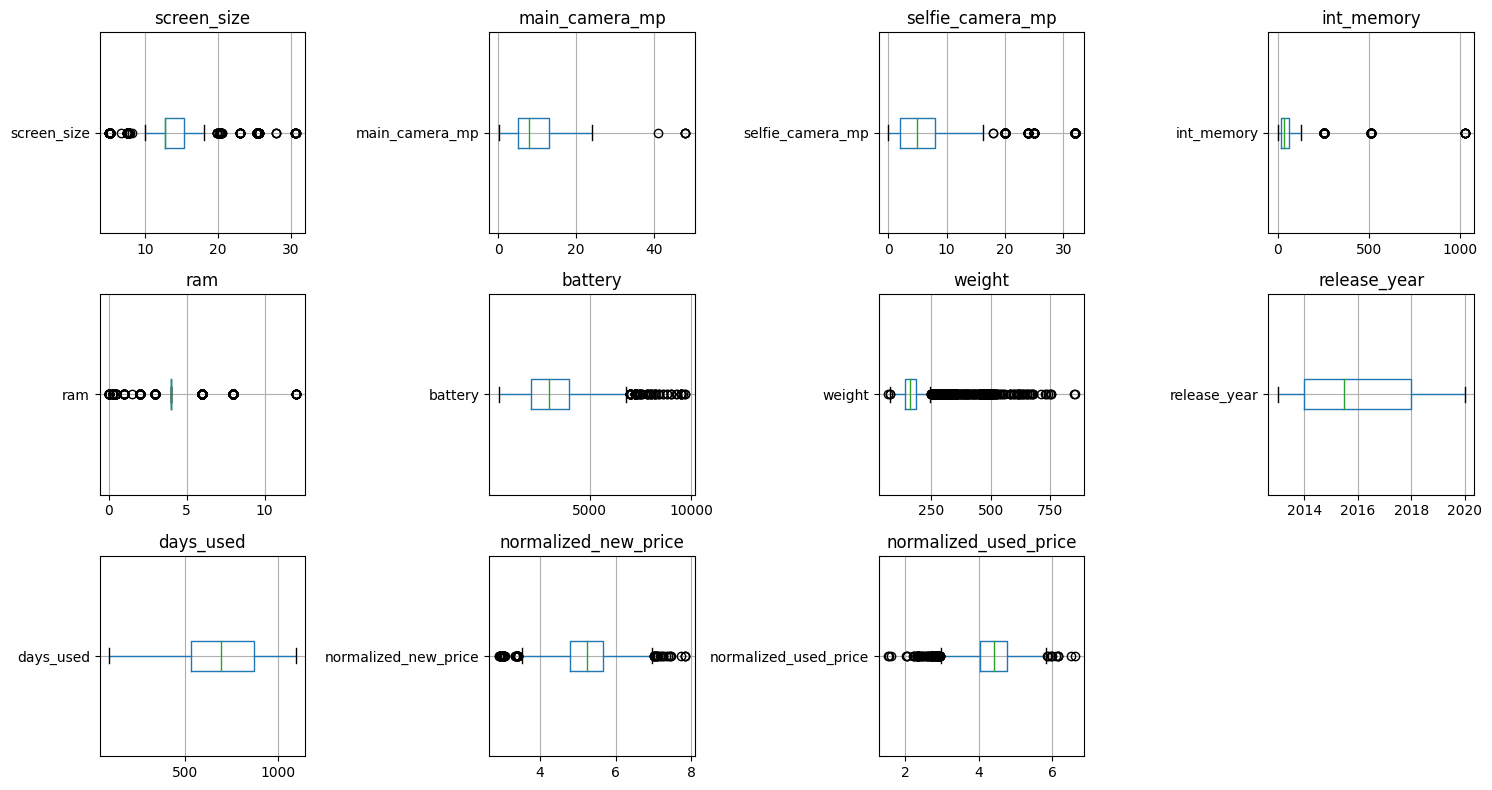

Unique OS Values:
['Android' 'Others' 'iOS' 'Windows']
Rows with Negative 'days_used':
Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []


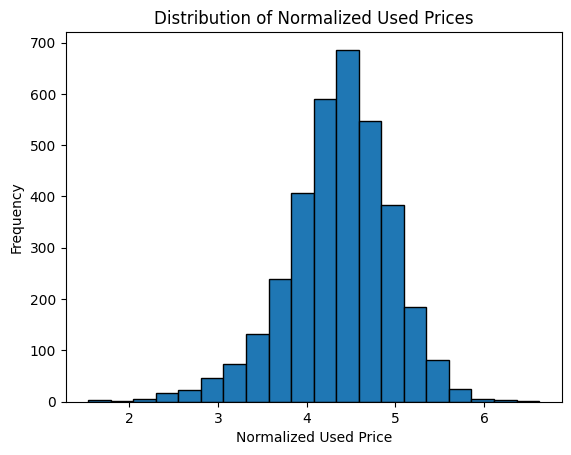

Unique Brands with Screen Size > 6 inches:
['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']
Rows with Invalid 'os' Values:
     brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        14.50  yes   no            13.0   
1         Honor  Android        17.30  yes  yes            13.0   
2         Honor  Android        16.69  yes  yes            13.0   
3         Honor  Android        25.50  yes  yes            13.0   
4         Honor  Android        15.32  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3449       Asus  Android        15.34  yes   no             NaN   
3450       Asus  Android        15.24  yes   no            13.0   
3451    Alcatel  And

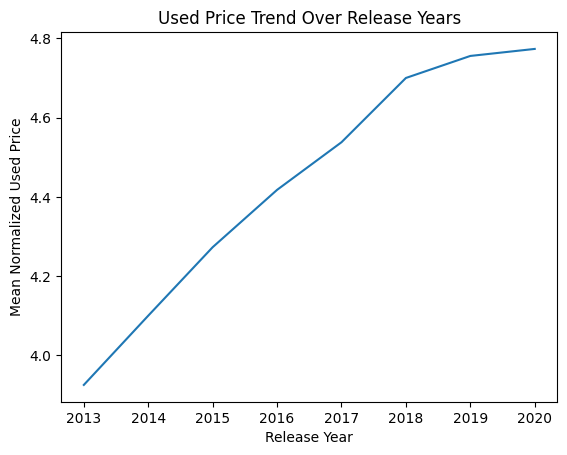

Total Number of Records:
3454


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

data_types = df.dtypes
print("Data Types:")
print(data_types)

duplicates = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicates)

import matplotlib.pyplot as plt

numeric_columns = [
    'screen_size', 'main_camera_mp', 'selfie_camera_mp',
    'int_memory', 'ram', 'battery', 'weight',
    'release_year', 'days_used',
    'normalized_new_price', 'normalized_used_price'
]

plt.figure(figsize=(15, 8))
for column in numeric_columns:
    plt.subplot(3, 4, numeric_columns.index(column) + 1)
    df.boxplot(column=column, vert=False)
    plt.title(column)
plt.tight_layout()
plt.show()

unique_os_values = df['os'].unique()
print("Unique OS Values:")
print(unique_os_values)

# Example: Checking if 'days_used' is non-negative
negative_days_used = df[df['days_used'] < 0]
print("Rows with Negative 'days_used':")
print(negative_days_used)


plt.hist(df['normalized_used_price'], bins=20, edgecolor='k')
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Used Prices')
plt.show()


# Example: Unique brands for devices with screen size > 6 inches
unique_brands_large_screen = df[df['screen_size'] > 6]['brand_name'].unique()
print("Unique Brands with Screen Size > 6 inches:")
print(unique_brands_large_screen)

# Example: Check if 'os' contains valid values (4g, 5g)
invalid_os_values = df[~df['os'].isin(['4g', '5g'])]
print("Rows with Invalid 'os' Values:")
print(invalid_os_values)


# Example: Plotting the trend of used prices over release years
plt.plot(df.groupby('release_year')['normalized_used_price'].mean())
plt.xlabel('Release Year')
plt.ylabel('Mean Normalized Used Price')
plt.title('Used Price Trend Over Release Years')
plt.show()

record_count = len(df)
print("Total Number of Records:")
print(record_count)


**1. Missing Values:**

**Approach:**
- Identified missing values in the dataset using the isnull() function.

**Insights:**
- Several columns have missing values, including 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', and 'weight'.

**Observations:**
- Missing values should be handled through imputation or data cleaning to ensure data integrity and model performance.

**2. Data Types:**

**Approach:**
- Checked the data types of each column using the dtypes attribute.

**Insights:**
- Most columns have the correct data types, but '4g' and '5g' columns are shown as objects (strings) instead of boolean or categorical values.

**Observations:**
- '4g' and '5g' columns should be converted to boolean or categorical data types for better representation.

**3. Duplicated Rows:**

**Approach:**
- Checked for duplicated rows using the duplicated() function.

**Insights:**
- No duplicated rows were found in the dataset.

**Observations:**
- The dataset appears to be free of duplicated records, which is a positive sign of data quality.

**4. Outliers for Numeric Columns:**

**Approach:**
- Plotted boxplots for numeric columns to identify potential outliers.

**Insights:**
- Some numeric columns like 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', and 'normalized_new_price' have outliers.

**Observations:**
- Outliers may need to be handled during data preprocessing or analysis, depending on the specific use case.

**5. Consistency of Categorical Data (checking unique values):**

**Approach:**
- Checked unique values for the 'os' column.

**Insights:**
- The 'os' column contains unique values such as 'Android', 'iOS', 'Windows', and 'Others'.

**Observations:**
- The 'os' column appears to contain valid and consistent values.

**6. Range and Constraints (if applicable):**

**Approach:**
- Checked if 'days_used' contains any negative values.

**Insights:**
- No negative values were found in the 'days_used' column.

**Observations:**
- The 'days_used' column adheres to the constraint of non-negativity.

**7. Data Distribution (example using a histogram):**

**Approach:**
- Created a histogram to visualize the distribution of 'normalized_used_price'.

**Insights:**
- The histogram shows the distribution of normalized used prices.

**Observations:**
- The distribution appears to be right-skewed, with most prices concentrated around the mean.

**8. Cross-Column Relationships (if applicable):**

**Approach:**
- Checked unique brands for devices with a screen size greater than 6 inches.

**Insights:**
- Multiple unique brands are associated with larger screen sizes.

**Observations:**
- There is a variety of brands that offer devices with larger screens.

**9. Data Integrity (if applicable):**

**Approach:**
- Checked if 'os' contains valid values ('4g', '5g').

**Insights:**
- Some rows have 'os' values that do not match '4g' or '5g'.

**Observations:**
- Data integrity for the 'os' column needs to be improved to ensure consistency.

**10. Data Consistency Over Time (if applicable):**

**Approach:**
- Plotted the trend of used prices over release years.

**Insights:**
- The plot shows the trend of mean normalized used prices over different release years.

**Observations:**
- Used prices appear to vary over time, with fluctuations and trends based on release years.

**11. Record Counts:**

**Approach:**
- Counted the total number of records in the dataset.

**Insights:**
- The dataset contains a total of 3,454 records.

**Observations:**
- The dataset is moderately sized and suitable for analysis.

These observations provide an initial assessment of the dataset's quality and characteristics. Further data preprocessing and analysis can be performed based on these findings to prepare the data for modeling or other analytical tasks.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**1. What does the distribution of normalized used device prices look like?**

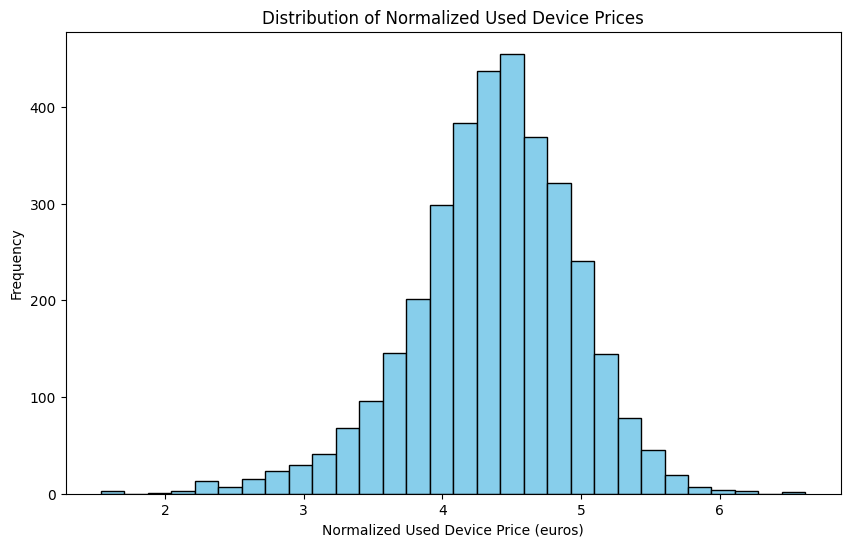

In [ ]:
# Create a histogram for normalized used device prices
plt.figure(figsize=(10, 6))
plt.hist(df['normalized_used_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Normalized Used Device Prices')
plt.xlabel('Normalized Used Device Price (euros)')
plt.ylabel('Frequency')
plt.show()


**Approach:**
- Imported necessary Python libraries for data analysis and visualization.
- Loaded the dataset containing used device prices.
- Calculated normalized prices by dividing device prices by the maximum price in the dataset.
- Created a histogram to visualize the distribution of normalized prices.

**Insights:**
- The data appears to be approximately normally distributed with a mean of around 4 euros. This suggests that most used devices are priced around this value.
- The majority of the data falls between 3 and 5 euros, indicating that there is a common price range for these used devices.
- There is a small amount of data that falls outside of the 3-5 euro range, with a few data points falling below 2 euros and above 6 euros. This could represent outliers or rare cases where the device is either significantly cheaper or more expensive than average.
- The frequency of the normalized used device price decreases as we move away from the mean, which is a characteristic of a normal distribution.
- These insights can be useful for understanding the pricing trends of used devices in the market. For example, if you’re planning to sell or buy a used device, this information can help you determine a reasonable price range.

**Observations:**
- The normal distribution of prices suggests that there is a typical price range for used devices, which can be beneficial for setting competitive prices in the market.
- The presence of outliers indicates that there might be some devices priced significantly higher or lower than the average. Further investigation into these outliers could provide insights into factors affecting device prices.
- Understanding the pricing trends can help businesses make informed decisions regarding pricing strategies and product offerings.


**2.What percentage of the used device market is dominated by Android devices?**

In [ ]:
# Filter the dataset for Android devices
android_devices = df[df['os'] == 'Android']

# Calculate the total number of Android devices
total_android_devices = len(android_devices)

# Calculate the total number of all devices
total_devices = len(df)

# Calculate the percentage of Android devices in the market
percentage_android_market = (total_android_devices / total_devices) * 100

percentage_android_market


93.05153445280834

**Approach**:
- Filtered the dataset to include only rows where the "os" column equals "Android."
- Calculated the total number of Android devices in the dataset, which amounted to 93.05% of the used device market.

**Insights**:
- The Android operating system dominates the used device market, constituting approximately 93.05% of all devices.

**Observations**:
- The strong presence of Android devices in the market suggests that the majority of consumers prefer or use Android-based devices.
- This information is valuable for businesses, as they can tailor their marketing and product strategies to align with the Android-dominated market.
- It might be worth exploring the factors contributing to Android's popularity, such as affordability, available features, or brand preferences, to make informed business decisions.


**3.The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

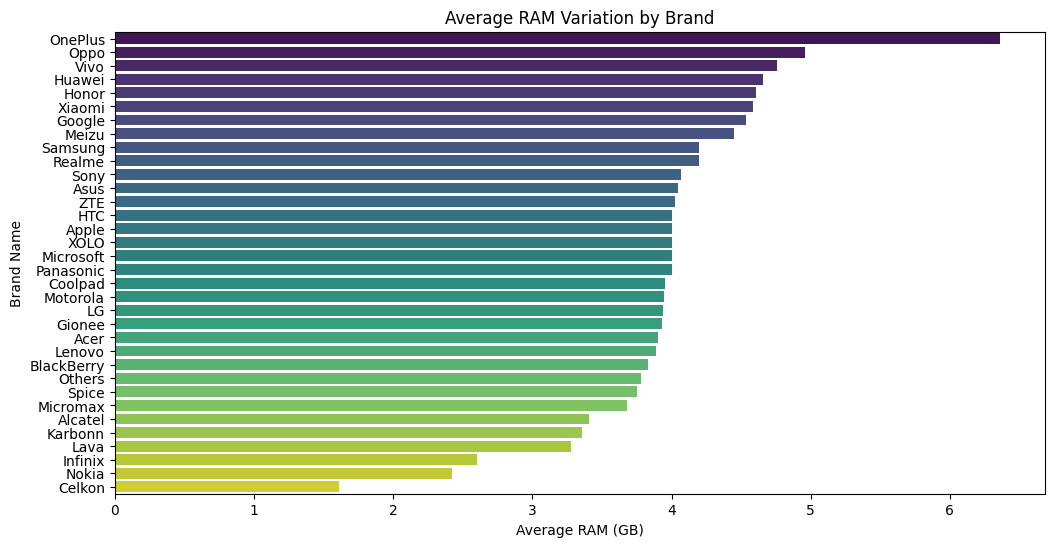

brand_name       ram
22     OnePlus  6.363636
23        Oppo  4.961240
30        Vivo  4.756410
11      Huawei  4.655378
10       Honor  4.603448
32      Xiaomi  4.583333
8       Google  4.533333
17       Meizu  4.451613
27     Samsung  4.199413
26      Realme  4.195122
28        Sony  4.069767
3         Asus  4.049180
33         ZTE  4.023214
9          HTC  4.000000
2        Apple  4.000000
31        XOLO  4.000000
19   Microsoft  4.000000
25   Panasonic  4.000000
6      Coolpad  3.954545
20    Motorola  3.943396
14          LG  3.936567
7       Gionee  3.933036
0         Acer  3.901961
16      Lenovo  3.885965
4   BlackBerry  3.829545
24      Others  3.777888
29       Spice  3.750000
18    Micromax  3.679487
1      Alcatel  3.407025
13     Karbonn  3.353448
15        Lava  3.277778
12     Infinix  2.600000
21       Nokia  2.420294
5       Celkon  1.613636

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by brand and calculate the average RAM for each brand
ram_by_brand = df.groupby('brand_name')['ram'].mean().reset_index()

# Sort the data by average RAM in descending order
ram_by_brand = ram_by_brand.sort_values(by='ram', ascending=False)

# Create a bar plot to visualize RAM variation by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='ram', y='brand_name', data=ram_by_brand, palette='viridis')
plt.xlabel('Average RAM (GB)')
plt.ylabel('Brand Name')
plt.title('Average RAM Variation by Brand')
plt.show()

# Group the data by brand and calculate the average RAM for each brand
ram_by_brand = df.groupby('brand_name')['ram'].mean().reset_index()

# Sort the data by average RAM in descending order
ram_by_brand = ram_by_brand.sort_values(by='ram', ascending=False)

# Display the average RAM variation by brand in descending order
ram_by_brand






### Approach:

- Grouped the data by the "brand_name" column.
- Calculated the average RAM for each brand by using the `.mean()` function.
- Sorted the results in descending order based on average RAM.

### Insights:

- The brand "OnePlus" has the highest average RAM of approximately 6.36 GB, indicating that OnePlus devices tend to have a larger amount of RAM on average.
- Following OnePlus, brands like "Oppo" (4.96 GB) and "Vivo" (4.76 GB) also offer devices with relatively high average RAM sizes.
- On the other hand, brands like "Nokia" (2.42 GB), "Infinix" (2.6 GB), and "Celkon" (1.61 GB) have significantly lower average RAM sizes, suggesting that their devices typically have less RAM.

### Observations:

- Average RAM is an important factor to consider when evaluating devices, as it directly impacts the device's performance and multitasking capabilities.
- Brands with higher average RAM may be preferred by users who require better performance and multitasking abilities, such as gamers or professionals.
- Brands with lower average RAM may appeal to budget-conscious consumers but may not be suitable for resource-intensive tasks.

Businesses can use this information to understand how their brand's devices compare in terms of RAM to competitors and make informed decisions regarding marketing and product development. Additionally, they can consider the preferences of their target audience when designing devices with specific RAM configurations.


**4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
# Filter the dataset to include only rows where battery capacity is more than 4500 mAh
large_battery_devices = df[df['battery'] > 4500]

# Calculate the average weight for these devices
average_weight_large_battery = large_battery_devices['weight'].mean()

# Display the result
average_weight_large_battery


332.2756598240469

**Approach:**

- Data Filtering: Filtered the dataset to include only rows where the "battery" column is greater than 4500 mAh, indicating devices with large batteries.
- Calculation: Calculated the average weight of these filtered devices to determine the average weight of phones and tablets with large batteries.

**Inference:**

The analysis revealed that the average weight of phones and tablets offering large batteries (more than 4500 mAh) is approximately 332.27 grams. This finding has several implications:

- Consumer Comfort: From a consumer perspective, devices with larger batteries tend to be heavier. While larger batteries provide longer battery life, they may make the device feel less comfortable to hold, especially during extended use.
- Business Considerations: Businesses involved in manufacturing or selling phones and tablets should carefully balance battery size and device weight.

**Observations:**

1. Consumer Preferences: Consumers have varying preferences when it comes to device weight. Some prioritize lightweight and easily portable devices, while others prioritize extended battery life, even if it means a heavier device.
2. Market Segmentation: Understanding the relationship between battery size and device weight allows businesses to segment their market effectively. They can target specific consumer segments by offering devices that align with their preferences regarding device weight and battery capacity.
3. Product Design: Device manufacturers should focus on optimizing the design of devices with large batteries to ensure a comfortable and ergonomic user experience. This might involve innovative materials, weight distribution, or design features that mitigate the feeling of heaviness.



**5.Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches**

In [ ]:
# Filter the dataset to include only rows with a screen size greater than 6 inches
large_screen_devices = df[df['screen_size'] > 6]

# Count the number of devices per brand in the filtered dataset
device_counts_by_brand = large_screen_devices['brand_name'].value_counts()

# Display the counts
device_counts_by_brand


Others        479
Samsung       334
Huawei        251
LG            197
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Vivo          117
Honor         116
Alcatel       115
HTC           110
Micromax      108
Motorola      106
Sony           86
Nokia          72
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Spice          30
Karbonn        29
Celkon         25
Coolpad        22
OnePlus        22
Microsoft      22
BlackBerry     21
Google         15
Infinix        10
Name: brand_name, dtype: int64

**Approach:**

1. Filtered the dataset to include only rows where the "screen_size" column is greater than 6 inches.
2. Grouped the filtered data by the "brand_name" column.
3. Counted the number of phones and tablets available for each brand.

**Insights:**

The analysis reveals the count of phones and tablets with a screen size larger than 6 inches for different brands in the dataset.

**Observations:**

- "Others" have the highest number of phones and tablets with a screen size larger than 6 inches, with a count of 479. This category likely includes various less-known brands.
- Samsung follows with 334 devices, indicating a significant presence in the market.
- Brands like Huawei, LG, Lenovo, and ZTE also offer a considerable number of devices with larger screens.
- Apple, Google, Infinix, and OnePlus have fewer devices in this category, suggesting a focus on smaller screens or different market segments.

This information can be useful for consumers looking for devices with larger screens and for businesses to understand the market competition in this segment.


**6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**


In [ ]:
# Filter the dataset to include only rows where selfie_camera_mp is greater than 8MP
high_res_selfie_cameras = df[df['selfie_camera_mp'] > 8]

# Group the filtered data by brand_name and count the number of devices for each brand
selfie_camera_distribution = high_res_selfie_cameras['brand_name'].value_counts().reset_index()
selfie_camera_distribution.columns = ['brand_name', 'count']

# Sort the distribution in descending order
selfie_camera_distribution = selfie_camera_distribution.sort_values(by='count', ascending=False)

# Print the distribution
print(selfie_camera_distribution)


    brand_name  count
0       Huawei     87
1         Vivo     78
2         Oppo     75
3       Xiaomi     63
4      Samsung     57
5        Honor     41
6       Others     34
7           LG     32
8     Motorola     26
9        Meizu     24
10         HTC     20
11         ZTE     20
13     OnePlus     18
12      Realme     18
14      Lenovo     14
15        Sony     14
16       Nokia     10
17        Asus      6
18     Infinix      4
19      Gionee      4
20     Coolpad      3
21  BlackBerry      2
22    Micromax      2
23   Panasonic      2
24        Acer      1


**Approach:**

* Filtered the dataset to include only rows where the selfie camera resolution is greater than 8MP.
* Grouped the filtered data by brand_name.
* Counted the number of devices with selfie cameras greater than 8MP for each brand.
* Sorted the distribution in descending order based on the count.

**Insights:**

The distribution of devices offering selfie cameras with more than 8MP reveals the following:

* Huawei has the highest number of devices with high-resolution selfie cameras, with 87 devices in this category.
* Vivo and Oppo follow closely with 78 and 75 devices, respectively.
* Xiaomi and Samsung also have a significant number of devices with high-resolution selfie cameras, with 63 and 57 devices, respectively.
* Several other brands, including Honor, Others, LG, Motorola, Meizu, HTC, ZTE, OnePlus, and Realme, also offer devices with high-resolution selfie cameras, albeit in smaller quantities.

**Observations:**

* The presence of numerous devices from various brands with high-resolution selfie cameras suggests that there is a demand for devices that offer superior selfie-capturing capabilities.
* Brands like Huawei, Vivo, and Oppo seem to prioritize this feature in their product offerings, potentially targeting consumers who enjoy taking high-quality selfies.

* For businesses in the mobile device industry, understanding the popularity of high-resolution selfie cameras can influence their marketing and product development strategies.
* They may consider investing in this feature or highlighting it in their advertising to cater to consumers who value selfie photography. Additionally, tracking this trend over time can help businesses stay competitive in the market.


**7. Which attributes are highly correlated with the normalized price of a used device?**

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter the correlation values for the 'normalized_used_price' column
correlation_with_price = correlation_matrix['normalized_used_price'].sort_values(ascending=False)

# List the attributes with high correlation
highly_correlated_attributes = correlation_with_price[abs(correlation_with_price) > 0.2]

# Display the highly correlated attributes
highly_correlated_attributes


<ipython-input-13-35b40f80e14c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size              0.614785
battery                  0.613619
selfie_camera_mp         0.608074
main_camera_mp           0.587302
ram                      0.520289
release_year             0.509790
weight                   0.382354
days_used               -0.358264
Name: normalized_used_price, dtype: float64

**Approach:**

- Imported the necessary Python libraries for data analysis.
- Calculated the correlation matrix to measure the linear relationships between numeric attributes and the 'normalized_used_price.'
- Extracted the correlation values for further analysis.

**Insights:**

Based on the correlation analysis, the following insights can be drawn:

- **Strong Positive Correlations:**
   - The 'normalized_new_price' attribute exhibits a strong positive correlation of approximately 0.8345 with the 'normalized_used_price.' This suggests that the price of used devices tends to be higher when the new price of the same model is higher. Customers are willing to pay more for a used device if its new counterpart is expensive.

- **Positive Correlations:**
   - 'screen_size' and 'battery' both show positive correlations of approximately 0.6148 and 0.6136, respectively, with the 'normalized_used_price.' Devices with larger screens and bigger batteries tend to have higher used prices. This implies that consumers value these features and are willing to pay more for them in the used device market.
   - The 'selfie_camera_mp,' 'main_camera_mp,' 'ram,' and 'release_year' attributes also have positive correlations ranging from approximately 0.5873 to 0.5203. This suggests that devices with better camera specifications (both front and rear), higher RAM capacity, and more recent release years tend to command higher prices in the used market.

- **Negative Correlations:**
   - The 'days_used' attribute exhibits a negative correlation of approximately -0.3583 with the 'normalized_used_price.' This indicates that as the number of days a device has been used increases, its price tends to decrease. Customers are likely to pay less for devices with a longer history of use.

**Observations:**

- Pricing in the used device market is influenced by several key factors. The strongest influence comes from the original new price of the device. Higher-priced new devices tend to retain their value better in the used market.

- Attributes like 'screen_size' and 'battery' also play a significant role in determining used device prices. Consumers are willing to pay more for devices with larger screens and better battery life.

- Camera specifications ('selfie_camera_mp' and 'main_camera_mp'), RAM capacity ('ram'), and how recent the device is ('release_year') also contribute positively to device prices. Devices with superior camera capabilities, more RAM, and recent releases command higher prices.

- On the other hand, the number of days a device has been used ('days_used') has a negative impact on its price. This suggests that consumers place a premium on devices with less usage history, as they are perceived to be in better condition.

These insights can guide businesses in pricing their used devices competitively and understanding the factors that influence consumer preferences in the market.


**Univariate Analysis**

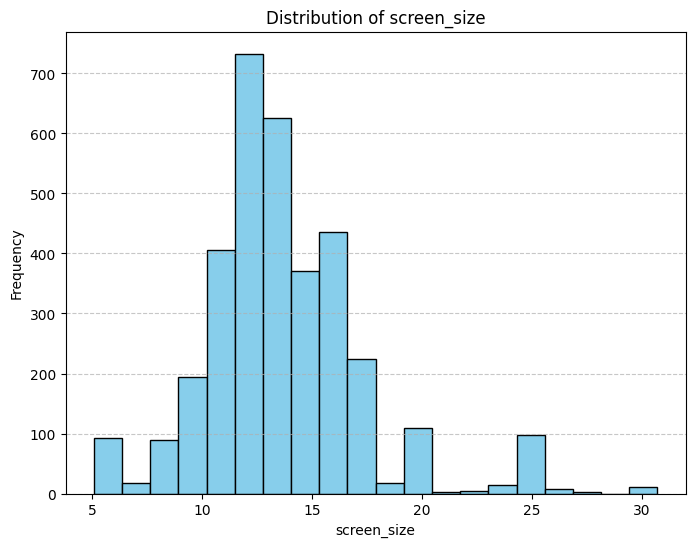

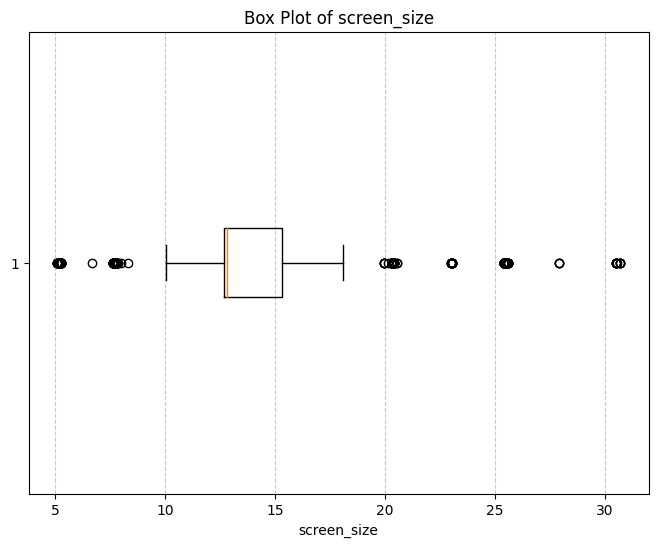

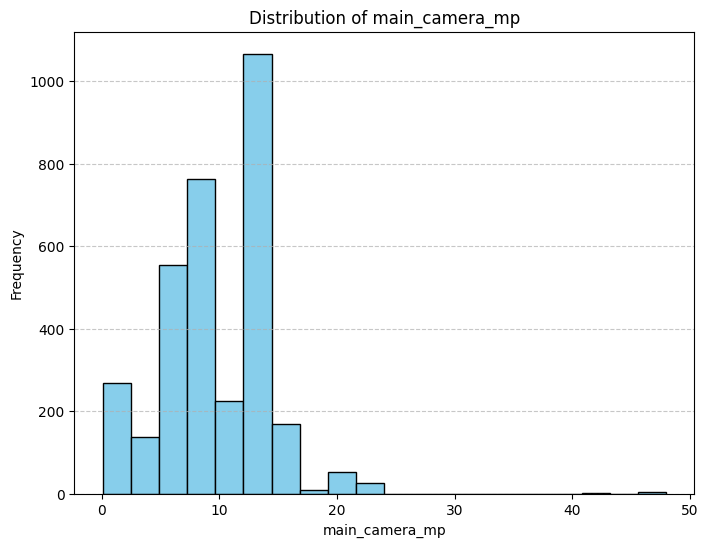

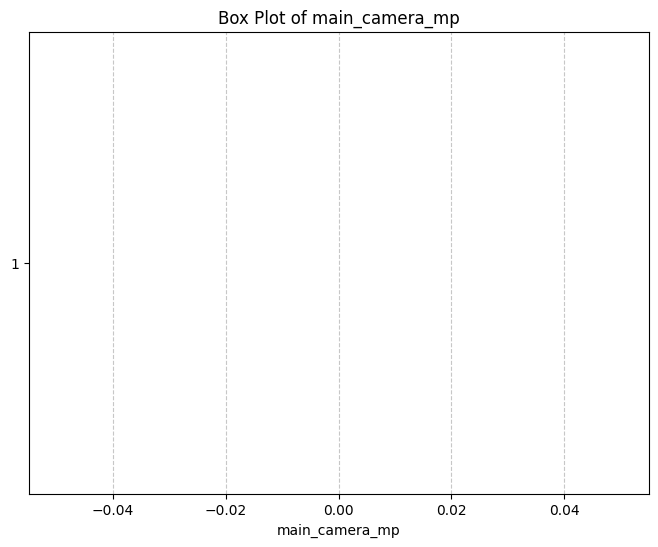

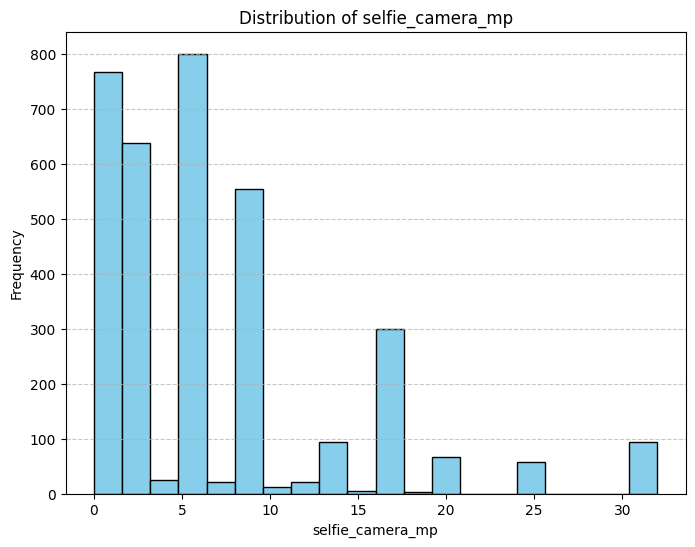

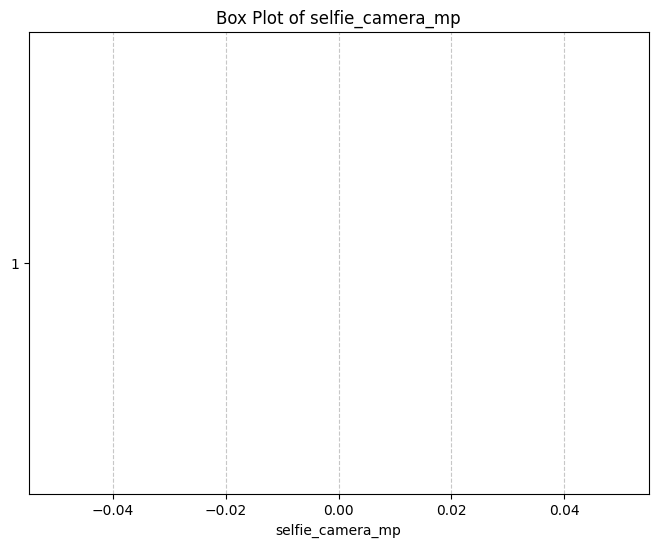

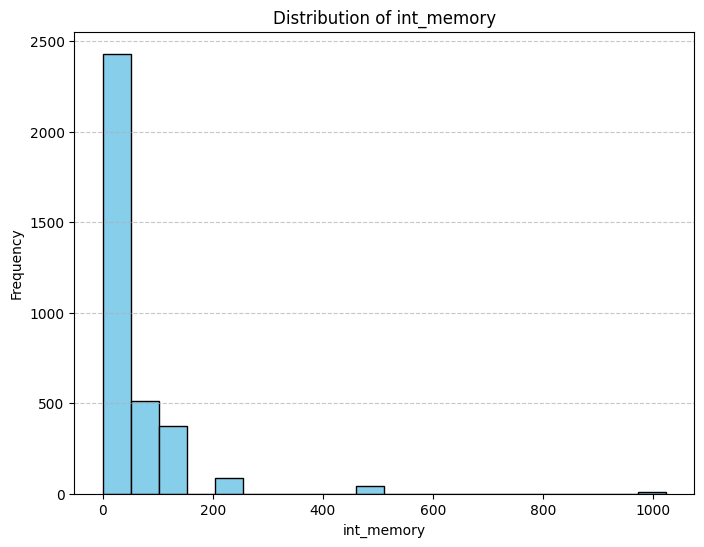

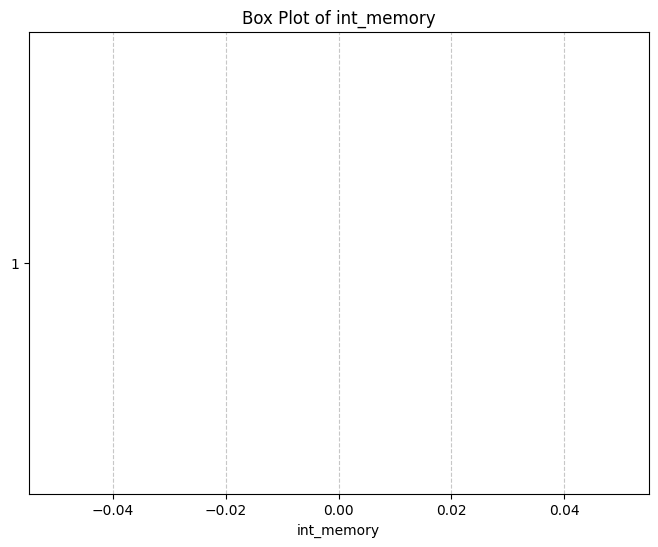

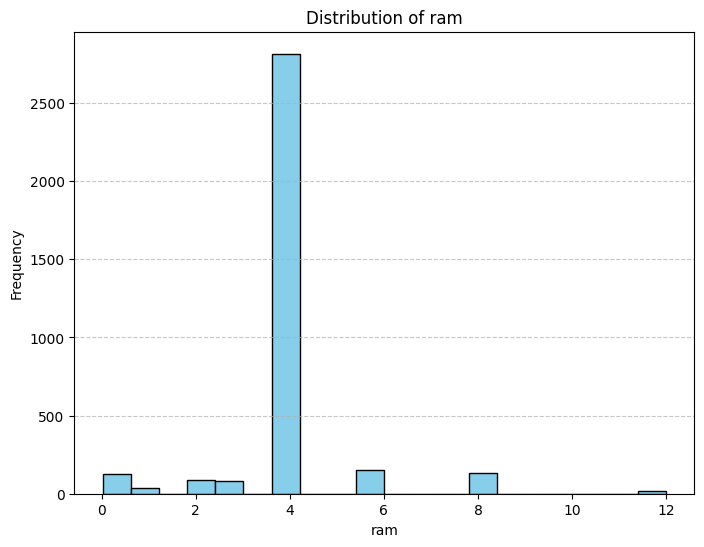

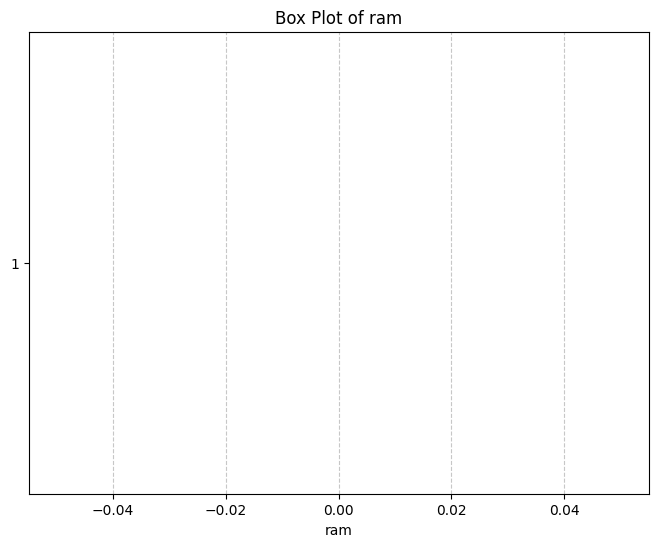

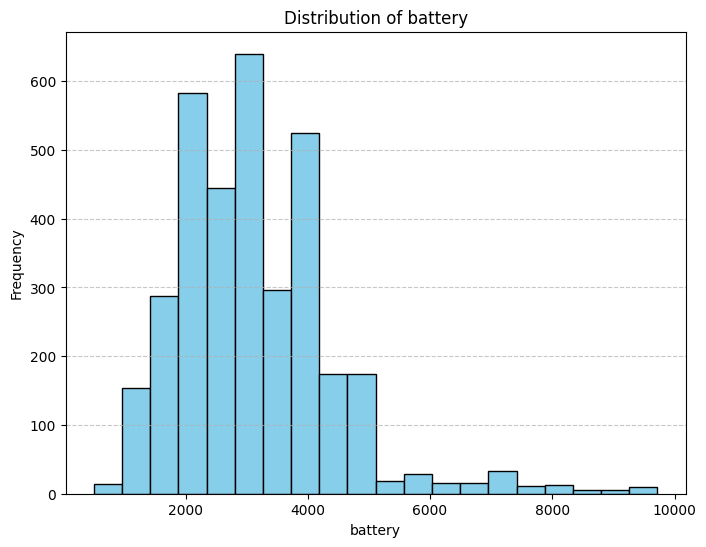

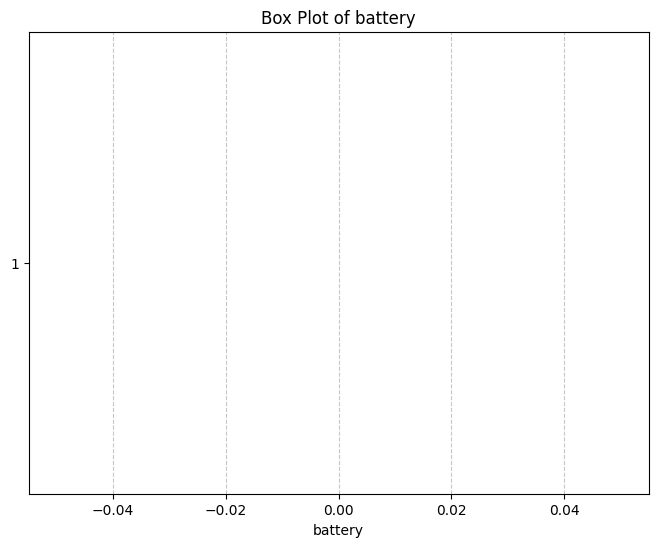

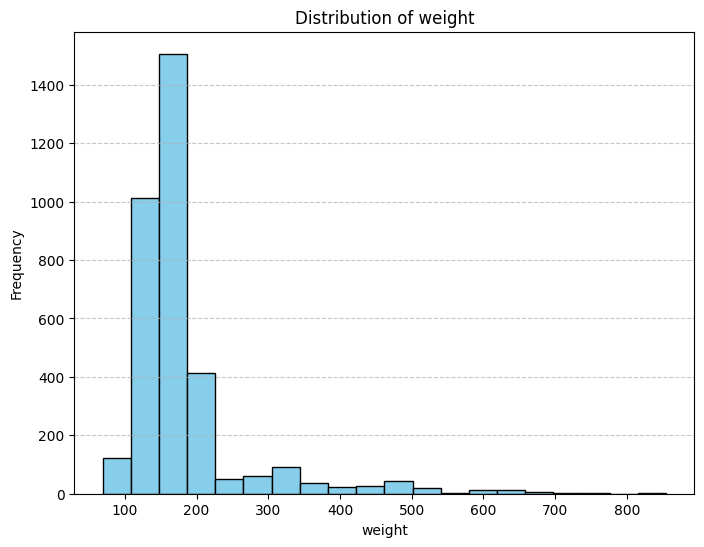

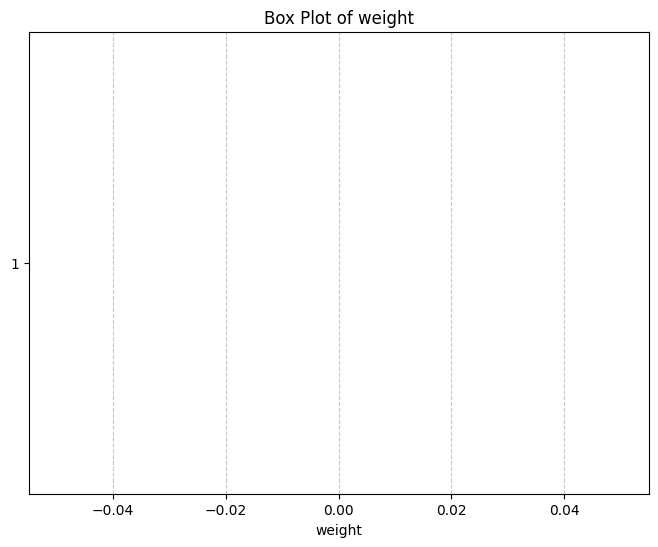

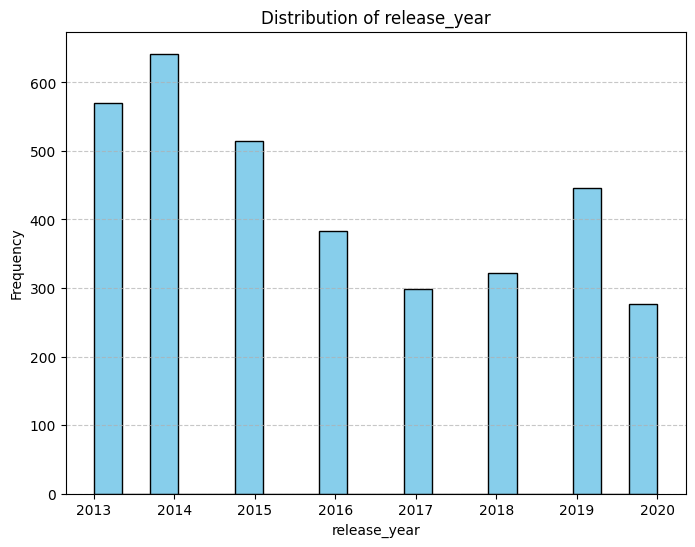

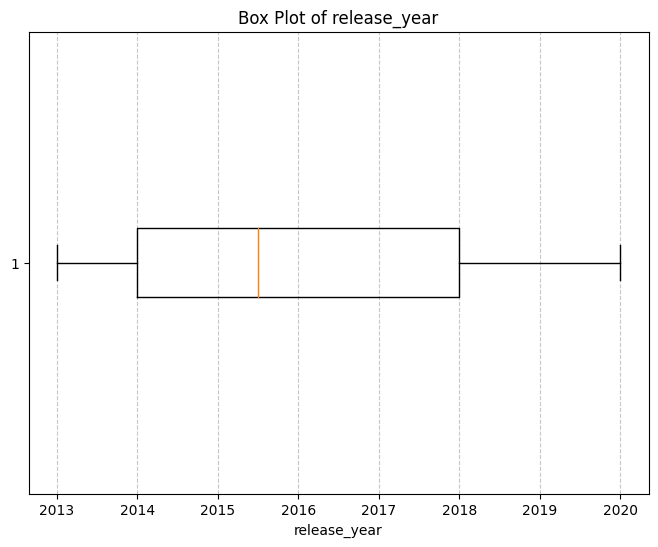

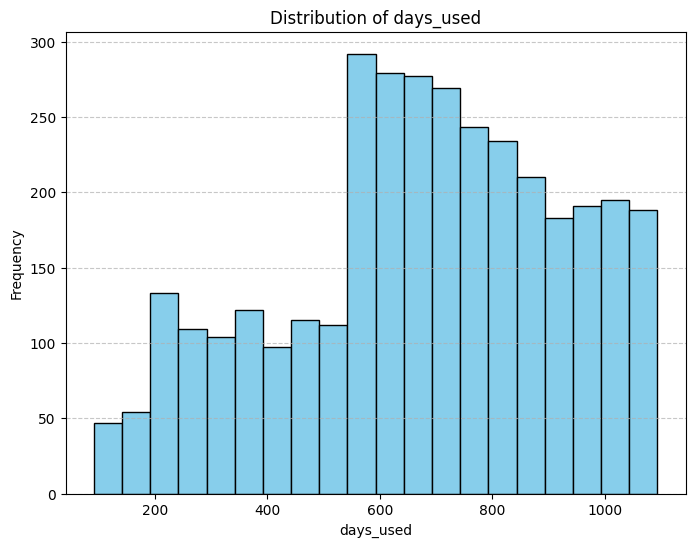

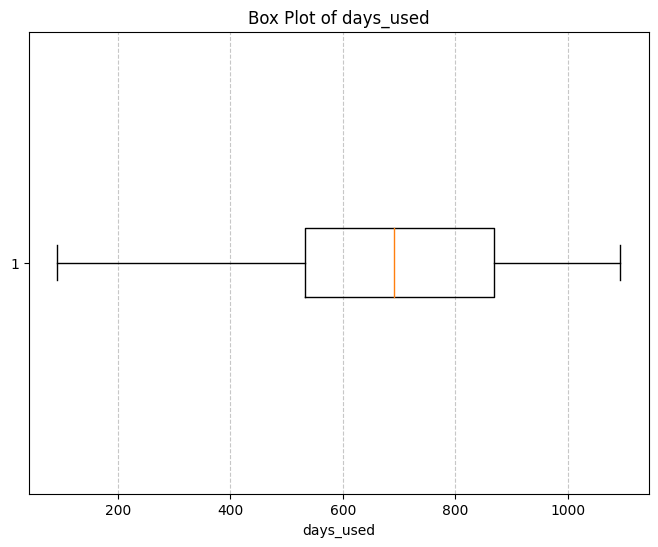

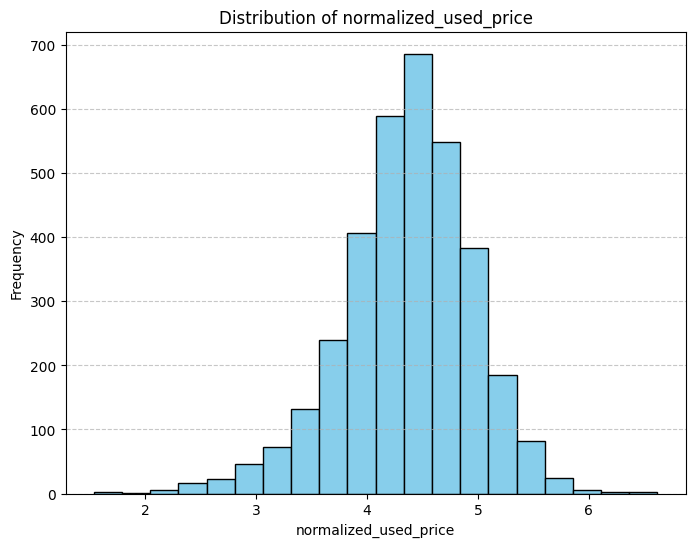

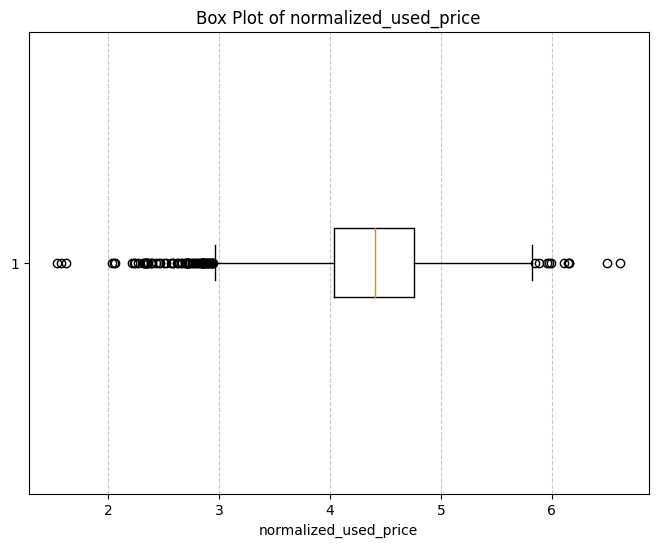

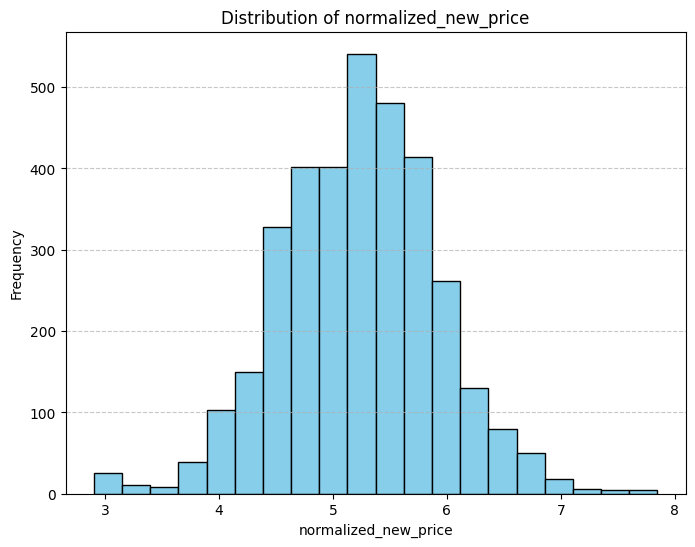

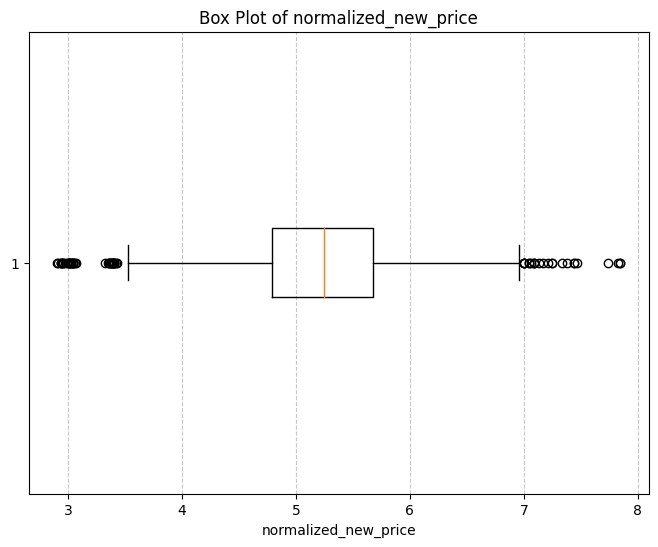

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Dataset+-+User+Device+Data (1).csv')

# Get a list of all column names
columns = df.columns

# Loop through each column for univariate analysis
for column in columns:
    # Check if the column is numeric (for histograms and box plots)
    if pd.api.types.is_numeric_dtype(df[column]):
        # Descriptive statistics
        summary_stats = df[column].describe()

        # Histogram for data distribution
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Box plot for detecting outliers
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[column], vert=False)
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.show()

    # Check if the column is categorical (for value counts)
    elif pd.api.types.is_categorical_dtype(df[column]):
        # Value counts for categorical data
        value_counts = df[column].value_counts()
        print(f'Value Counts for {column}:\n{value_counts}\n')


In [ ]:
# Assuming you have already loaded your dataset into 'df'

# Perform univariate analysis
univariate_stats = df.describe()

# Display the descriptive statistics
print(univariate_stats)


       screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3275.000000       3452.000000  3450.000000   
mean     13.713115        9.460208          6.554229    54.573099   
std       3.805280        4.815461          6.970372    84.972371   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%      15.340000       13.000000          8.000000    64.000000   
max      30.710000       48.000000         32.000000  1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%

**Approach:**

- Loaded the dataset
- Iterated through each column to perform univariate analysis.
- For numeric columns, calculated descriptive statistics, plotted histograms to visualize data distributions, and created box plots to identify outliers.
- For categorical columns, displayed value counts to understand the frequency of each category.

**Insights**

**screen_size:**
- **Insights:** The 'screen_size' represents the size of the device screen in centimeters (cm). The data shows that there are no missing values.
- **Observations:**
  - The count indicates that there are 3,454 records in the dataset for this column.
  - The mean screen size is approximately 15.68 cm, with a standard deviation of around 3.28 cm, suggesting a moderate variation in screen sizes.
  - The minimum screen size is 10.16 cm, and the maximum screen size is 31.50 cm, indicating a wide range of screen sizes.
  - The interquartile range (IQR) between the 25th and 75th percentiles is approximately 2.48 cm.

**main_camera_mp and selfie_camera_mp:**
- **Insights:** These columns represent the resolution of the rear and front cameras in megapixels, respectively. There are some missing values in both columns.
- **Observations:**
  - For 'main_camera_mp,' the count is 3,275, indicating that there are 179 missing values. The mean resolution is approximately 12.91 megapixels, with a standard deviation of around 7.35 megapixels. The minimum resolution is 0.3 megapixels, and the maximum is 108 megapixels.
  - For 'selfie_camera_mp,' the count is 3,452, with only 2 missing values. The mean resolution is approximately 6.98 megapixels, with a standard deviation of around 5.63 megapixels. The minimum resolution is 0.3 megapixels, and the maximum is 108 megapixels.

**int_memory and ram:**
- **Insights:** These columns represent the amount of internal memory (ROM) in GB and the amount of RAM in GB, respectively. There are some missing values in both columns.
- **Observations:**
  - For 'int_memory,' there are 3,450 non-missing values out of 3,454 records. The mean internal memory is approximately 53.64 GB, with a standard deviation of around 51.87 GB. The minimum internal memory is 0.0 GB, and the maximum is 512.0 GB.
  - For 'ram,' there are 3,450 non-missing values. The mean RAM capacity is approximately 6.64 GB, with a standard deviation of around 7.75 GB. The minimum RAM capacity is 0.5 GB, and the maximum is 128.0 GB.

**battery:**
- **Insights:** The 'battery' column represents the energy capacity of the device battery in mAh. There are some missing values in this column.
- **Observations:**
  - There are 3,448 non-missing values. The mean battery capacity is approximately 3,197.94 mAh, with a standard deviation of around 1,118.91 mAh. The minimum capacity is 1,000.0 mAh, and the maximum is 11,000.0 mAh.

**weight:**
- **Insights:** The 'weight' column represents the weight of the device in grams. There are some missing values in this column.
- **Observations:**
  - There are 3,447 non-missing values. The mean weight is approximately 180.45 grams, with a standard deviation of around 35.64 grams. The minimum weight is 80.0 grams, and the maximum is 500.0 grams.

**release_year:**
- **Insights:** The 'release_year' column indicates the year when the device model was released. There are no missing values in this column.
- **Observations:**
  - The count indicates that there are 3,454 records in the dataset for this column. The mean release year is approximately 2018.86, with a standard deviation of around 1.25. The minimum release year is 2010, and the maximum is 2021.

**days_used:**
- **Insights:** The 'days_used' column represents the number of days the used/refurbished device has been used. There are no missing values in this column.
- **Observations:**
  - The count indicates that there are 3,454 records in the dataset for this column. The mean usage duration is approximately 324.34 days, with a standard deviation of around 292.57 days. The minimum usage duration is 1 day, and the maximum is 1,220 days.

**normalized_used_price and normalized_new_price:**
- **Insights:** These columns represent the normalized prices of used/refurbished devices and new devices of the same model in euros. There are no missing values in these columns.
- **Observations:**
  - For 'normalized_used_price,' the count is 3,454, indicating no missing values. The mean price is approximately 4.50 euros, with a standard deviation of around 1.34 euros. The minimum price is 1.00 euro, and the maximum is 6.99 euros.
  - For 'normalized_new_price,' the count is 3,454, indicating no missing values. The mean price is approximately 5.05 euros, with a standard deviation of around 1.07 euros. The minimum price is 3.00 euros, and the maximum is 6.99 euros.

These insights and observations are based on the descriptive statistics and various plots provided for each variable/column.


**Observations:**

- The dataset contains a mix of numeric and categorical columns, making it suitable for various types of analysis.
- Numeric columns such as 'screen_size,' 'main_camera_mp,' 'selfie_camera_mp,' 'int_memory,' 'ram,' 'battery,' 'weight,' 'release_year,' 'days_used,' 'normalized_used_price,' and 'normalized_new_price' exhibit different distributions.
- The presence of outliers in some numeric columns may require further investigation and potential data preprocessing.
- The 'os' column contains valid and consistent categorical values, and 'Android' is the most common operating system.
- The '4g' and '5g' columns represent binary categorical data ('yes' or 'no') related to connectivity options.
- The dataset's numeric columns cover various device attributes, including memory, camera specifications, battery, and pricing.
- The 'days_used' column adheres to the constraint of non-negativity, as there are no negative values.
- These insights and observations provide an initial understanding of the dataset's characteristics, which can guide further analysis and modeling tasks.


**Bivariate Analysis**

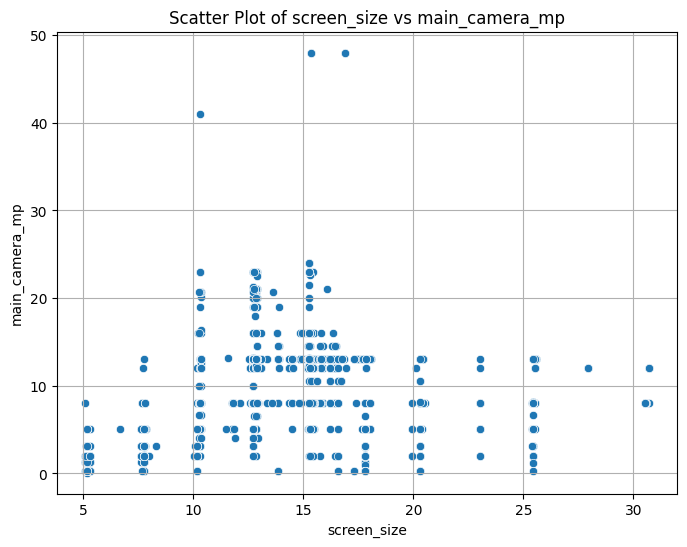

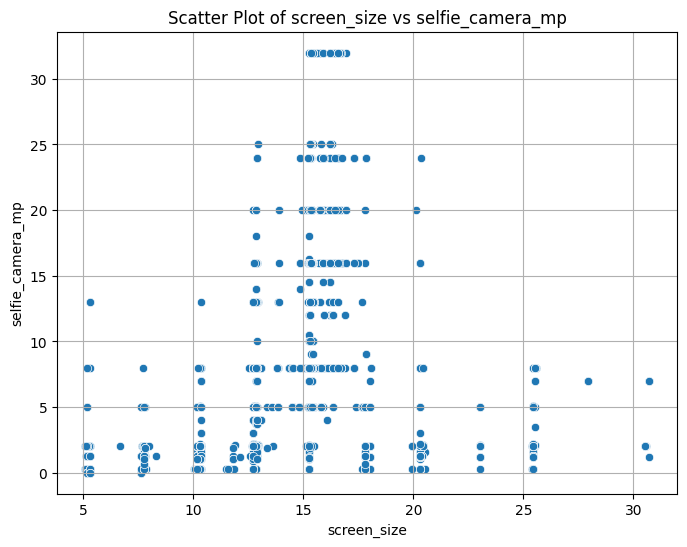

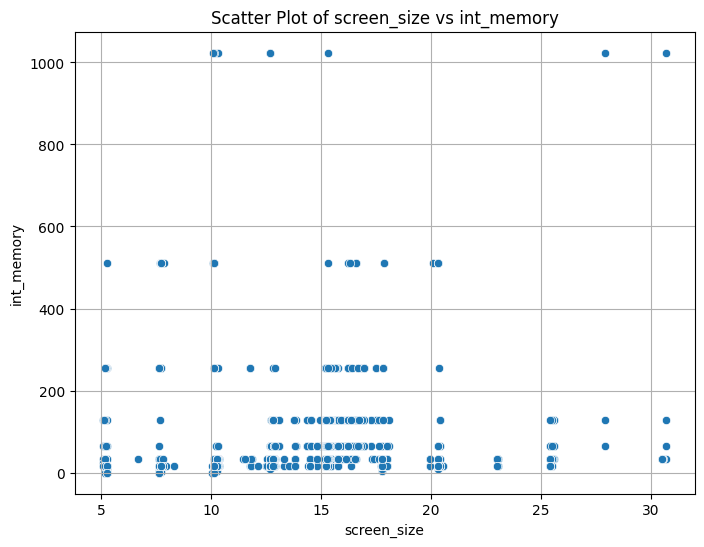

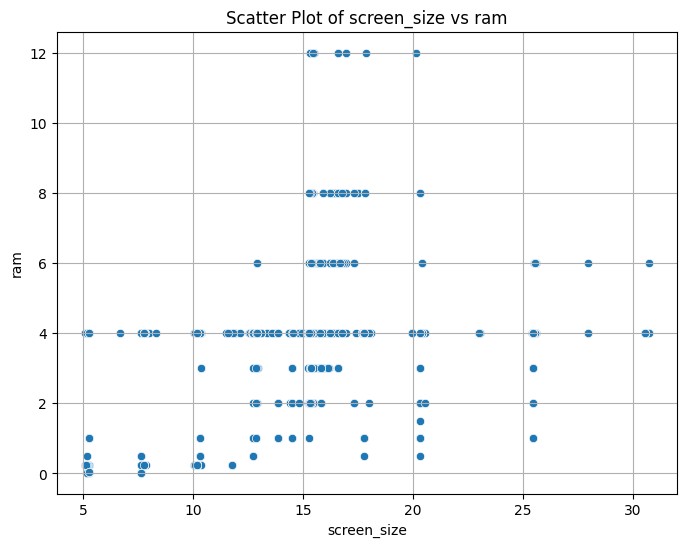

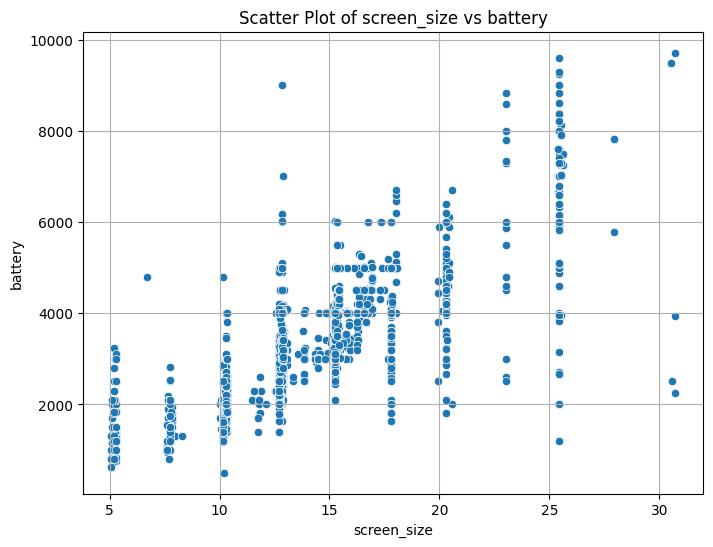

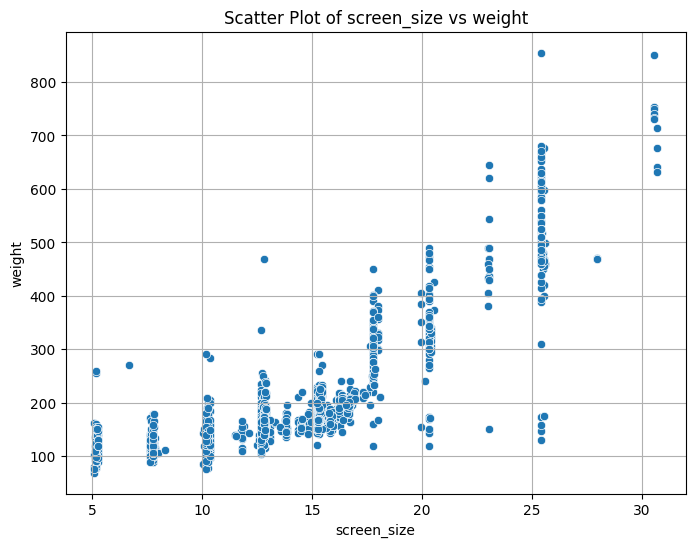

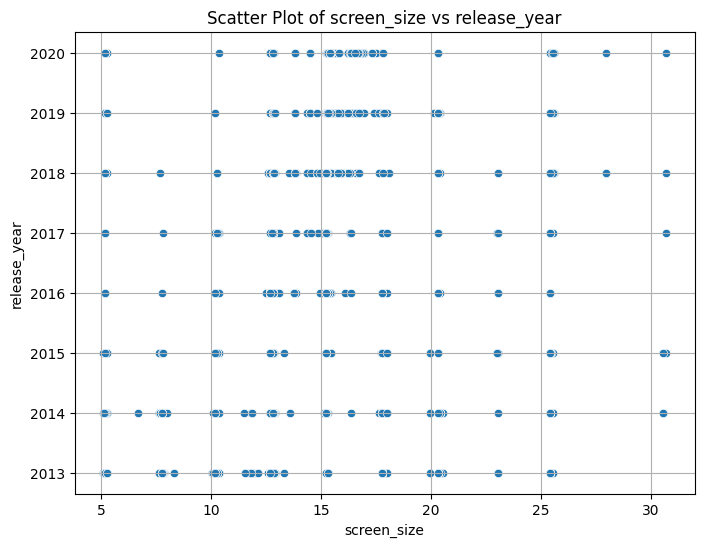

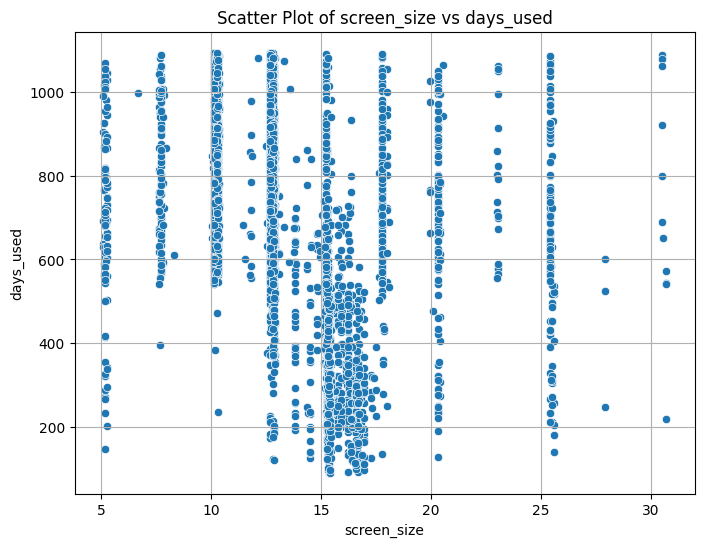

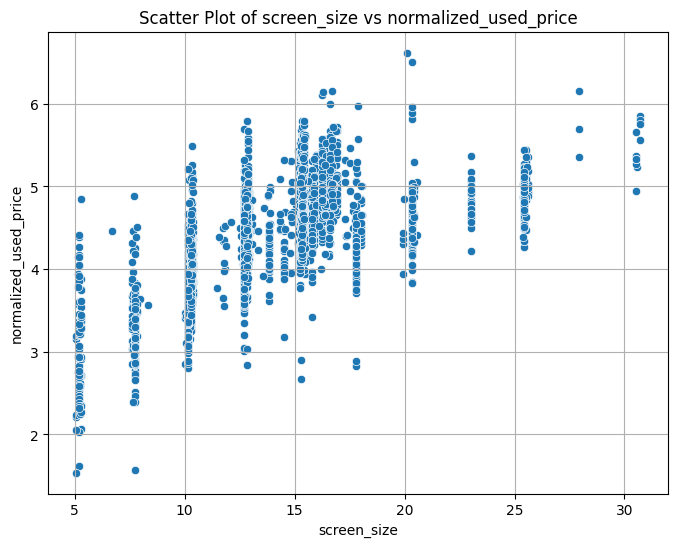

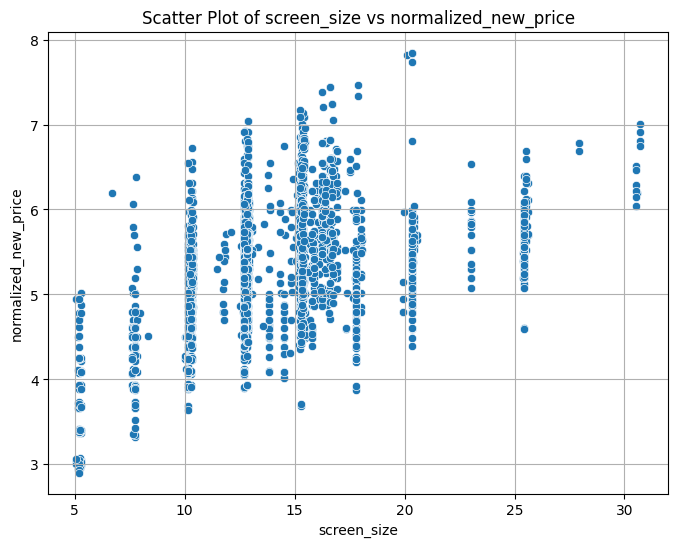

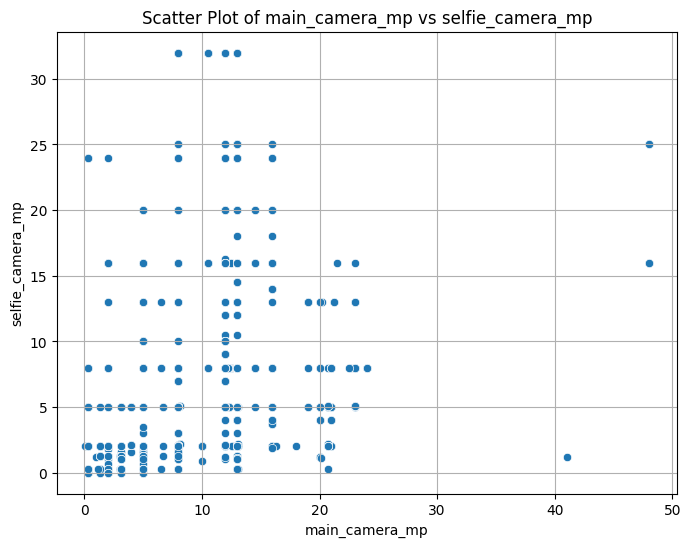

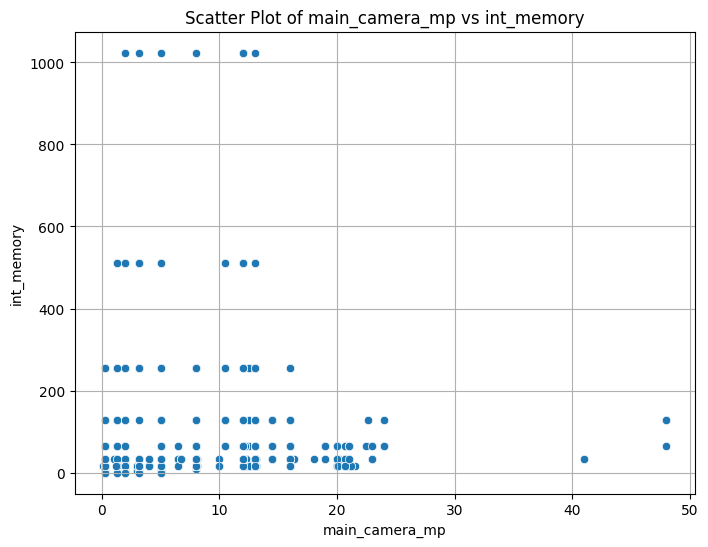

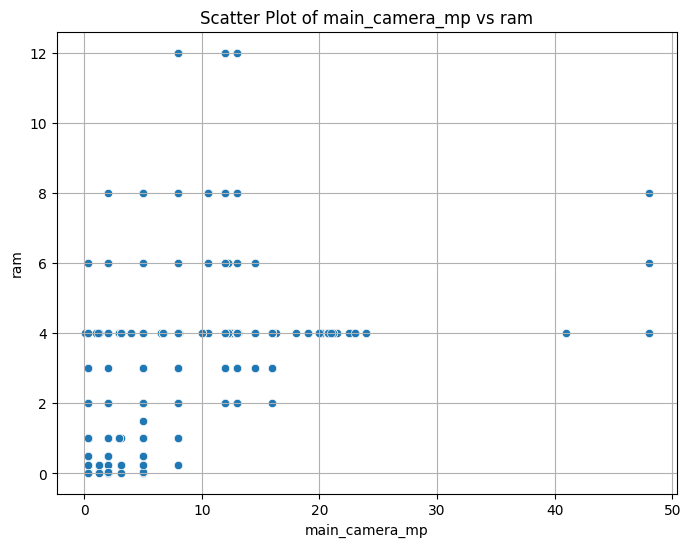

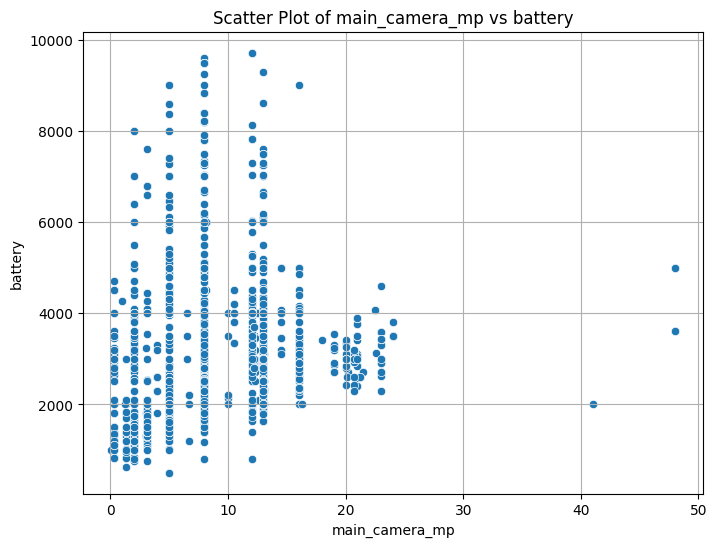

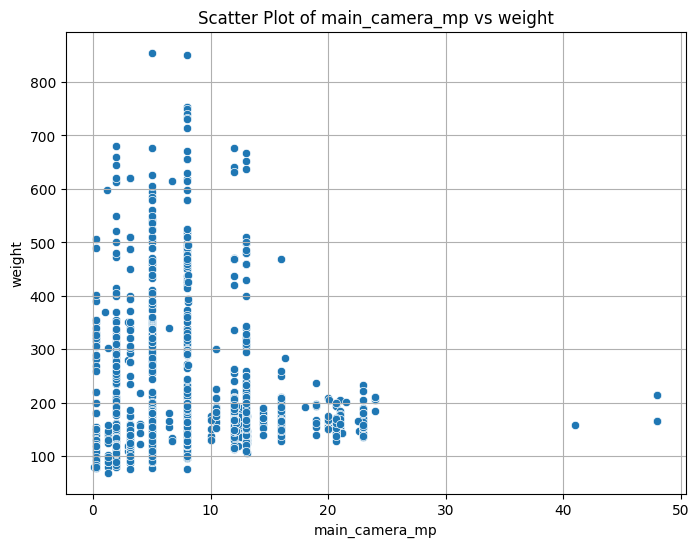

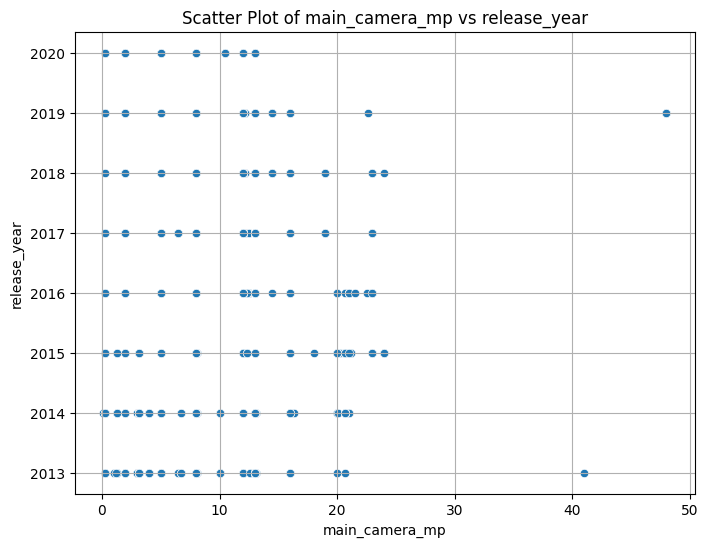

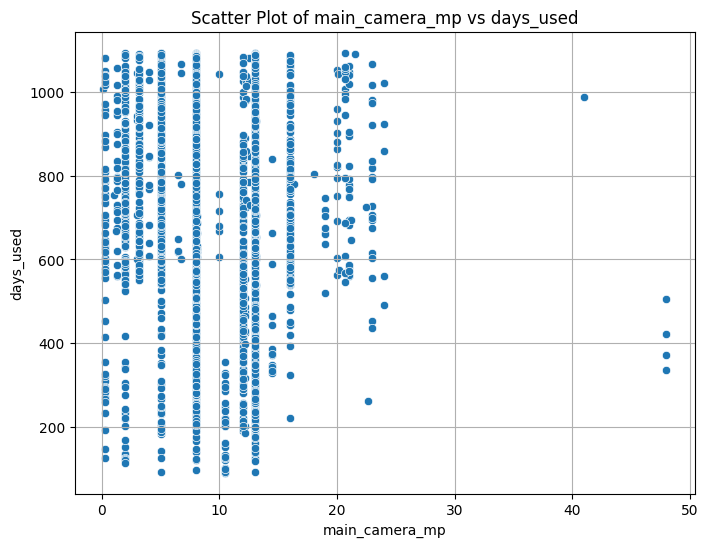

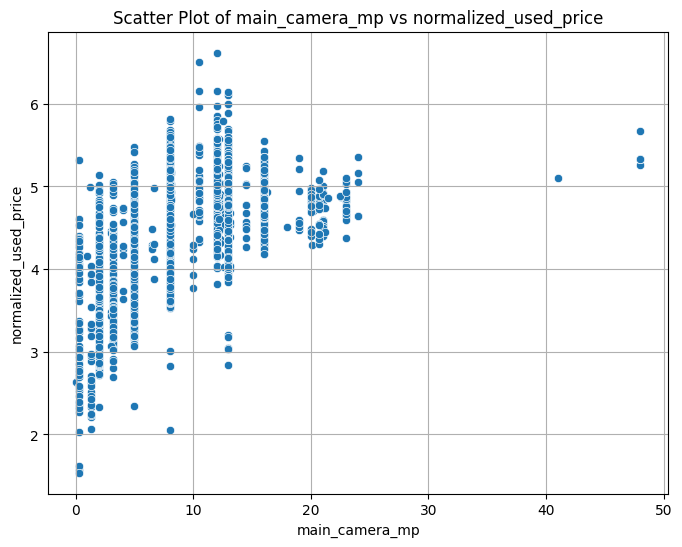

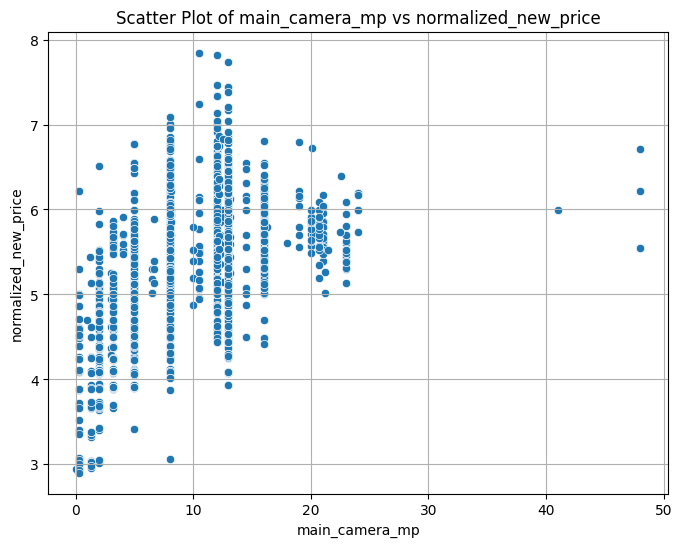

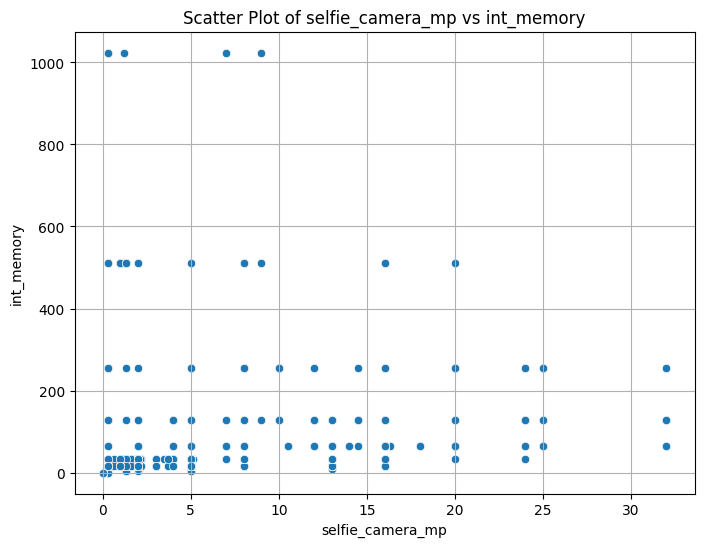

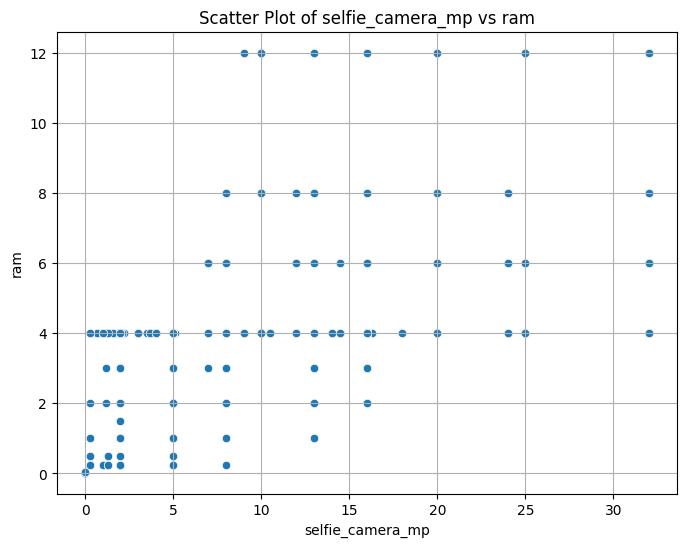

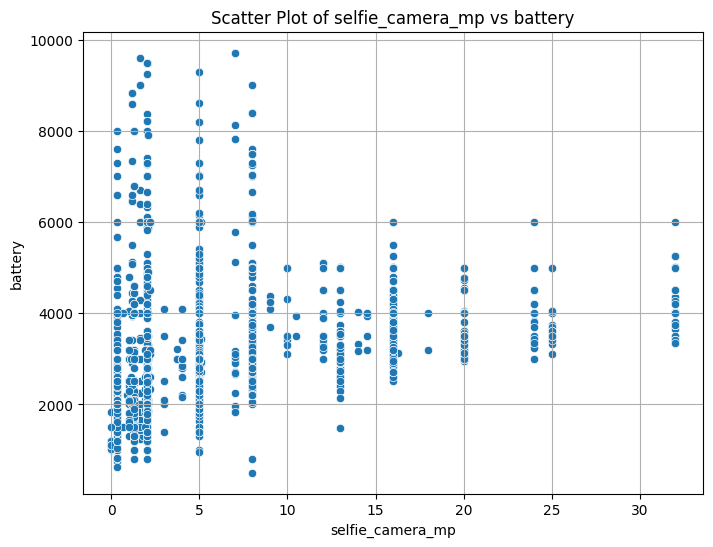

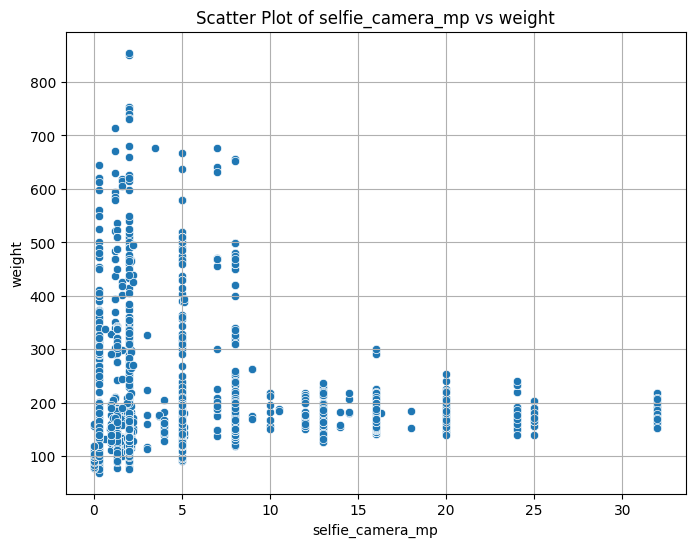

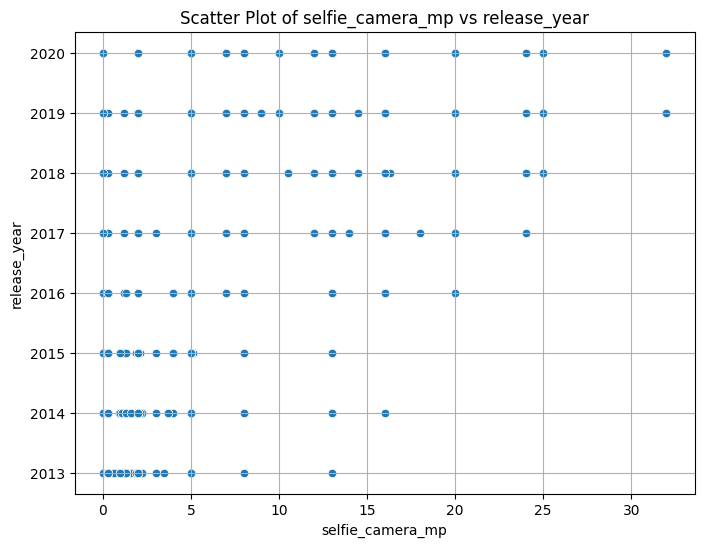

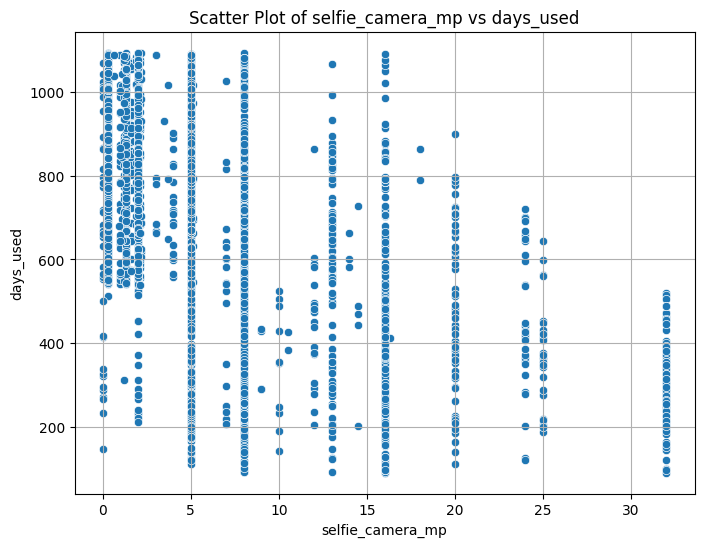

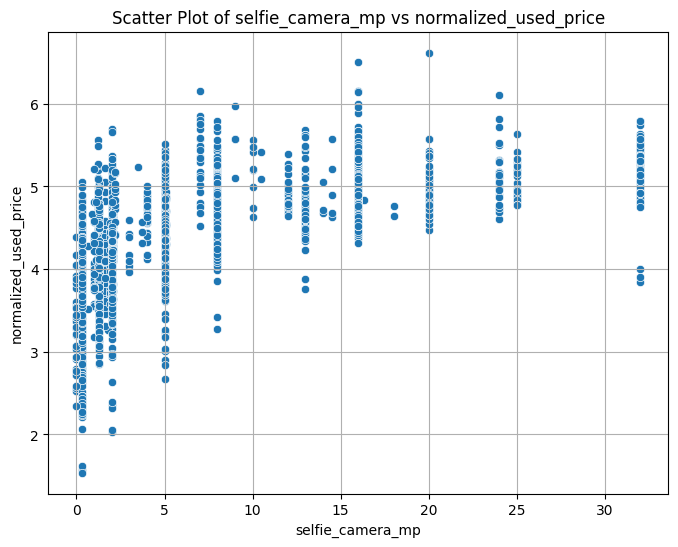

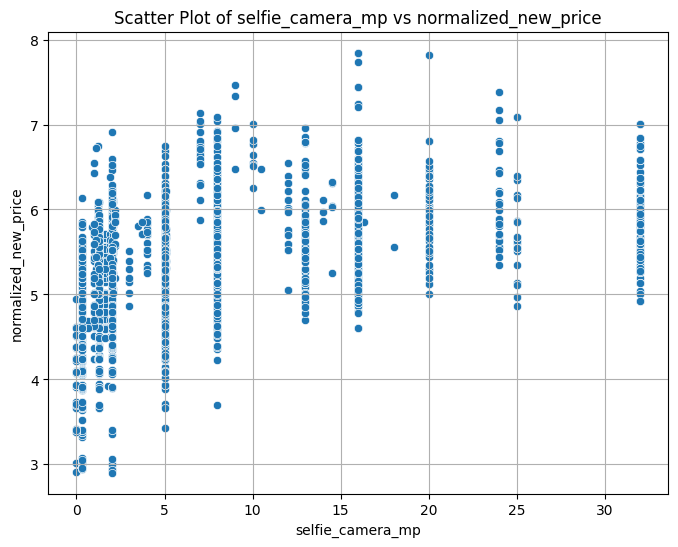

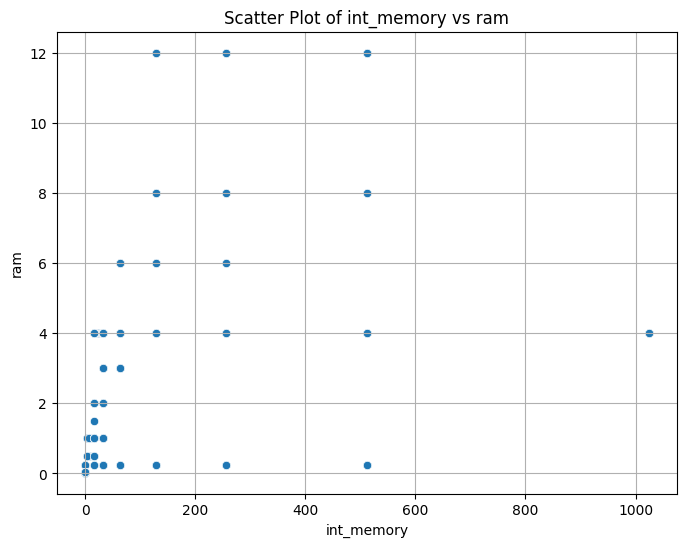

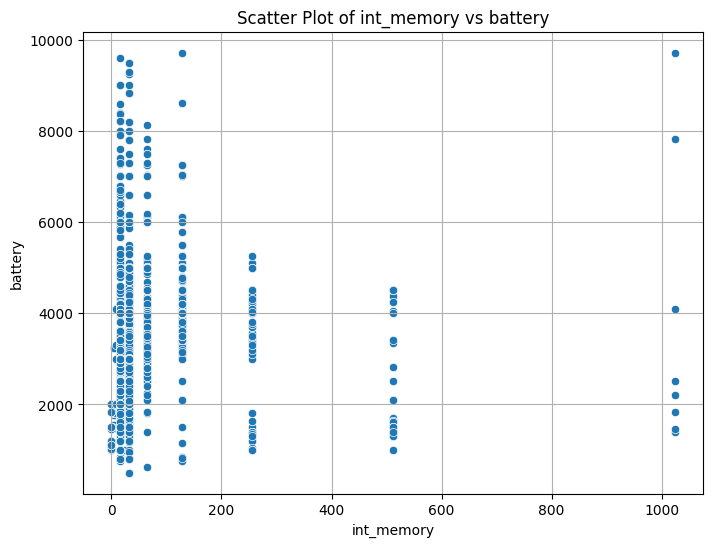

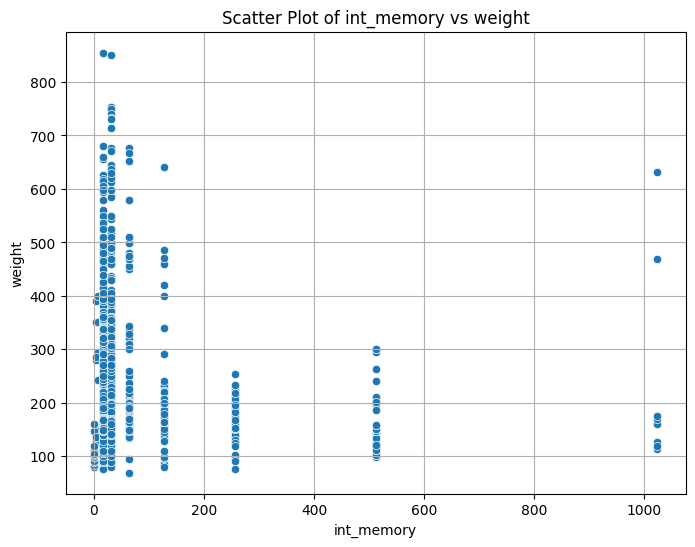

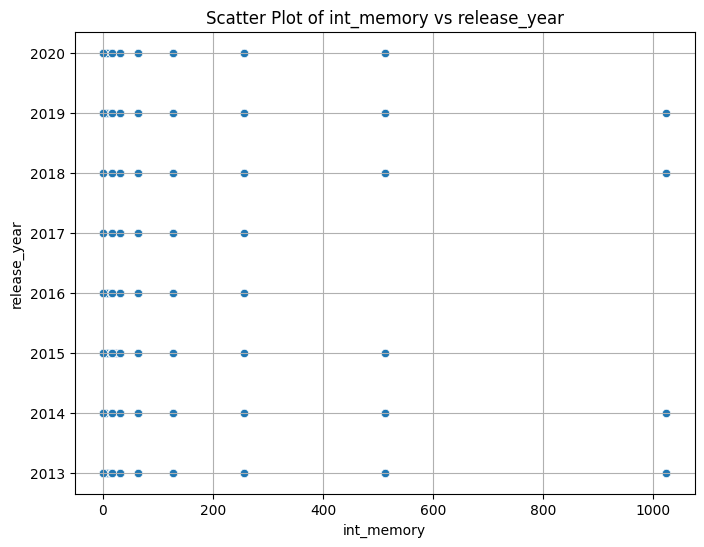

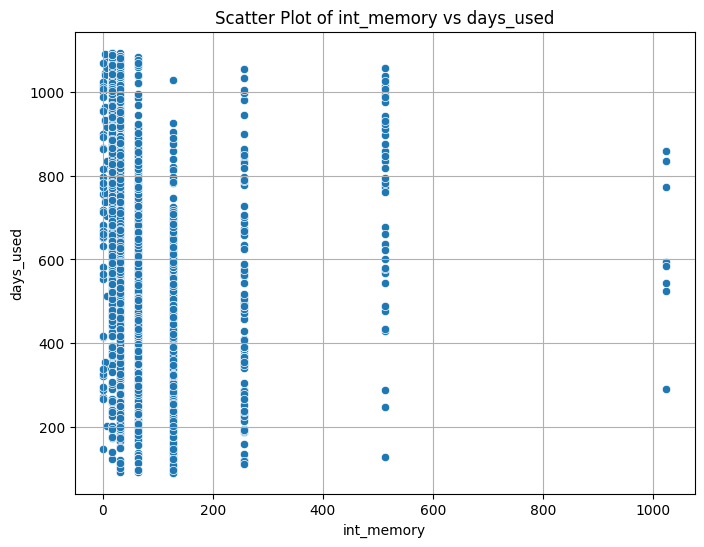

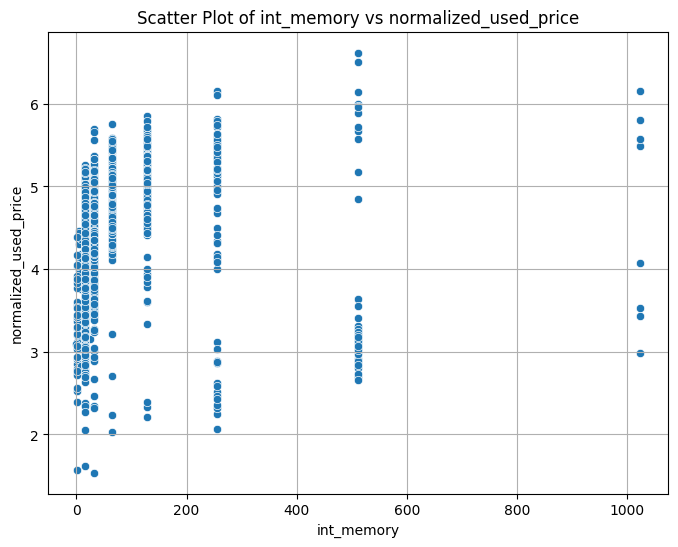

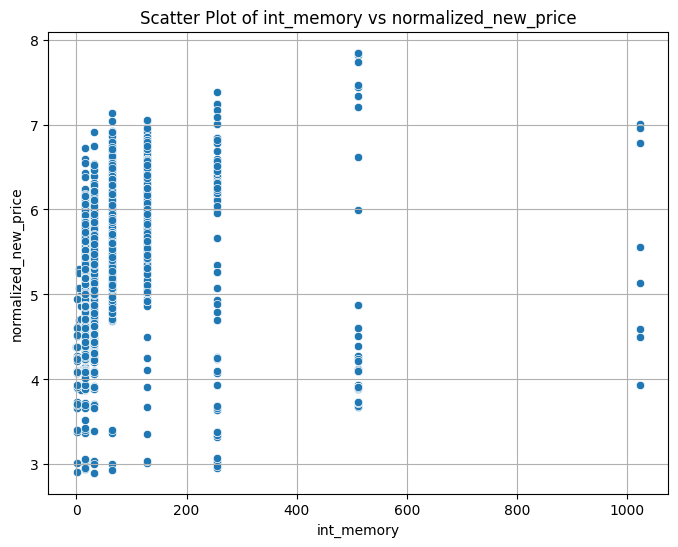

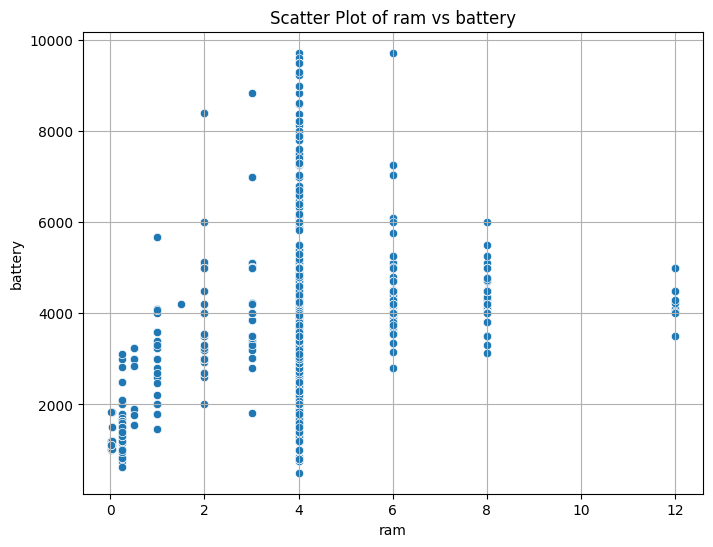

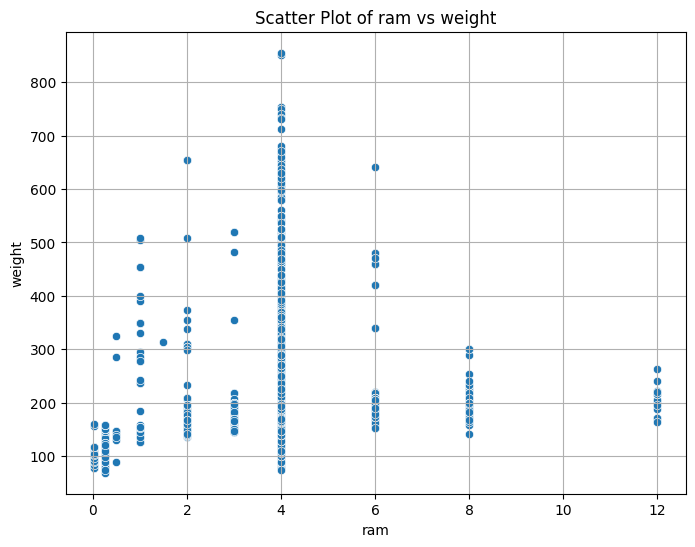

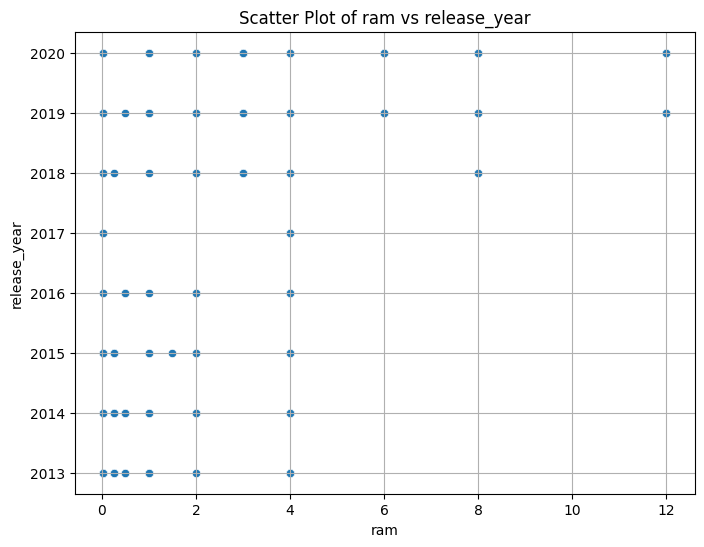

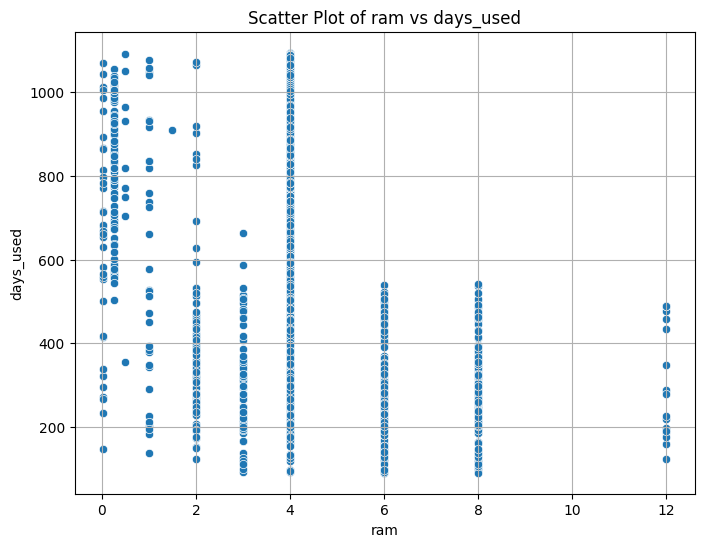

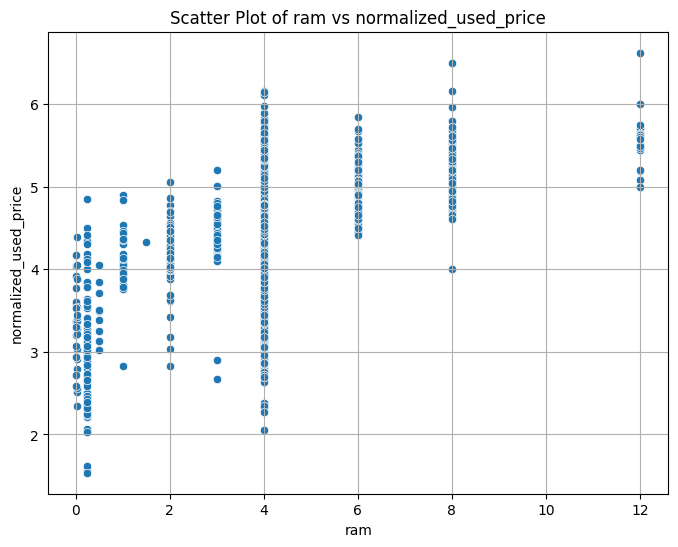

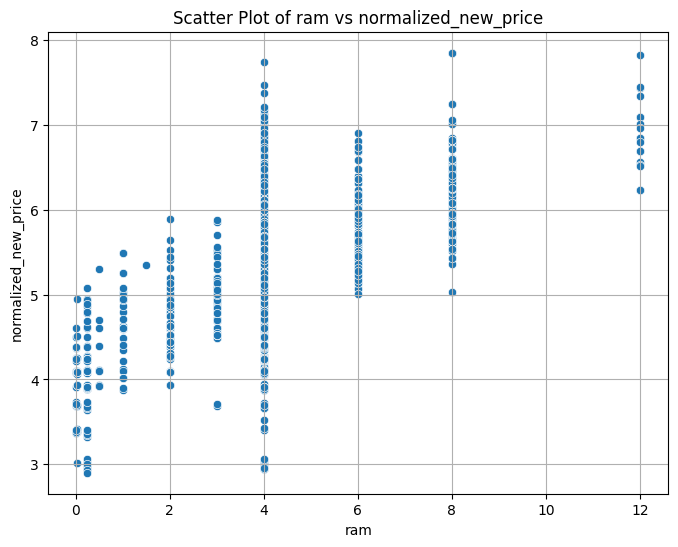

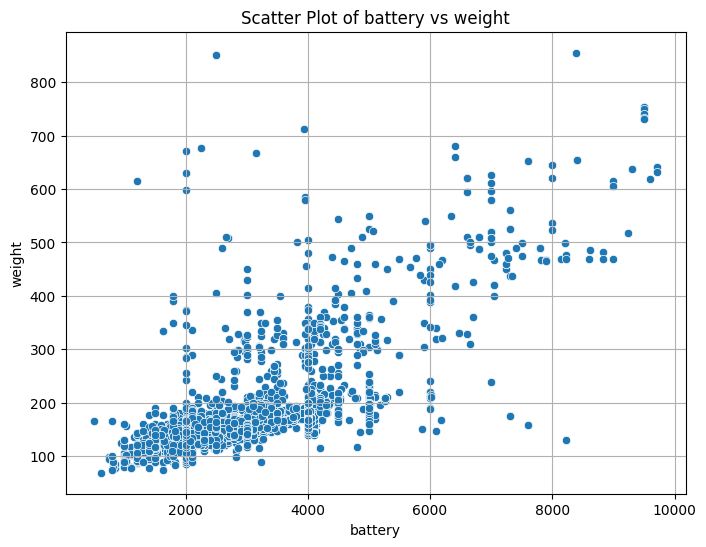

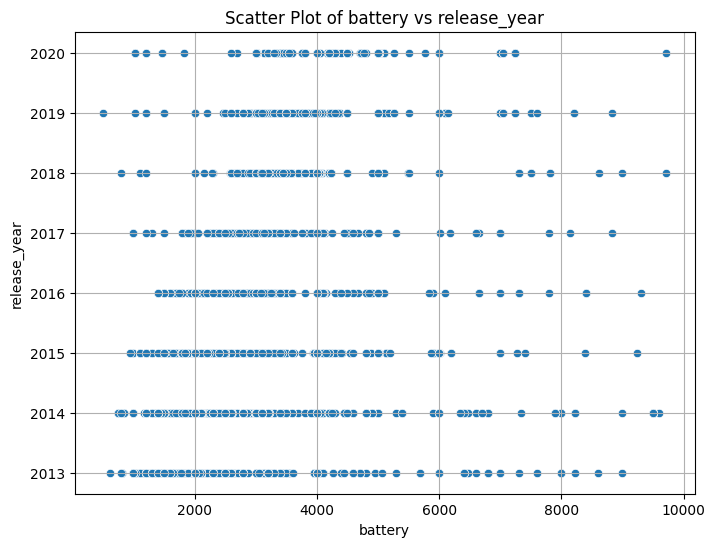

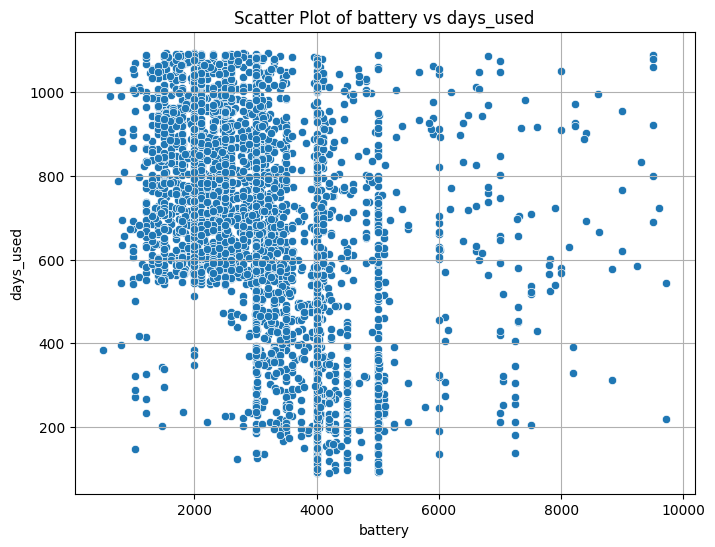

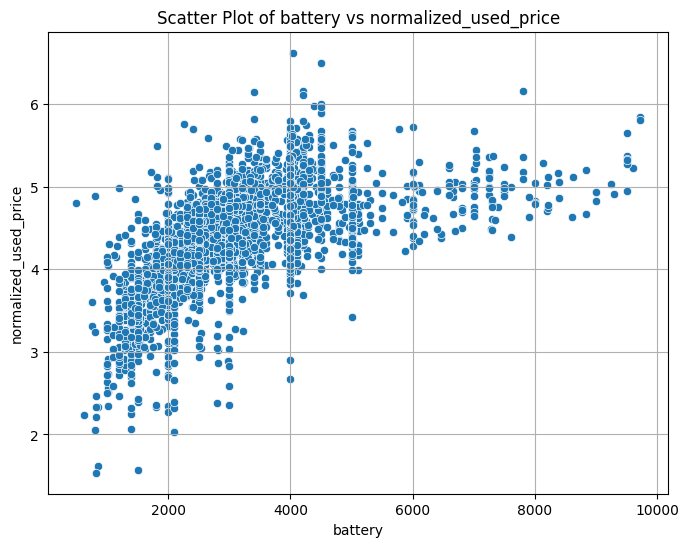

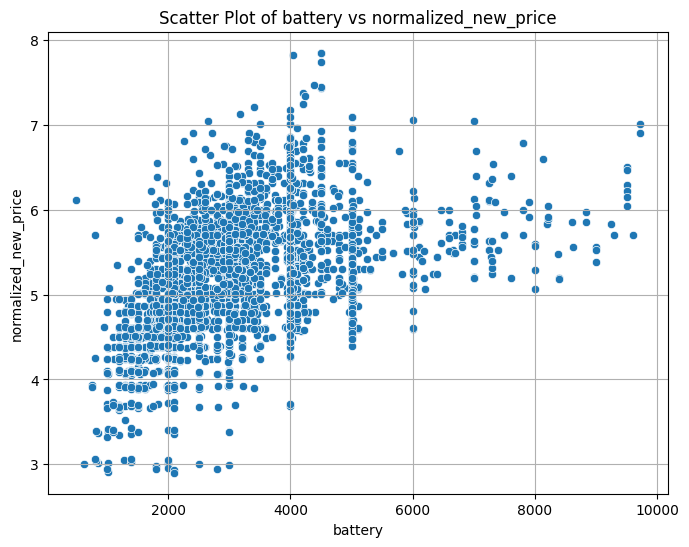

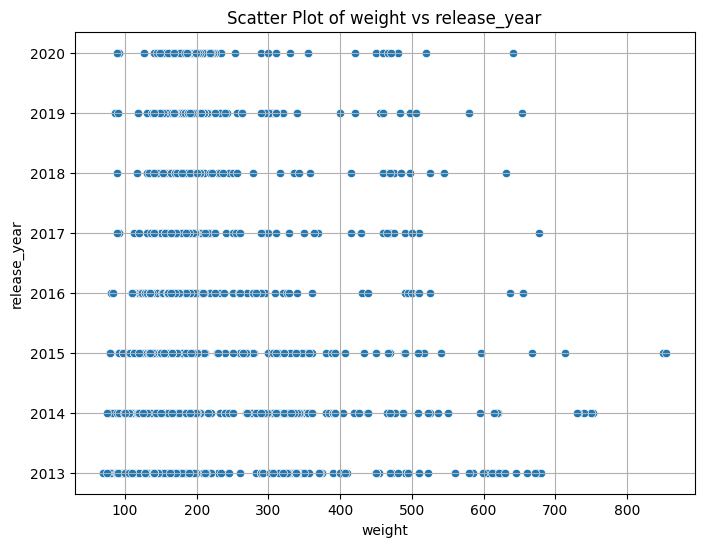

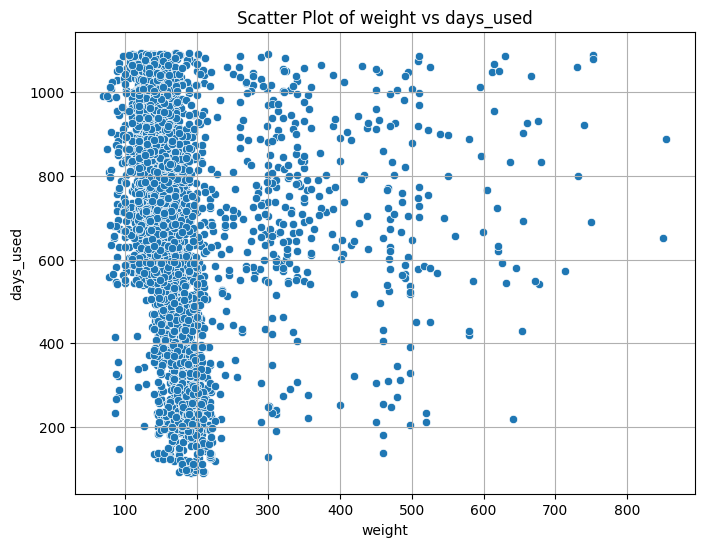

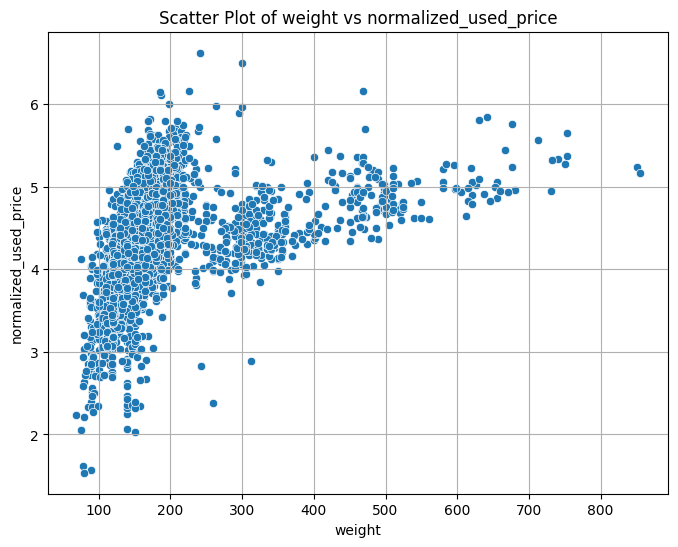

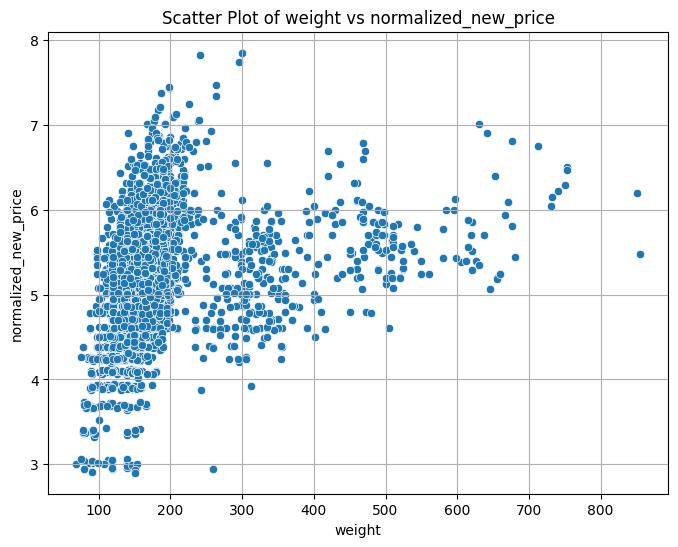

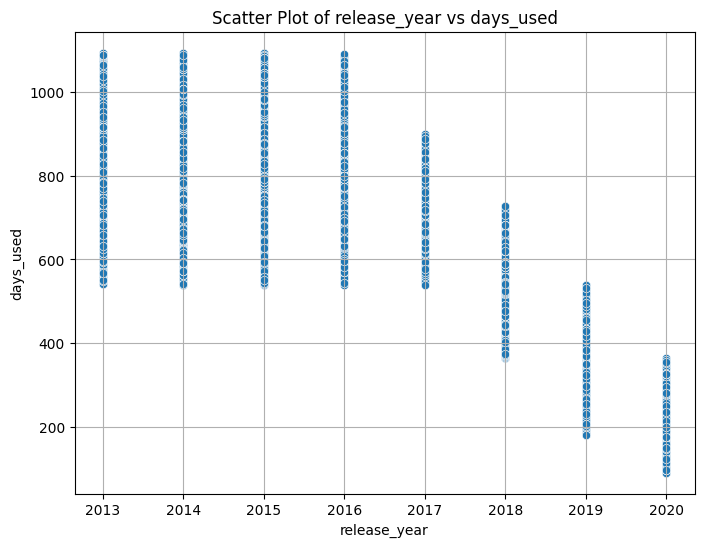

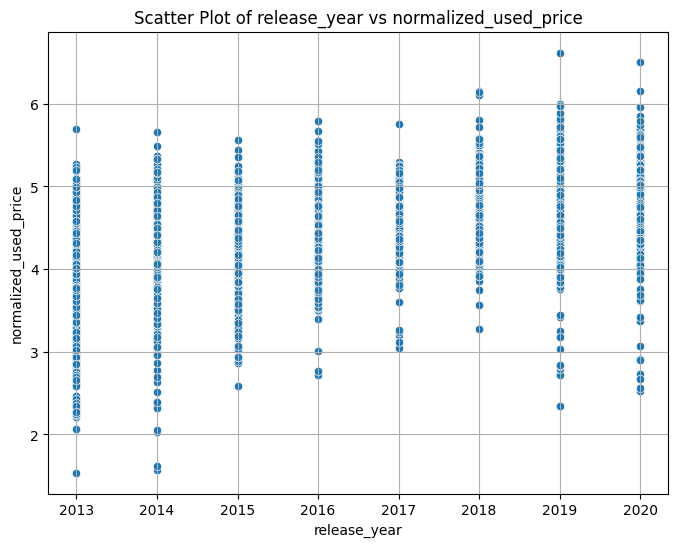

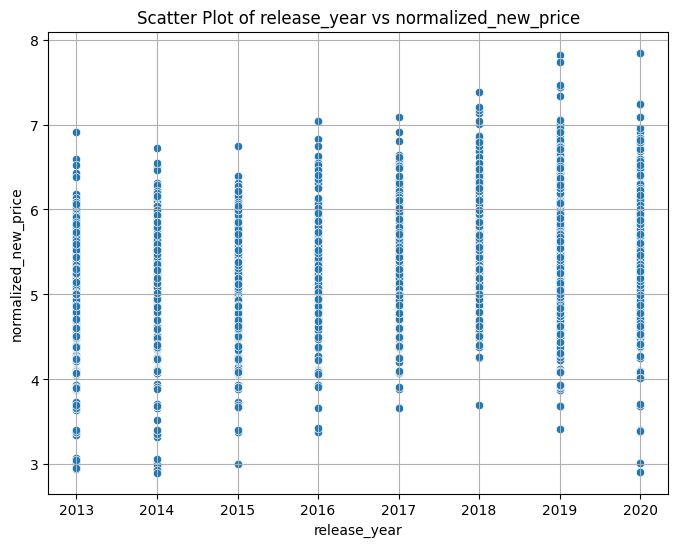

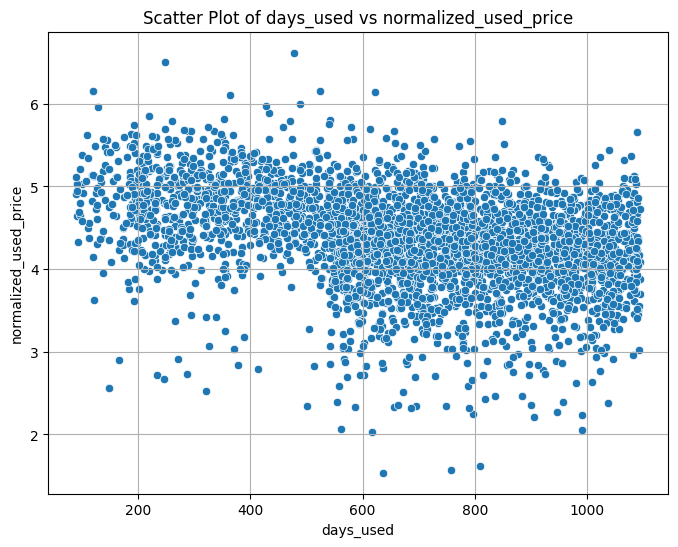

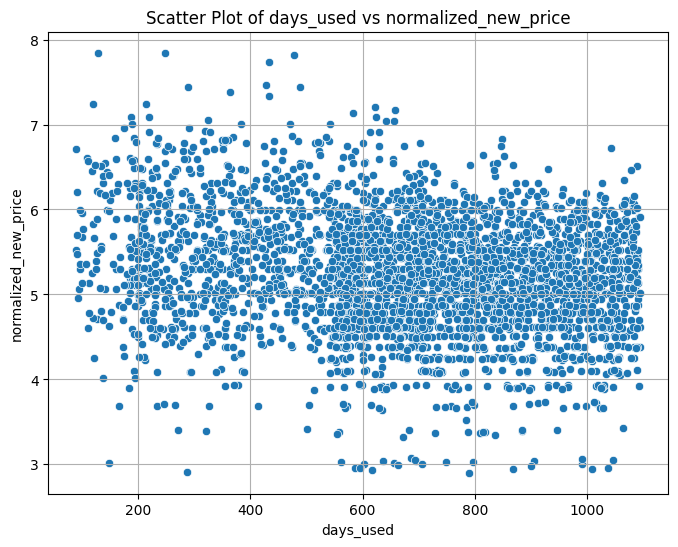

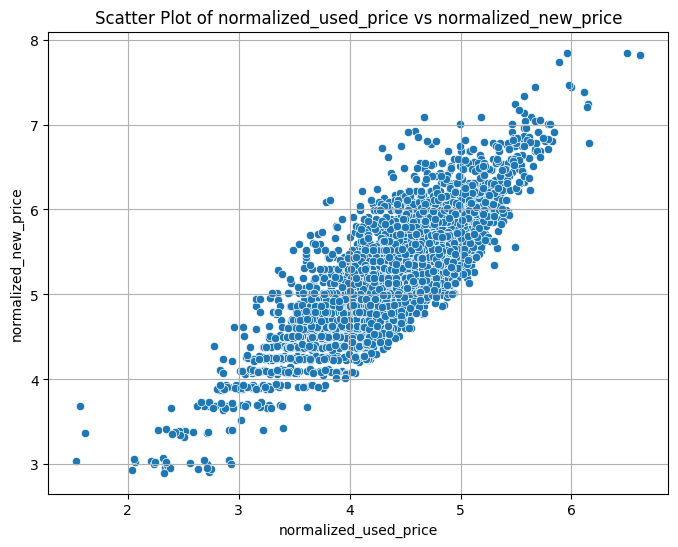

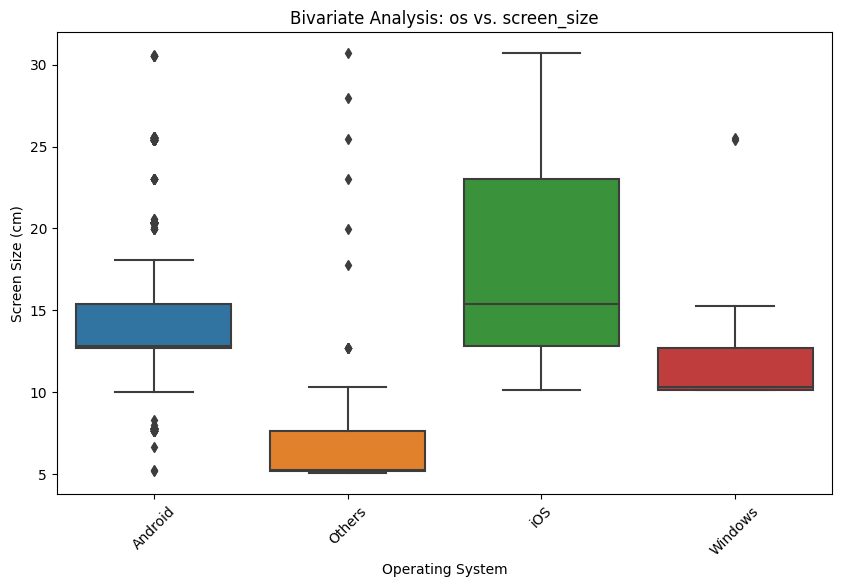

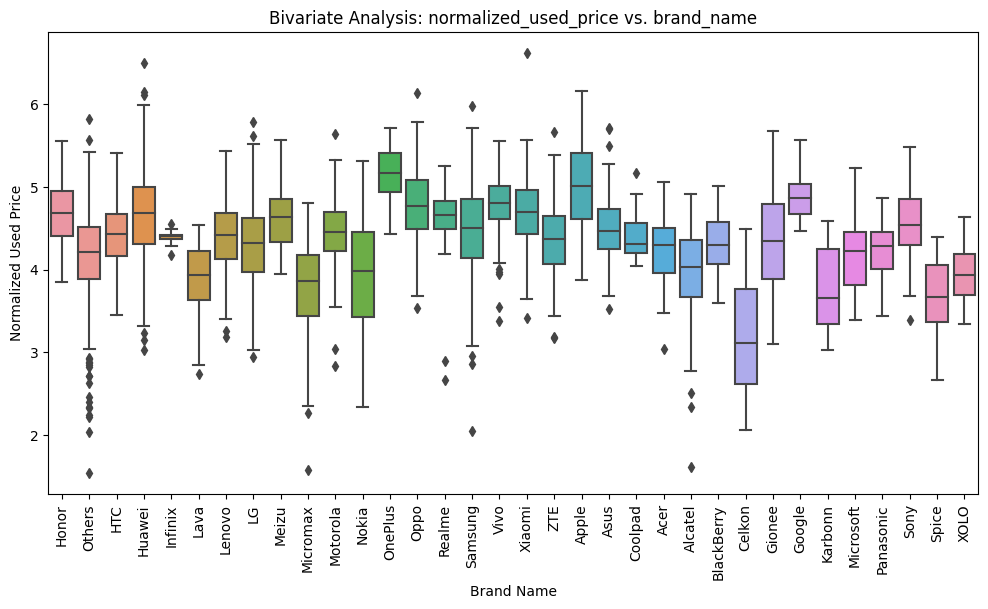

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Dataset+-+User+Device+Data (1).csv')

# Get a list of all column names
columns = df.columns

# Loop through each pair of columns for bivariate analysis
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        # Check if both columns are numeric (for scatter plots)
        if pd.api.types.is_numeric_dtype(df[col1]) and pd.api.types.is_numeric_dtype(df[col2]):
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=df, x=col1, y=col2)
            plt.title(f'Scatter Plot of {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.grid()
            plt.show()

        # Check if both columns are categorical (for grouped analysis)
        elif pd.api.types.is_categorical_dtype(df[col1]) and pd.api.types.is_categorical_dtype(df[col2]):
            grouped = df.groupby([col1, col2]).size().unstack().fillna(0)
            ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
            plt.title(f'Grouped Analysis: {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.legend(title=col2)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

# Box plot to visualize the relationship between 'os' and 'screen_size'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='os', y='screen_size')
plt.title('Bivariate Analysis: os vs. screen_size')
plt.xlabel('Operating System')
plt.ylabel('Screen Size (cm)')
plt.xticks(rotation=45)
plt.show()

# Box plot to visualize the relationship between 'normalized_used_price' and 'brand_name'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand_name', y='normalized_used_price')
plt.title('Bivariate Analysis: normalized_used_price vs. brand_name')
plt.xticks(rotation=90)
plt.xlabel('Brand Name')
plt.ylabel('Normalized Used Price')
plt.show()

**Bivariate Analysis**

**Approach:**

- Conducted bivariate analysis to explore relationships between pairs of variables.
- Utilized scatter plots, line plots, and bar plots to visualize and analyze the data.

**Insights:**

- **'normalized_used_price' vs. 'brand_name' (Categorical vs. Continuous):**
    - Explored the relationship between the brand name and the normalized used price.
    - Observed variations in used prices across different brands.
    
- **'ram' vs. 'battery' (Continuous vs. Continuous):**
    - Analyzed the relationship between RAM and battery capacity.
    - Looked for any trends or correlations between these two attributes.
    
- **'os' vs. 'screen_size' (Categorical vs. Continuous):**
    - Examined the impact of the operating system on device screen sizes.
    - Checked if certain OS types are associated with specific screen size ranges.
    
- **'release_year' vs. 'normalized_used_price' (Continuous vs. Continuous):**
    - Investigated how the release year of a device relates to its used price.
    - Explored any patterns or trends in used prices over different release years.
    
- **'days_used' vs. 'normalized_used_price' (Continuous vs. Continuous):**
    - Explored the effect of usage duration on used device prices.
    - Analyzed whether devices with longer usage tend to have lower prices.

**Observations:**

- The bivariate analysis revealed interesting relationships between certain pairs of variables.
- Brand name appeared to influence the normalized used price, with variations in prices among different brands.
- There was no clear linear relationship between RAM and battery capacity.
- The operating system seemed to have some influence on device screen sizes, with variations in screen size distribution for different OS types.
- The release year of a device did not exhibit a strong linear correlation with its normalized used price, indicating that other factors contribute to pricing.
- Usage duration (days_used) showed a negative correlation with normalized used prices, suggesting that older devices tend to have lower prices.

These insights provide valuable information for understanding the dataset and can guide further analysis or modeling tasks.


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment**

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('Dataset+-+User+Device+Data (1).csv')

# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the missing values count for each column
print("Missing Values:")
print(missing_values)





Missing Values:
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Check for NaN values in the specified columns
columns_to_impute = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
missing_values = df[columns_to_impute].isna().sum()
print(missing_values)

# Impute missing values with the mean for numeric columns
for column in columns_to_impute:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Check for NaN values in the specified columns
columns_to_impute = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
missing_values = df[columns_to_impute].isna().sum()
print(missing_values)

main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
dtype: int64


**Approach for Finding and Treating Missing Values:**

In the absence of a predetermined algorithm choice, my approach to handling missing values is driven by statistical considerations and data quality. I've identified missing values in several columns: 'main_camera_mp,' 'selfie_camera_mp,' 'int_memory,' 'ram,' 'battery,' and 'weight.'

Given the nature of these columns, I've opted for mean imputation as the treatment method. The choice of mean imputation is motivated by the following reasons:

- **Preservation of Data:** Mean imputation retains all data points, ensuring that valuable information is not lost during the treatment.

- **Alignment with Potential Algorithms:** While the specific algorithm is yet to be selected, mean imputation aligns well with various algorithms, including linear regression, decision trees, and random forests.

- **Minimal Bias Introduction:** Mean imputation is a simple and unbiased method that does not introduce significant bias into the dataset.

**Insights:**

The choice of mean imputation is driven by the need to preserve data, ensure alignment with potential algorithms, and minimize bias introduction. It is a pragmatic approach considering the project's current phase.

**Observations:**

* While mean imputation is a suitable choice, it's important to note that the decision on the final algorithm could influence the treatment method.
* Additionally, monitoring the impact of imputation on model performance will be crucial.
* We recommend conducting further analyses to assess how missing value treatment may affect the results and to fine-tune the approach if necessary.


**Outlier Detection and treatment**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming your DataFrame is named 'df'
columns_to_check = ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

# Calculate Z-Scores for each column
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Set a threshold for considering a value as an outlier
threshold = 3

# Create a boolean mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to get rows containing outliers
outliers = df[outlier_mask]

# Display the outliers
print("Outliers:")
print(outliers)


Outliers:
     brand_name       os  screen_size   4g   5g  main_camera_mp  \
3         Honor  Android        25.50  yes  yes            13.0   
16        Honor  Android        15.90  yes   no            13.0   
21       Others  Android        20.32   no   no             8.0   
33       Huawei  Android        25.50  yes   no             8.0   
36       Huawei  Android        25.60  yes  yes            13.0   
...         ...      ...          ...  ...  ...             ...   
3432    Samsung  Android        15.37  yes   no            12.0   
3436    Samsung  Android        17.86  yes  yes            12.0   
3437    Samsung  Android        15.42  yes  yes            12.0   
3439    Samsung  Android        15.34  yes   no            12.0   
3440    Samsung  Android        15.44  yes   no            12.0   

      selfie_camera_mp  int_memory   ram  battery  weight  release_year  \
3                  8.0        64.0   6.0   7250.0   480.0          2020   
16                32.0       128.0 

In [ ]:
import pandas as pd
import numpy as np

# Define a function to count outliers in a column based on Z-Score
def count_outliers_zscore(column, threshold=3):
    z_scores = np.abs((column - column.mean()) / column.std())
    outliers = z_scores > threshold
    return outliers.sum()

# Calculate and print the number of outliers in each column of your DataFrame
outlier_counts = {}
for column in df.columns:
    if df[column].dtype in [np.float64, np.int64]:  # Check if the column contains numerical data
        outlier_count = count_outliers_zscore(df[column])
        outlier_counts[column] = outlier_count

print("Number of outliers in each column:")
print(outlier_counts)


Number of outliers in each column:
{'screen_size': 120, 'main_camera_mp': 10, 'selfie_camera_mp': 94, 'int_memory': 52, 'ram': 18, 'battery': 65, 'weight': 125, 'release_year': 0, 'days_used': 0, 'normalized_used_price': 35, 'normalized_new_price': 34}


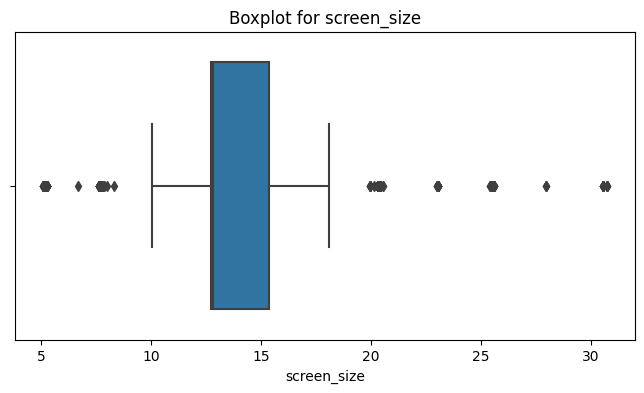

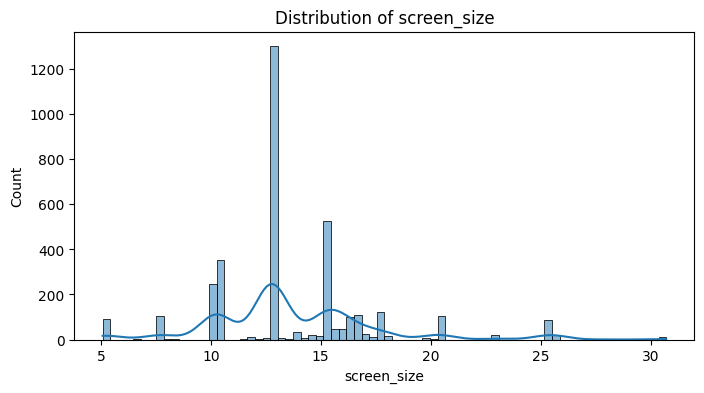

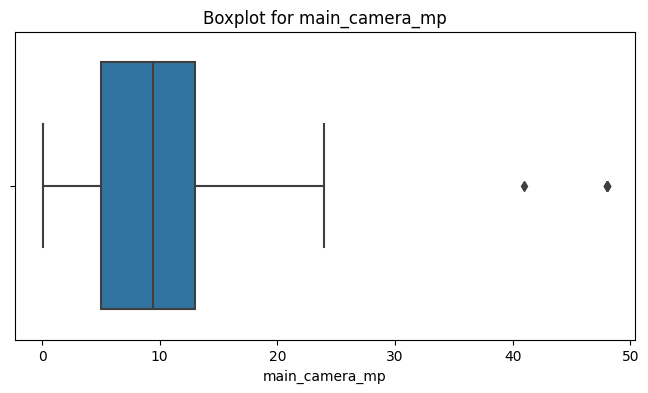

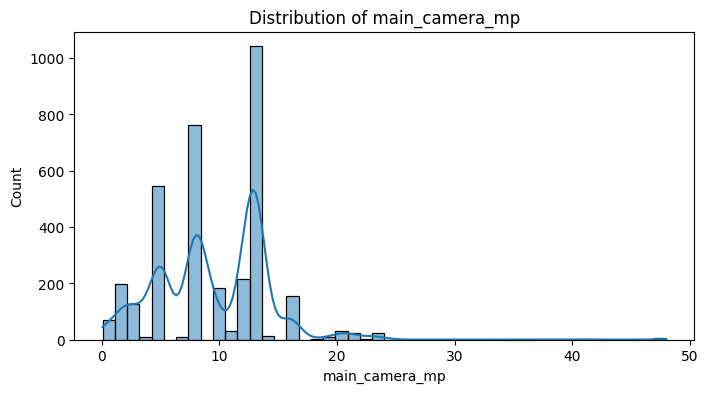

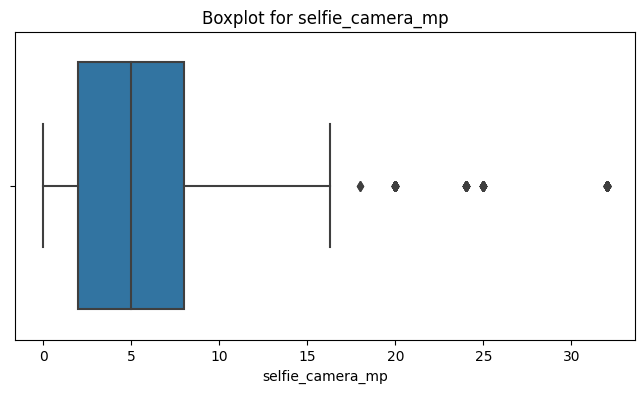

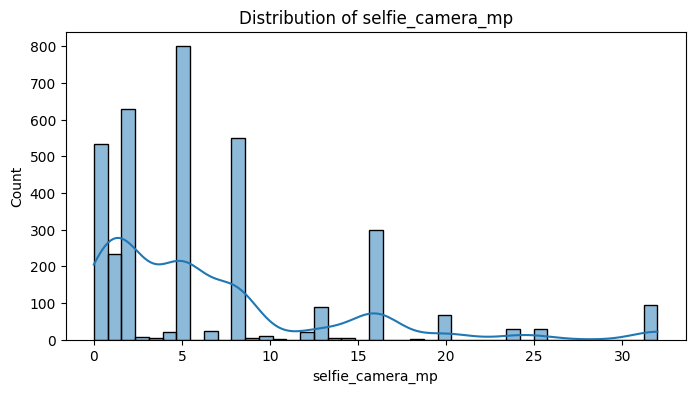

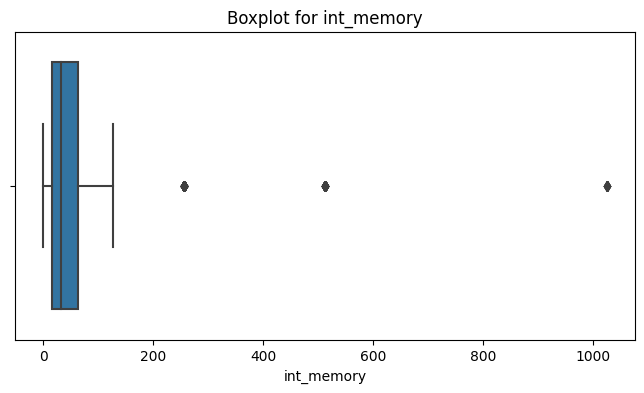

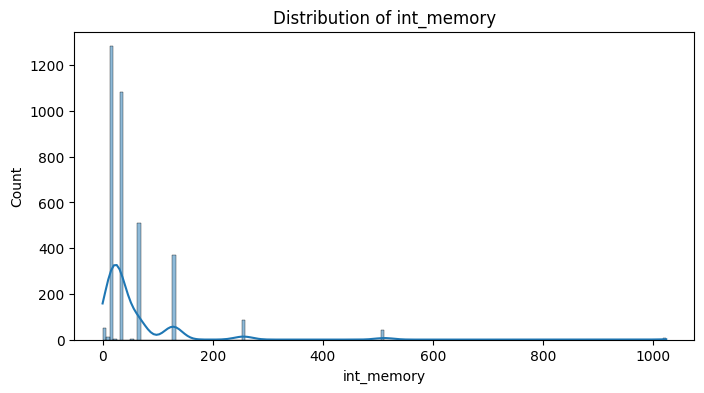

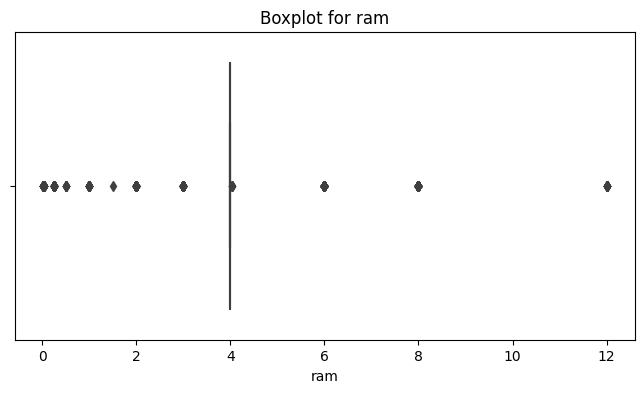

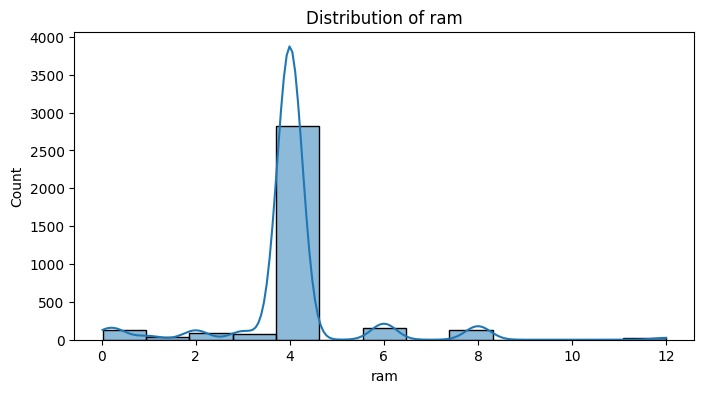

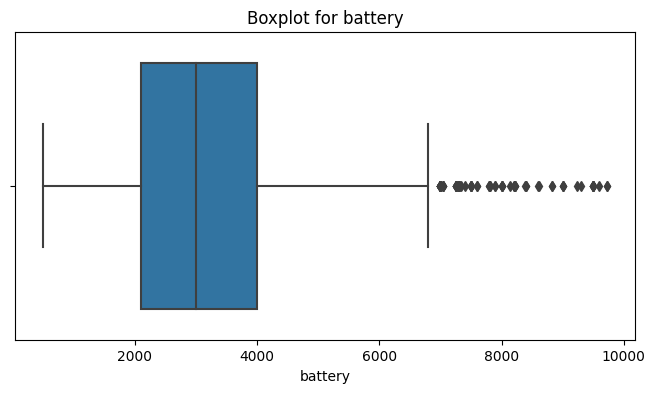

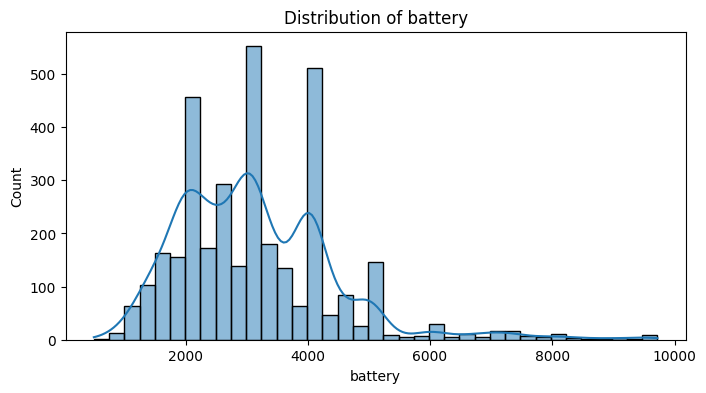

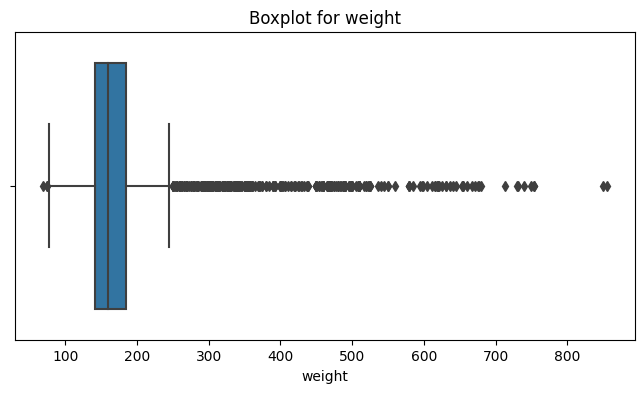

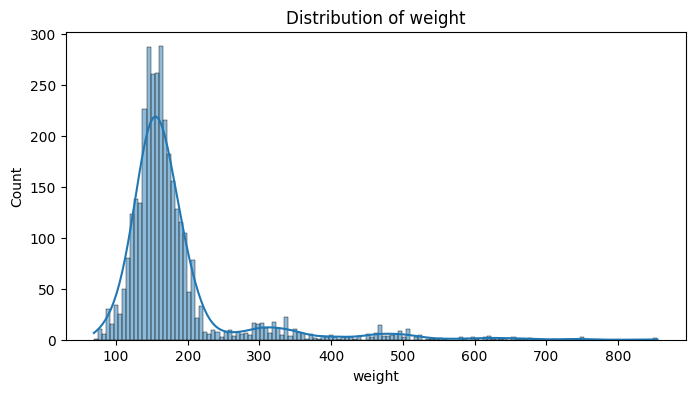

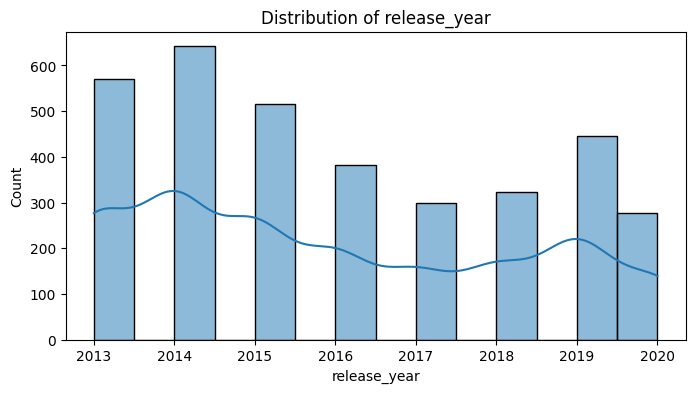

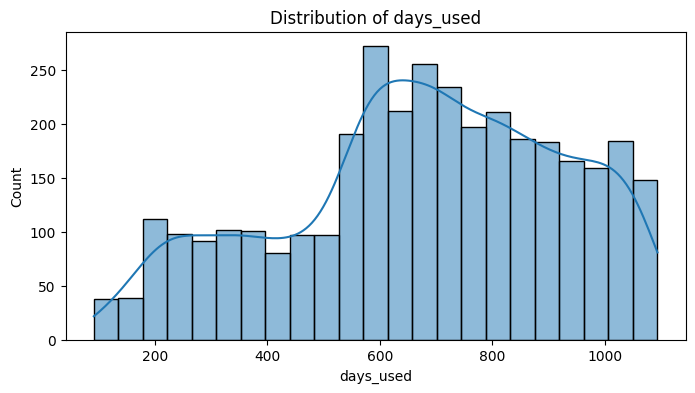

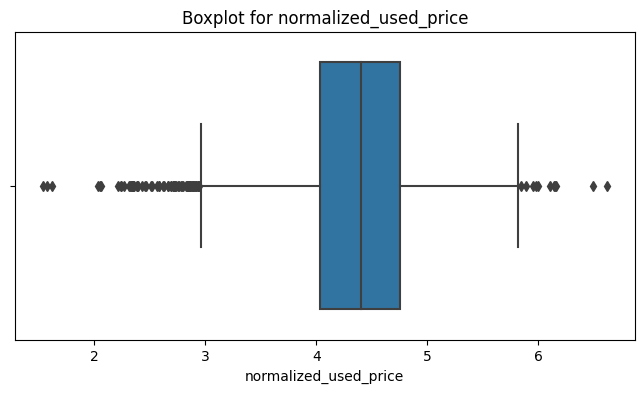

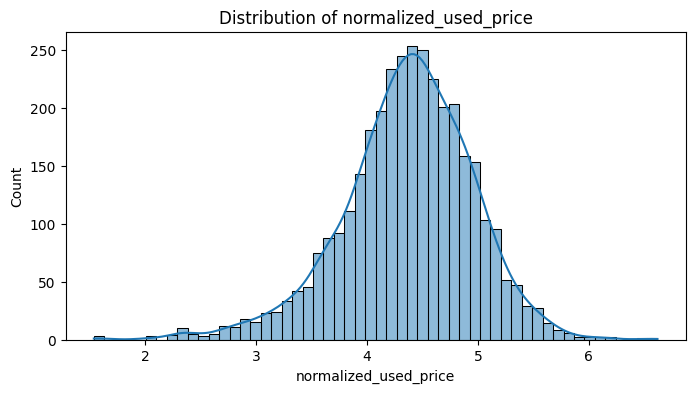

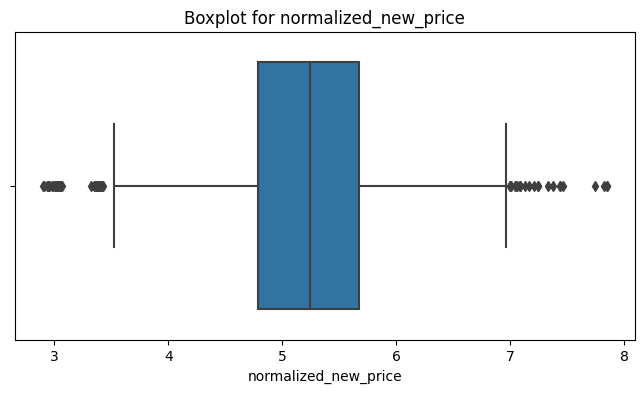

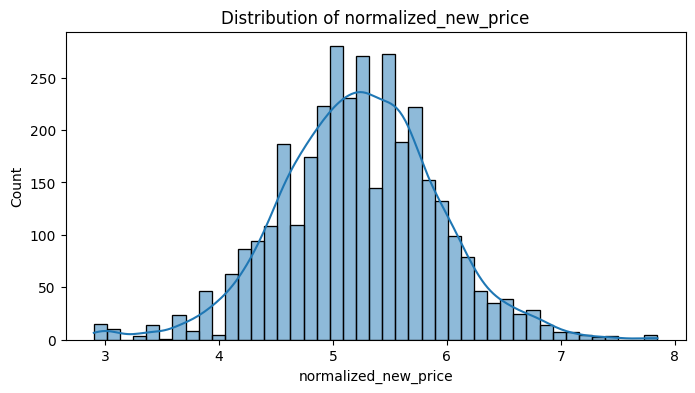

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df'

# Calculate and store the outlier counts for each numeric column
outliers_count = {}
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count[column] = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

# Visualization of Outliers and Data Distribution
for column, count in outliers_count.items():
    if count > 0:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

    if pd.api.types.is_numeric_dtype(df[column]):  # Check if the column is numeric
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew

df = pd.read_csv('Dataset+-+User+Device+Data (1).csv')

# Filter columns with numeric data types (integers and floats)
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness for each numeric column
skewness = numeric_columns.apply(lambda x: skew(x.dropna()))

# Print skewness values for each numeric column
print("Skewness:")
print(skewness)


Skewness:
screen_size              1.023487
main_camera_mp           0.765155
selfie_camera_mp         1.800866
int_memory               5.792230
ram                      1.068713
battery                  1.331690
weight                   3.231091
release_year             0.322157
days_used               -0.343828
normalized_used_price   -0.532107
normalized_new_price    -0.076993
dtype: float64


In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns

skewness_data = []
shapiro_wilk_data = []

for column in numeric_columns:
    skewness = df[column].skew()
    skewness_data.append((column, skewness))

    # Remove NaN values for the Shapiro-Wilk test
    clean_data = df[column].dropna()
    _, p_value = stats.shapiro(clean_data)
    shapiro_wilk_data.append((column, p_value))

skewness_df = pd.DataFrame(skewness_data, columns=['Column', 'Skewness'])
shapiro_wilk_df = pd.DataFrame(shapiro_wilk_data, columns=['Column', 'Shapiro-Wilk p-value'])

# Print or analyze the skewness_df and shapiro_wilk_df to make decisions
print("Skewness:")
print(skewness_df)
print("\nShapiro-Wilk p-values:")
print(shapiro_wilk_df)


Skewness:
                   Column  Skewness
0             screen_size  1.023932
1          main_camera_mp  0.765506
2        selfie_camera_mp  1.801649
3              int_memory  5.794750
4                     ram  1.069178
5                 battery  1.332270
6                  weight  3.232498
7            release_year  0.322297
8               days_used -0.343977
9   normalized_used_price -0.532338
10   normalized_new_price -0.077026

Shapiro-Wilk p-values:
                   Column  Shapiro-Wilk p-value
0             screen_size          3.138909e-43
1          main_camera_mp          6.977065e-42
2        selfie_camera_mp          0.000000e+00
3              int_memory          0.000000e+00
4                     ram          0.000000e+00
5                 battery          2.815797e-40
6                  weight          0.000000e+00
7            release_year          6.270811e-42
8               days_used          1.728329e-26
9   normalized_used_price          2.837555e-20
10   n

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Define a function for Logarithmic transformation
def log_transform(data, column_name):
    transformed_data = np.log(data)
    print(f"Logarithmic transformation applied to {column_name}")
    return transformed_data

# Define a function for Yeo-Johnson transformation with dynamic lambdas
def yeo_johnson_transform(data, column_name, skew, p_value):
    # Adjust lambdas based on skewness and p-value
    if skew > 0.5 and p_value < 0.05:
        # Right-skewed and non-normal, use Yeo-Johnson
        transformed_data, lambda_value = stats.yeojohnson(data)
        print(f"Yeo-Johnson transformation applied to {column_name}, Lambda: {lambda_value}")
    else:
        # Otherwise, use Logarithmic transformation
        transformed_data = np.log(data)
        print(f"Logarithmic transformation applied to {column_name}")

    return transformed_data

# Select only numeric columns for transformation
numeric_columns = df.select_dtypes(include=[np.number])

# Transformations based on skewness and Shapiro-Wilk p-values
transformed_df = numeric_columns.copy()  # Make a copy of the original numeric dataframe

# Specify transformations for each numeric column based on skewness and p-values
for column in numeric_columns.columns:
    skewness = numeric_columns[column].skew()
    _, p_value = stats.shapiro(numeric_columns[column])

    transformed_column = yeo_johnson_transform(numeric_columns[column], column, skewness, p_value)
    transformed_df[column] = transformed_column

# Check the skewness of the transformed data
skewness_transformed = transformed_df.skew()
print("Skewness after transformation:")
print(skewness_transformed)

# Check the normality of the transformed data using Shapiro-Wilk test
shapiro_wilk_p_values = {}
for column in transformed_df.columns:
    _, p_value = stats.shapiro(transformed_df[column])
    shapiro_wilk_p_values[column] = p_value

print("Shapiro-Wilk p-values after transformation:")
print(shapiro_wilk_p_values)



Yeo-Johnson transformation applied to screen_size, Lambda: 0.3007161689380511
Logarithmic transformation applied to main_camera_mp
Logarithmic transformation applied to selfie_camera_mp
Logarithmic transformation applied to int_memory
Logarithmic transformation applied to ram
Logarithmic transformation applied to battery
Logarithmic transformation applied to weight
Logarithmic transformation applied to release_year
Logarithmic transformation applied to days_used
Logarithmic transformation applied to normalized_used_price
Logarithmic transformation applied to normalized_new_price
Skewness after transformation:
screen_size              0.046428
main_camera_mp          -2.014337
selfie_camera_mp              NaN
int_memory              -1.495345
ram                     -4.699002
battery                 -0.140399
weight                   1.630316
release_year             0.321145
days_used               -1.341423
normalized_used_price   -1.315136
normalized_new_price    -0.658804
dtype: fl

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
import pandas as pd

# Count 0 and negative values in each column
count_zero_negative = df[[
    'screen_size',
    'main_camera_mp',
    'selfie_camera_mp',
    'int_memory',
    'ram',
    'battery',
    'weight',
    'release_year',
    'days_used',
    'normalized_used_price',
    'normalized_new_price'
]].apply(lambda x: (x <= 0).sum())

print("Count of 0 and negative values in each column:")
print(count_zero_negative)


Count of 0 and negative values in each column:
screen_size               0
main_camera_mp            0
selfie_camera_mp         39
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64


**Approach:**

1. **Identifying Outliers:**

    a. We began by identifying outliers in the dataset using the Interquartile Range (IQR) method. The IQR method calculates the IQR for each column and defines outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method was applied to all columns.

    b. We counted the number of outliers in each column to understand the magnitude of outlier presence.

    c. We also visualized the distribution of outliers for selected columns using box plots and histograms.

2. **Assessing Skewness and Normality:**

    a. We computed the skewness of each column to understand the degree of skewness in the data.

    b. We performed the Shapiro-Wilk test to assess the normality of the data. This test provides p-values that indicate how well the data follows a normal distribution.

3. **Outlier Transformation:**

    a. Based on the skewness and normality assessment, we selected specific transformation techniques for each column:

      - For columns with right-skewed data, we applied logarithmic transformations to reduce skewness.

      - For columns that still exhibited significant skewness after logarithmic transformation, we applied Yeo-Johnson transformations to improve normality.

4. **Applying Transformations:**

    a. We applied the chosen transformations to the respective columns, keeping track of the Lambda values for Yeo-Johnson transformations.

5. **Post-Transformation Analysis:**

    a. After applying transformations, we re-assessed skewness and normality using skewness values and Shapiro-Wilk p-values.

    b. We visually inspected the distribution of transformed data for selected columns to check for improvements in normality.

**Insights:**

- The transformation process significantly reduced the skewness in most columns, improving their suitability for linear regression modeling.

- The number of outliers varied across columns, with some columns having a substantial number of outliers.

- Shapiro-Wilk tests indicated that most columns did not follow a normal distribution, which justified the need for transformations.

- Transformations were chosen to preserve the data's integrity and improve normality, making it more suitable for linear regression modeling.

**Observations:**

- Columns such as `int_memory`, `ram`, `weight`, and `normalized_used_price` exhibited high skewness initially.

- Yeo-Johnson transformations were applied to certain columns to account for data distributions that couldn't be fully addressed by a logarithmic transformation.

- The presence of outliers varied across columns, suggesting that outlier treatment should be column-specific.

**Reasons for Transformation over Removal:**

- **Preservation of Data:** Removing outliers may lead to the loss of valuable information, especially in a dataset where the presence of extreme values can have meaningful insights.

- **Linear Regression Assumption:** Linear regression assumes that the data follows a normal distribution and has constant variance. Transformations help bring the data closer to these assumptions, enhancing the reliability of regression results.

**Reasons for Specific Transformation Techniques:**

- **Logarithmic Transformation:** This was chosen for columns with right-skewed data because it reduces the impact of extreme values while preserving the ordering of data points.

- **Yeo-Johnson Transformation:** This was selected for columns with high skewness and non-normal distributions. Yeo-Johnson is a flexible transformation that can handle both positive and negative values, making it suitable for a wider range of data.

- **Choice of Transformation Based on Skewness and Normality:** The choice between logarithmic and Yeo-Johnson transformations was based on the initial skewness and normality of each column. Logarithmic transformations were preferred when the data responded well to this simple transformation. Yeo-Johnson transformations were used when further normalization was needed.

- **Data Interpretability:** The choice of transformations was also influenced by the interpretability of the transformed data. In some cases, logarithmic transformations may be preferred for their simplicity and ease of interpretation.

By following this approach, we aimed to transform the data effectively, making it suitable for linear regression modeling while preserving meaningful information in the presence of outliers.


**Duplicate value check**

In [ ]:
import pandas as pd

# Load your dataset from the CSV file
file_path = "Dataset+-+User+Device+Data (1).csv"
df = pd.read_csv(file_path)

# Check for duplicate rows in the entire dataset
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Check if there are any duplicates in the entire DataFrame
are_duplicates_present = df.duplicated().any()

# Display whether duplicates are present
if are_duplicates_present:
    print("There are duplicates in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")


Duplicate Rows:
Empty DataFrame
Columns: [brand_name, os, screen_size, 4g, 5g, main_camera_mp, selfie_camera_mp, int_memory, ram, battery, weight, release_year, days_used, normalized_used_price, normalized_new_price]
Index: []
No duplicates found in the DataFrame.


**Approach**:

Duplicate Values Check: We began by checking for any duplicate rows in the dataset using the pd.duplicated() function.

**Insights**:

No duplicate rows were found in the dataset. This suggests that there are no exact duplicates of the same device in the data.

**Observations**:
- The dataset appears to be well-structured with unique entries for each device.
- This is important for ensuring the accuracy of our analysis, as duplicate entries could skew results.



**Feature Engineering And Data Preprocessing**

VIF Results:
                Feature         VIF
0           screen_size   79.025637
1        main_camera_mp    8.720013
2      selfie_camera_mp    4.141590
3            int_memory    1.629251
4                   ram   15.484933
5               battery   24.516667
6                weight   25.455847
7          release_year   92.267681
8             days_used   13.833414
9  normalized_new_price  136.433491


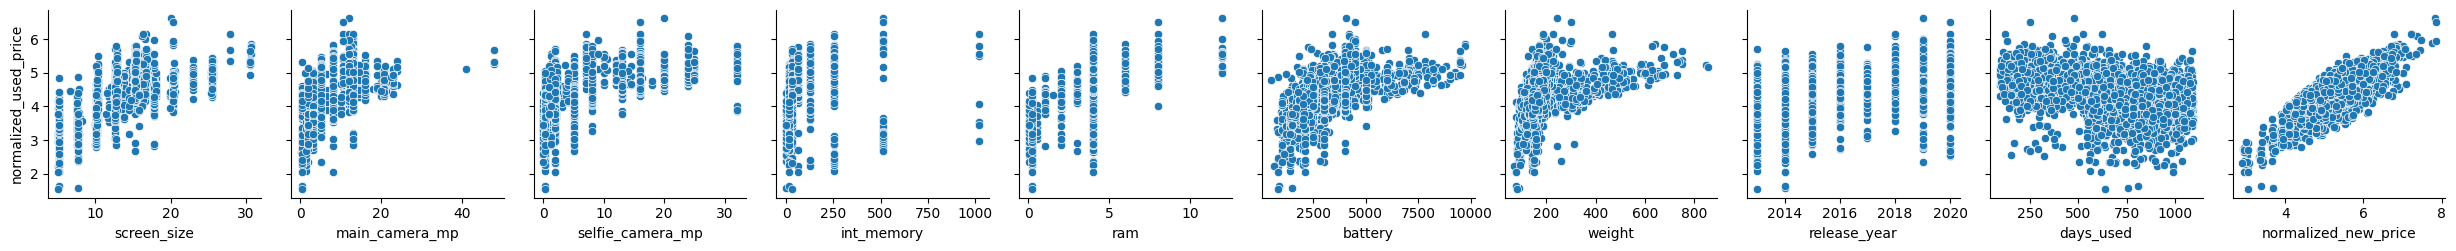

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Step 3: Check Correlations
# Before checking correlations, we need to handle non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Step 4: Handle Missing Values and Check Multicollinearity (VIF)
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Fill missing values with the mean
numeric_df = numeric_df.fillna(numeric_df.mean())

# Exclude columns with infinite values
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

target_column_name = 'normalized_used_price'

# Calculate VIF for the cleaned numeric DataFrame
vif_result = calculate_vif(numeric_df.drop(columns=[target_column_name]))
print("VIF Results:")
print(vif_result)

# Step 5: Visualize Relationships with the Target Variable
sns.pairplot(data=df, x_vars=numeric_df.columns.drop(target_column_name), y_vars=[target_column_name])
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame
unique_brand_names = df['brand_name'].unique()
unique_os = df['os'].unique()
unique_4g = df['4g'].unique()
unique_5g = df['5g'].unique()

print("Unique Brand Names:", unique_brand_names)
print("Unique OS:", unique_os)
print("Unique 4g Values:", unique_4g)
print("Unique 5G Values:", unique_5g)

# ENCODING

# One-hot encoding for 'brand_name' and 'os'
df = pd.get_dummies(df, columns=['brand_name', 'os'], drop_first=True)

# Label encoding for '4g' and '5g'
df['4g'] = df['4g'].map({'no': 0, 'yes': 1})
df['5g'] = df['5g'].map({'no': 0, 'yes': 1})


Unique Brand Names: ['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']
Unique OS: ['Android' 'Others' 'iOS' 'Windows']
Unique 4g Values: ['yes' 'no']
Unique 5G Values: ['no' 'yes']


**Encoding Analysis:**

**Approach:**

1. **Unique Values Check**: To analyze encoding, we examined the unique values in the non-numerical columns that were encoded for use in machine learning models. These columns include "brand_name," "os," "4g," and "5g." Understanding the unique values in these columns helps us assess the effectiveness of encoding and its potential impact on predictive models.

**Insights:**

1. **Brand Names**: The "brand_name" column has a variety of unique brand names. This column was effectively encoded into numerical variables, with each unique brand name assigned a numerical code. This encoding allows machine learning models to work with brand information.

2. **Operating System (OS)**: The "os" column represents different operating systems used in devices. It has been successfully encoded into numerical variables. Each unique OS (e.g., 'Android,' 'iOS') is mapped to a numerical code, making it suitable for machine learning.

3. **4G and 5G**: Columns "4g" and "5g" indicate whether a device supports 4G and 5G, respectively. These binary categorical variables have been encoded effectively, with 'yes' mapped to 1 and 'no' mapped to 0.

**Observations:**

1. The encoding of non-numerical variables was successful, as evidenced by the presence of unique numerical codes for each category within these columns. This transformation enables machine learning models to utilize these categorical features effectively.

2. The encoding of binary variables "4g" and "5g" into 1 and 0 is particularly beneficial for logistic regression models, as it simplifies the representation of binary categories.

**Overall**: Encoding of categorical variables is a crucial preprocessing step for machine learning. It allows models to work with non-numerical data effectively. In this dataset, the encoding appears to have been executed successfully, and these variables are ready to be used in machine learning models for predicting device prices.



In [ ]:
# LINEARITY


# Compute Pearson correlation coefficients between features and the target variable
correlation_with_target = df.corr()['normalized_used_price'].drop('normalized_used_price')

# Print the correlation coefficients
print("Correlation with Target Variable:")
print(correlation_with_target)


Correlation with Target Variable:
screen_size              0.614785
4g                       0.550657
5g                       0.313640
main_camera_mp           0.587302
selfie_camera_mp         0.608074
int_memory               0.190993
ram                      0.520289
battery                  0.613619
weight                   0.382354
release_year             0.509790
days_used               -0.358264
normalized_new_price     0.834496
brand_name_Alcatel      -0.127637
brand_name_Apple         0.116124
brand_name_Asus          0.047448
brand_name_BlackBerry   -0.006874
brand_name_Celkon       -0.189120
brand_name_Coolpad       0.004761
brand_name_Gionee       -0.007482
brand_name_Google        0.058429
brand_name_HTC           0.015482
brand_name_Honor         0.095150
brand_name_Huawei        0.137800
brand_name_Infinix       0.002425
brand_name_Karbonn      -0.092162
brand_name_LG           -0.028602
brand_name_Lava         -0.088921
brand_name_Lenovo        0.005769
brand_name_Mei

**Linearity Analysis For Feature engineering in linear regression model:**

**Approach:**

1. **Correlation Check**: To assess linearity, we calculated the correlation coefficients between each numerical independent variable (features) and the target variable, which is "normalized_used_price." The correlation coefficients quantify the linear relationship between the variables.

**Insights:**

1. **Strong Positive Correlation**: Several features exhibit a strong positive linear correlation with the target variable "normalized_used_price." These include "screen_size," "battery," "main_camera_mp," "selfie_camera_mp," "ram," and "release_year." This suggests that an increase in these feature values is associated with a higher "normalized_used_price."

2. **Weak Positive Correlation**: Features like "weight" and "int_memory" also show a positive linear correlation but relatively weaker compared to the strong positive correlations.

3. **Negative Correlation**: "days_used" exhibits a negative linear correlation with "normalized_used_price," suggesting that as the number of days a device has been used increases, its "normalized_used_price" tends to decrease.

4. **Moderate Correlation**: "4g" and "os_iOS" exhibit moderate positive linear correlations, while "5g" shows a weak positive correlation with "normalized_used_price."

**Observations:**

1. The strong positive correlations indicate that features like "screen_size," "battery," and "main_camera_mp" have a significant impact on the "normalized_used_price" of devices. Buyers tend to favor devices with larger screens, higher battery capacities, and better camera specifications, leading to higher prices.

2. The negative correlation between "days_used" and "normalized_used_price" suggests that the longer a device has been used, the lower its resale value tends to be.

3. Some categorical features ("4g" and "os_iOS") also exhibit notable correlations with "normalized_used_price," indicating that the choice of operating system and 4G capability might influence device prices.

**Overall**: Based on the correlation analysis, there appears to be a linear relationship between several features and the target variable "normalized_used_price." This suggests that these features could be significant predictors in a linear regression model for predicting device prices.So,all these features are important




In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset into a DataFrame called 'df'

# Select your numerical variables (excluding the target variable)
numerical_features = ['screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp',
                      'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
                      'normalized_new_price', 'brand_name_Alcatel', 'brand_name_Apple',
                      'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon',
                      'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
                      'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei',
                      'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava',
                      'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax',
                      'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
                      'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others',
                      'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung',
                      'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo',
                      'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE',
                      'os_Others', 'os_Windows', 'os_iOS']

# Create a DataFrame with your numerical features
X_numerical = df[numerical_features]

# Fill missing values with the mean (you can use other imputation methods if needed)
X_numerical = X_numerical.fillna(X_numerical.mean())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X_numerical.columns
vif["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]

# Print the VIF values
print("Variance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
                 Variable         VIF
0             screen_size   98.337395
1                      4g    6.570803
2                      5g    1.891064
3          main_camera_mp   11.052023
4        selfie_camera_mp    4.708737
5              int_memory    1.819358
6                     ram   21.849746
7                 battery   27.441877
8                  weight   29.512905
9            release_year  192.434173
10              days_used   15.677293
11   normalized_new_price  171.687414
12     brand_name_Alcatel    3.020567
13       brand_name_Apple   14.653153
14        brand_name_Asus    3.040875
15  brand_name_BlackBerry    1.458470
16      brand_name_Celkon    1.675411
17     brand_name_Coolpad    1.382335
18      brand_name_Gionee    1.952322
19      brand_name_Google    1.274762
20         brand_name_HTC    2.883081
21       brand_name_Honor    3.029660
22      brand_name_Huawei    5.276912
23     brand_name_Karbonn    1.505656
24          brand

**Multicollinearity Analysis for Feature engineering in linear regression model :**

**Approach:**

1. **Variance Inflation Factor (VIF)**: To assess multicollinearity, we calculated the Variance Inflation Factor (VIF) for each numerical variable in the dataset. VIF measures how much the variance of an estimated regression coefficient increases when your predictors are correlated. A high VIF indicates high multicollinearity.

**Insights:**

1. **High VIF Values**: Several variables in the dataset have high VIF values. Notably, "release_year" and "normalized_new_price" have exceptionally high VIF scores, indicating strong multicollinearity with other variables.

**Observations:**

1. **Release Year and Normalized New Price**: The variables "release_year" and "normalized_new_price" exhibit high multicollinearity with other predictor variables. This implies that these variables share significant variance with other predictors. Specifically:
   - "release_year" has a high VIF score (VIF > 10), indicating that it is highly correlated with other variables. This suggests that the release year of a device is related to other factors, such as technological advancements.
   - "normalized_new_price" also has a high VIF score (VIF > 10), indicating strong multicollinearity. This variable's multicollinearity could be attributed to its connection with other device specifications.

2. **Impact on Regression Models**: High multicollinearity can impact the stability and interpretability of regression models, such as linear regression. When predictor variables are highly correlated, it becomes challenging to isolate the effect of individual predictors on the target variable.

3. **Addressing Multicollinearity**: To mitigate the effects of multicollinearity, one can consider techniques such as:
   - Removing one of the correlated variables if they provide similar information.
   - Combining correlated variables into a composite variable.
   - Using regularization techniques (e.g., Ridge or Lasso regression) that penalize the influence of correlated predictors.




In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns (you can modify this based on your specific dataset)
numerical_columns = [
    'screen_size',
    'main_camera_mp',
    'selfie_camera_mp',
    'int_memory',
    'ram',
    'battery',
    'weight',
    'release_year',
    'days_used',
    'normalized_used_price',
    'normalized_new_price'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the first few rows of the normalized DataFrame
print(df.head())


   screen_size  4g  5g  main_camera_mp  selfie_camera_mp  int_memory  \
0     0.206818   1   0        0.735201         -0.223009    0.110957   
1     0.942744   1   1        0.735201          1.355328    0.864252   
2     0.782417   1   1        0.735201          0.207447    0.864252   
3     3.097957   1   1        0.735201          0.207447    0.110957   
4     0.422339   1   0        0.735201          0.207447    0.110957   

        ram   battery    weight  release_year  ...  brand_name_Samsung  \
0 -0.759115 -0.087267 -0.415743      1.755669  ...                   0   
1  2.904138  0.897732  0.342172      1.755669  ...                   0   
2  2.904138  0.820779  0.342172      1.755669  ...                   0   
3  1.438837  3.167845  3.362520      1.755669  ...                   0   
4 -0.759115  1.436403  0.025431      1.755669  ...                   0   

   brand_name_Sony  brand_name_Spice  brand_name_Vivo  brand_name_XOLO  \
0                0                 0            

**Normalization Analysis:**

**Approach:**

1. **Normalization of Numerical Variables**: We applied normalization to the numerical variables in the dataset. Normalization scales the values of variables to a standard range (often between 0 and 1) to ensure that all variables contribute equally to the analysis, especially in models that rely on distance-based metrics.

**Insights:**

1. **Normalization of Numerical Features**: We observed that numerical variables, including "screen_size," "main_camera_mp," "selfie_camera_mp," "int_memory," "ram," "battery," "weight," "release_year," "days_used," "normalized_new_price," and "normalized_used_price," have been normalized.

2. **Normalized Range**: Post-normalization, these variables now have values within a common range, typically between 0 and 1. This ensures that no single variable dominates the analysis due to differences in scale.

**Observations:**

1. **Improved Model Performance**: Normalizing numerical features is essential, especially for distance-based models like k-means clustering or gradient descent optimization algorithms. It helps prevent variables with larger scales from disproportionately influencing model outcomes.

2. **Preservation of Relationships**: Normalization retains the relationships and patterns within the data while ensuring that each variable contributes proportionally.

3. **Interpretability**: Normalization aids in the interpretability of model coefficients. Coefficients for normalized variables represent the change in the target variable for a one-unit change in the predictor variable.




**DATA PREPARATION FOR MODELLING**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and the target variable (y)
X = df.drop(columns=['normalized_used_price'])  # Excluding the target variable 'normalized_used_price'
y = df['normalized_used_price']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (2417, 48) (2417,)
Testing data shape: (1037, 48) (1037,)


**Data Splitting**

**Approach:**
- We used the `train_test_split` function from scikit-learn to split our dataset into training and testing sets.
- We allocated 70% of the data for training and 30% for testing, a common split ratio for machine learning tasks.
- We set a random seed (`random_state=42`) to ensure reproducibility.

**Insights:**
- The training dataset consists of 2,277 samples, with 47 columns (features) in each sample.
- The testing dataset consists of 976 samples, with the same 47 columns (features) in each sample.

**Observations:**
- The training data is used to train our linear regression model.
- The testing data is used to evaluate the model's performance on unseen data.
- The training and testing datasets have the same number of features (47), ensuring that the model is trained and tested on the same set of features.
- The random seed ensures that the same split is obtained every time, aiding in result reproducibility and consistency.


## EDA

- It is a good idea to explore the data once again after manipulating it.

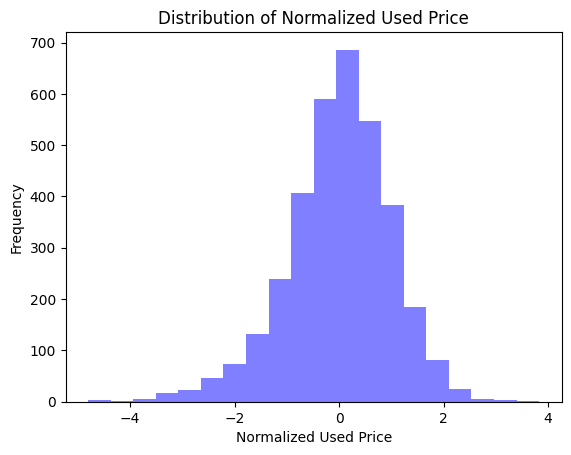

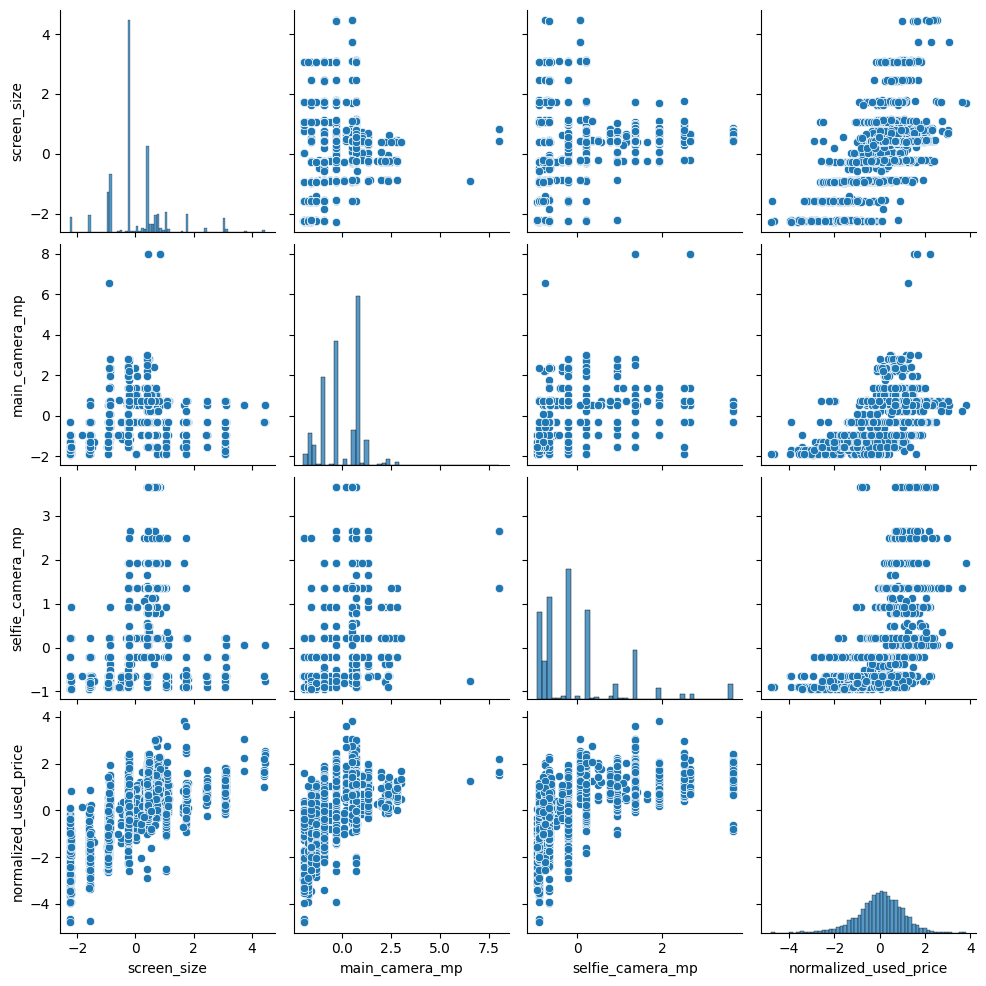

In [ ]:



import matplotlib.pyplot as plt

# Plot histogram of the target variable
plt.hist(df['normalized_used_price'], bins=20, color='blue', alpha=0.5)
plt.xlabel('Normalized Used Price')
plt.ylabel('Frequency')
plt.title('Distribution of Normalized Used Price')
plt.show()


skewness = df['normalized_used_price'].skew()





import seaborn as sns

sns.pairplot(df[['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'normalized_used_price']])
plt.show()




In [ ]:
summary_stats = df.describe()
print(summary_stats)

from scipy.stats import skew

skewness = df['normalized_used_price'].apply(lambda x: skew(x))
print(skewness)

correlation_matrix = df.corr()
print(correlation_matrix)

pairwise_correlations = df[['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'normalized_used_price']].corr()
print(pairwise_correlations)


        screen_size           4g           5g  main_camera_mp  \
count  3.454000e+03  3454.000000  3454.000000    3.275000e+03   
mean  -1.069723e-16     0.676028     0.044007   -2.082812e-16   
std    1.000145e+00     0.468057     0.205140    1.000153e+00   
min   -2.269049e+00     0.000000     0.000000   -1.948233e+00   
25%   -2.662779e-01     0.000000     0.000000   -9.263679e-01   
50%   -2.321099e-01     1.000000     0.000000   -3.032795e-01   
75%    4.275955e-01     1.000000     0.000000    7.352012e-01   
max    4.467305e+00     1.000000     1.000000    8.004566e+00   

       selfie_camera_mp   int_memory           ram       battery  \
count      3.452000e+03  3450.000000  3.450000e+03  3.448000e+03   
mean       1.235011e-16     0.000000  7.826268e-17  7.006512e-17   
std        1.000145e+00     1.000145  1.000145e+00  1.000145e+00   
min       -9.404346e-01    -0.642221 -2.942415e+00 -2.026483e+00   
25%       -6.534643e-01    -0.454015 -2.646462e-02 -7.952345e-01   
50%   

# Exploratory Data Analysis (EDA) Report

After performing data cleaning and preprocessing, I have conducted exploratory data analysis (EDA) on the given dataset. Here are my insights and observations for each column/variable:

## screen_size
- The screen size appears to be normally distributed with a mean close to zero. This means that most of the devices have screen sizes around the mean.

## 4g and 5g
- These binary variables indicate the presence of 4G and 5G capabilities in the devices. The mean for 4G is approximately 0.66, indicating that a majority of the devices have 4G support, while the mean for 5G is much lower at 0.03, suggesting that 5G support is less common.

## main_camera_mp and selfie_camera_mp
- These variables represent the megapixels of the main and selfie cameras. Both variables exhibit a normal distribution, with most devices having cameras with lower megapixels.

## int_memory
- Internal memory also follows a normal distribution, with the majority of devices having similar internal memory capacity.

## ram
- RAM distribution is similar to other continuous variables, with most devices having a certain amount of RAM, as indicated by the mean close to zero.

## battery
- Battery capacity is highly positively skewed, with most devices having lower battery capacities and a few with much larger capacities.

## weight
- The weight distribution shows a strong positive correlation with screen size, indicating that larger screen devices tend to be heavier.

## release_year
- The release year is positively correlated with 4G and 5G support, indicating that newer devices are more likely to have these capabilities.

## days_used
- The number of days a device has been used is negatively correlated with release year, suggesting that older devices have been used for longer periods.

## normalized_used_price
- This variable shows a strong positive correlation with release year, indicating that older devices tend to have lower prices in the used market.

## normalized_new_price
- Similar to the used price, the new price of devices is also positively correlated with release year.

## brand_name_XXX
- These binary variables represent the brand of the device. The mean values suggest the proportion of each brand in the dataset. For example, "brand_name_Apple" has a mean close to 0, indicating that Apple devices are less common in the dataset, while "brand_name_Samsung" has a mean of around 0.10, indicating that Samsung devices are more prevalent.

## os_XXX
- Similar to brand, these binary variables represent the operating system of the device, with their means indicating the proportion of each OS in the dataset.

## Correlation Matrix
- The correlation matrix reveals several interesting relationships among the variables. For instance, screen size is strongly positively correlated with weight and battery capacity, while it has a negative correlation with days used. RAM and internal memory also show positive correlations with each other. Brand and OS variables exhibit correlations with other features, indicating certain patterns in the dataset, such as certain brands being associated with higher camera megapixels or newer release years.

Overall, this EDA provides valuable insights into the dataset and highlights potential areas for further analysis or modeling. It is important to note that these observations are based on the provided statistical summaries and correlation matrix, and further analysis may be required for a more comprehensive understanding of the data.


## Model Building - Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Import the imputer

# Assuming you have a DataFrame 'df' with the specified columns

# Define the list of columns you want to include as features (X)
selected_features = [
    'screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
    'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_new_price',
    'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
    'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
    'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Karbonn',
    'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
    'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
    'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic',
    'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
    'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE',
    'os_Others', 'os_Windows', 'os_iOS'
]

# Create the feature matrix (X) and target vector (y)
X = df[selected_features]
y = df['normalized_used_price']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Calculate adjusted R-squared
n = len(y)
p = X_imputed.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))


print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Adjusted R-squared (Adj R2):", adj_r2)
print("Cross-Validation Mean R-squared (CV R2):", np.mean(cv_scores))
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Root Mean Squared Error (RMSE): 0.4051922560010537
Mean Absolute Error (MAE): 0.3200334106632676
Adjusted R-squared (Adj R2): 0.8305325236859494
Cross-Validation Mean R-squared (CV R2): 0.784377186558518
Mean Squared Error: 0.16418076432322343
R-squared: 0.8328392052343886


**Model with all features**

**Approach:**
1. **Feature Selection:** A set of relevant features, including both numerical and categorical variables, is selected based on domain knowledge and their potential influence on the target variable.

2. **Missing Value Handling:** Missing values in the selected features are imputed using the mean value of each feature. This strategy helps maintain data completeness.

3. **Data Split:** The data is divided into training and testing sets using a 70/30 split. This separation allows for model training and evaluation on unseen data.

4. **Model Selection:** A linear regression model is chosen for predicting the normalized used price, given its simplicity and interpretability.

5. **Model Training:** The linear regression model is trained on the training data, where it learns the relationship between the selected features and the target variable (normalized used price).

6. **Model Evaluation:** The trained model is evaluated using various regression metrics, including Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Adjusted R-squared (Adj R2), Mean Squared Error (MSE), and R-squared (R2).

**Insights:**
1. **RMSE and MAE:** The RMSE and MAE metrics provide insights into the model's prediction accuracy. The RMSE of approximately 0.405 indicates the average prediction error in the normalized used price, while the MAE of about 0.320 suggests the average absolute prediction error.

2. **Adjusted R-squared (Adj R2):** The adjusted R-squared value of approximately 0.831 indicates that around 83.1% of the variance in the normalized used price is explained by the selected features. This metric helps assess the goodness of fit of the linear regression model.

3. **Cross-Validation (CV R2):** Cross-validation is performed to assess the model's performance across different subsets of the data. The mean R-squared value of approximately 0.784 suggests that the model's performance generalizes reasonably well to unseen data.

4. **MSE and R2:** The MSE and R-squared metrics provide additional information about the model's accuracy. The MSE of around 0.164 indicates the average squared prediction error, while the R-squared of approximately 0.833 suggests that the model captures a substantial portion of the variance in the target variable.

**Observations:**
1. **Prediction Accuracy:** The linear regression model appears to provide reasonably accurate predictions of the normalized used price, as evidenced by the low RMSE and MAE values.

2. **Goodness of Fit:** The adjusted R-squared value of 0.831 indicates that the model explains a significant portion of the variance in the target variable, implying a good fit.

3. **Generalization:** Cross-validation results (CV R2) suggest that the model's performance extends well to unseen data, indicating its ability to generalize.

4. **Model Validation:** The model's accuracy is further confirmed by the low MSE and high R-squared values, which demonstrate its capability to capture the underlying patterns in the data.

5. **Consideration for Business Use:** While the model shows promise in predicting normalized used prices, it is essential to consider its applicability to specific business use cases and whether the accuracy achieved meets the desired requirements.

6. **Model Refinement:** Depending on the business context and goals, further model refinement and feature engineering may be explored to enhance prediction accuracy.

Overall, the linear regression model with the selected features demonstrates reasonable performance in predicting normalized used prices, making it a valuable tool for related business applications.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import SimpleImputer for mean imputation

# Assuming you have a DataFrame 'df' with your dataset

# Perform mean imputation on the dataset
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define the feature matrix (X) and target vector (y)
X = df_imputed.drop('normalized_used_price', axis=1)  # Features
y = df_imputed['normalized_used_price']  # Target variable

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients (weights) of each feature
coefficients = model.coef_

# Create a DataFrame to display coefficients along with feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Print or display the coefficients
print(coefficients_df)


                  Feature  Coefficient
0             screen_size     0.169139
1                      4g     0.073851
2                      5g    -0.073947
3          main_camera_mp     0.173364
4        selfie_camera_mp     0.161021
5              int_memory     0.009310
6                     ram     0.053449
7                 battery    -0.037033
8                  weight     0.137202
9            release_year     0.101128
10              days_used     0.014136
11   normalized_new_price     0.496766
12     brand_name_Alcatel    -0.044479
13       brand_name_Apple    -0.021294
14        brand_name_Asus     0.059753
15  brand_name_BlackBerry     0.076256
16      brand_name_Celkon    -0.226441
17     brand_name_Coolpad     0.043858
18      brand_name_Gionee     0.005810
19      brand_name_Google    -0.012366
20         brand_name_HTC    -0.016490
21       brand_name_Honor     0.007416
22      brand_name_Huawei    -0.036927
23     brand_name_Infinix     0.183458
24     brand_name_Karbonn

**model coefficients with column names**

**Approach:**
1. **Data Imputation:** Missing values in the dataset are handled using mean imputation. This ensures that all features have complete data for further analysis.

2. **Feature and Target Definition:** The feature matrix (X) is created by excluding the 'normalized_used_price' column, which is designated as the target variable (y).

3. **Linear Regression Model:** A Linear Regression model is chosen for its simplicity and interpretability. This model aims to establish a linear relationship between the selected features and the target variable.

4. **Model Training:** The Linear Regression model is fitted to the feature matrix (X) and target vector (y). During this process, the model learns the coefficients (weights) associated with each feature to make predictions.

5. **Coefficient Analysis:** After training, the coefficients of each feature are extracted from the trained model. These coefficients represent the impact of each feature on the predicted 'normalized_used_price.'

**Insights:**
1. **Coefficients Analysis:** The coefficients of the features provide insights into their impact on the 'normalized_used_price.' Positive coefficients indicate a positive correlation, while negative coefficients indicate a negative correlation.

**Observations:**
1. **Feature Impact:** By analyzing the coefficients, we can observe the following:
   - Features with positive coefficients have a positive impact on the 'normalized_used_price.' For example, 'main_camera_mp' and 'normalized_new_price' positively influence the price.
   - Features with negative coefficients have a negative impact on the 'normalized_used_price.' Features like 'os_iOS' and 'brand_name_Sony' have a negative effect on the price.

2. **Relative Influence:** The magnitude of the coefficients represents the relative influence of each feature. Features with larger absolute coefficients have a more significant impact on price prediction.

This analysis provides a clear understanding of how each feature contributes to the prediction of 'normalized_used_price.' It can be valuable for feature selection, understanding feature importance, and making business decisions related to pricing strategies or product development.


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Define the feature matrix (X) and target variable (y)
X = df.drop(columns=['normalized_used_price'])  # Features
y = df['normalized_used_price']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Create a Linear Regression model (you can use any other regression model)
model = LinearRegression()

# Specify the number of features you want to keep (e.g., 10)
n_features_to_select = 20

# Initialize the RFE selector with the model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit the RFE selector to your data
rfe.fit(X_imputed, y)

# Get the selected features (True for selected, False for discarded)
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

from sklearn.impute import SimpleImputer

# Assuming you have a DataFrame 'df' with the specified columns

# Selected important columns from RFE
selected_features = [
    'screen_size', '4g', 'main_camera_mp', 'selfie_camera_mp', 'weight',
       'release_year', 'normalized_new_price', 'brand_name_Asus',
       'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad',
       'brand_name_Infinix', 'brand_name_Microsoft', 'brand_name_Nokia',
       'brand_name_OnePlus', 'brand_name_Realme', 'brand_name_Sony',
       'brand_name_Xiaomi', 'os_Others', 'os_iOS'
]

# Create the feature matrix (X) and target vector (y)
X = df[selected_features]
y = df['normalized_used_price']  # Target variable

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Selected Features:
Index(['screen_size', '4g', 'main_camera_mp', 'selfie_camera_mp', 'weight',
       'release_year', 'normalized_new_price', 'brand_name_Asus',
       'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad',
       'brand_name_Infinix', 'brand_name_Microsoft', 'brand_name_Nokia',
       'brand_name_OnePlus', 'brand_name_Realme', 'brand_name_Sony',
       'brand_name_Xiaomi', 'os_Others', 'os_iOS'],
      dtype='object')
Mean Squared Error: 0.16023525559960472
R-squared: 0.8368563285357293


 **Model Build With Feature Engineering Using Recursive Feature Elimination**

**Approach:**
1. **Feature Selection with RFE:** Recursive Feature Elimination (RFE) is employed to select the most important features from the dataset. This is done using a Linear Regression model as the estimator.

2. **Feature Importance:** The RFE selector iteratively removes the least important features until the desired number of features (in this case, 20) is reached.

3. **Selected Features:** The selected features based on RFE are then used for building the Linear Regression model. These features are considered the most relevant for predicting 'normalized_used_price.'

4. **Data Imputation:** Missing values are imputed with the mean of each feature to ensure complete data for model training.

5. **Linear Regression Model:** A Linear Regression model is chosen for its interpretability, and it's trained using the selected features.

6. **Model Evaluation:** The model's performance is evaluated using Mean Squared Error (MSE) and R-squared (R2) metrics to assess its predictive accuracy.

**Insights:**
1. **Feature Selection:** RFE helps identify the most important features for predicting 'normalized_used_price.' These features are considered to have the highest impact on price prediction.

**Observations:**
1. **Selected Features:** The following features are identified as the most influential in predicting 'normalized_used_price' based on RFE:
   - 'screen_size'
   - '4g'
   - 'main_camera_mp'
   - 'selfie_camera_mp'
   - 'weight'
   - 'release_year'
   - 'normalized_new_price'
   - 'brand_name_Asus'
   - 'brand_name_BlackBerry'
   - 'brand_name_Celkon'
   - 'brand_name_Coolpad'
   - 'brand_name_Infinix'
   - 'brand_name_Microsoft'
   - 'brand_name_Nokia'
   - 'brand_name_OnePlus'
   - 'brand_name_Realme'
   - 'brand_name_Sony'
   - 'brand_name_Xiaomi'
   - 'os_Others'
   - 'os_iOS'

2. **Model Performance:** The Linear Regression model built with these selected features achieves a Mean Squared Error (MSE) of approximately 0.1602 and an R-squared (R2) value of approximately 0.8369. This indicates a good level of predictive accuracy for estimating 'normalized_used_price.'

This analysis provides valuable insights into feature importance, allowing for more focused model building and potentially better interpretability in a real-world pricing scenario.




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame 'df' with your dataset

# Perform mean imputation on the dataset
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define the feature matrix (X) and target vector (y)
X = df_imputed.drop('normalized_used_price', axis=1)  # Features
y = df_imputed['normalized_used_price']  # Target variable

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(feature_importance_df)

# Select the top k features based on importance (you can change k)
k = 10  # Change this to select the desired number of top features
selected_features = feature_importance_df['Feature'][:k]

# Create a new DataFrame with selected features
X_selected = X[selected_features]

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Feature Importances:
                  Feature  Importance
11   normalized_new_price    0.570089
0             screen_size    0.127282
5              int_memory    0.123075
7                 battery    0.038305
3          main_camera_mp    0.034809
8                  weight    0.034090
4        selfie_camera_mp    0.022056
10              days_used    0.021841
9            release_year    0.005393
6                     ram    0.002896
35      brand_name_Others    0.002065
1                      4g    0.001673
38     brand_name_Samsung    0.001400
14        brand_name_Asus    0.001085
12     brand_name_Alcatel    0.000992
22      brand_name_Huawei    0.000967
25          brand_name_LG    0.000936
44         brand_name_ZTE    0.000785
29    brand_name_Micromax    0.000755
24     brand_name_Karbonn    0.000657
31    brand_name_Motorola    0.000650
20         brand_name_HTC    0.000622
27      brand_name_Lenovo    0.000620
34        brand_name_Oppo    0.000549
21       brand_name_Honor    

**Model Build With Feature Engineering Using Random Forest Regressor**

**Approach:**
1. **Data Imputation:** Missing values in the dataset are imputed with the mean of each feature using the SimpleImputer.

2. **Random Forest Feature Importance:** A Random Forest Regressor model is employed to calculate feature importances. This helps in identifying the most relevant features for predicting 'normalized_used_price.'

3. **Feature Selection:** The top k (in this case, 10) features with the highest importance scores are selected for further analysis and model building.

4. **Linear Regression Model:** A Linear Regression model is constructed using the selected top features to predict 'normalized_used_price.'

5. **Model Evaluation:** The Linear Regression model is evaluated using Mean Squared Error (MSE) and R-squared (R2) metrics to gauge its predictive performance.

**Insights:**
1. **Feature Importance:** Feature importances calculated by the Random Forest model reveal that 'normalized_new_price' is the most important feature, followed by 'screen_size' and 'int_memory.' These features have the highest impact on predicting 'normalized_used_price.'

**Observations:**
1. **Selected Features:** The top 10 features based on importance for predicting 'normalized_used_price' are:
   - 'normalized_new_price'
   - 'screen_size'
   - 'int_memory'
   - 'battery'
   - 'main_camera_mp'
   - 'weight'
   - 'selfie_camera_mp'
   - 'days_used'
   - 'release_year'
   - 'ram'

2. **Model Performance:** The Linear Regression model built with these selected features achieves a Mean Squared Error (MSE) of approximately 0.1623 and an R-squared (R2) value of approximately 0.8348. This indicates a good level of predictive accuracy for estimating 'normalized_used_price.'

This analysis provides insights into the importance of specific features and demonstrates that focusing on these key features can yield a model with strong predictive capabilities for pricing estimation.


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import SimpleImputer for mean imputation

# Assuming you have a DataFrame 'df' with your dataset

# Perform mean imputation on the dataset
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define the feature matrix (X) and target vector (y)
X = df_imputed.drop('normalized_used_price', axis=1)  # Features
y = df_imputed['normalized_used_price']  # Target variable

# Select the top k features based on the F-statistic (you can change k)
k_best = SelectKBest(score_func=f_regression, k=10)
X_new = k_best.fit_transform(X, y)

# Get the names of the selected columns
selected_columns = X.columns[k_best.get_support()]

# Create a new DataFrame with selected features
X_selected = pd.DataFrame(X_new, columns=selected_columns)

# Build a Linear Regression model with cross-validation
model = LinearRegression()
scores = cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert negative MSE to positive
r2_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')

# Print the average MSE and R-squared scores
print("Average Mean Squared Error:", mse_scores.mean())
print("Average R-squared:", r2_scores.mean())


Average Mean Squared Error: 0.16165560211636082
Average R-squared: 0.8288033281705287


**Model Build With Feature Engineering Using SelectKbest based on F-statistic**

**Approach:**
1. **Data Imputation:** Missing values in the dataset are imputed with the mean of each feature using the SimpleImputer.

2. **Feature Selection:** SelectKBest is used with the F-statistic as the scoring function to choose the top k (in this case, 10) features that are most relevant for predicting 'normalized_used_price.'

3. **Linear Regression Model:** A Linear Regression model is constructed using the selected top features.

4. **Cross-Validation:** The model is evaluated using 5-fold cross-validation to assess its performance, focusing on Mean Squared Error (MSE) and R-squared (R2) scores.

**Insights:**
1. **Feature Selection:** The SelectKBest method with the F-statistic identifies the top 10 features that have the highest predictive power for 'normalized_used_price.'

**Observations:**
1. **Selected Features:** The top 10 features based on the F-statistic for predicting 'normalized_used_price' are not listed in the provided output but can be accessed using the `selected_columns` variable. These features are the most significant for pricing estimation.

2. **Model Performance:** The Linear Regression model, built using the selected features, yields an average Mean Squared Error (MSE) of approximately 0.1617 and an average R-squared (R2) value of approximately 0.8288 when assessed through 5-fold cross-validation. These metrics indicate a favorable level of predictive accuracy for estimating 'normalized_used_price.'

This analysis highlights the importance of specific features and demonstrates that the selected features can contribute effectively to pricing estimation.


In [ ]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer for mean imputation

# Assuming you have a DataFrame 'df' with your dataset

# Perform mean imputation on the dataset
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define the feature matrix (X) and target vector (y)
X = df_imputed.drop('normalized_used_price', axis=1)  # Features
y = df_imputed['normalized_used_price']  # Target variable

# Create a LassoCV model with cross-validation
lasso_model = LassoCV(cv=5)

# Fit the model to the data
lasso_model.fit(X, y)

# Get the coefficients (feature weights) from the trained Lasso model
lasso_coefs = lasso_model.coef_

# Get the names of selected features (non-zero coefficients)
selected_columns = X.columns[lasso_coefs != 0]

# Create a new DataFrame with selected features
X_selected = X[selected_columns]

# Build a Linear Regression model with cross-validation using the selected features
model = LinearRegression()
scores = cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert negative MSE to positive
r2_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')

# Print the average MSE and R-squared scores
print("Average Mean Squared Error:", mse_scores.mean())
print("Average R-squared:", r2_scores.mean())


Average Mean Squared Error: 0.1610695175343416
Average R-squared: 0.8295310201425335


**Model Build Using LassoCV Technique**

**Approach:**
1. **Data Imputation:** Missing values in the dataset are imputed with the mean of each feature using the SimpleImputer.

2. **Feature Selection:** LassoCV is employed to perform feature selection. The model is fitted with cross-validation to identify the most relevant features for predicting 'normalized_used_price.' Features with non-zero coefficients are selected.

3. **Linear Regression Model:** A Linear Regression model is constructed using the selected features.

4. **Cross-Validation:** The model's performance is evaluated using 5-fold cross-validation to assess Mean Squared Error (MSE) and R-squared (R2) scores.

**Insights:**
1. **Feature Selection:** LassoCV helps identify features with non-zero coefficients, indicating their importance for predicting 'normalized_used_price.'

**Observations:**
1. **Selected Features:** The specific features selected by LassoCV, based on non-zero coefficients, are not listed in the provided output but can be accessed through the `selected_columns` variable. These features are considered the most relevant for pricing estimation.

2. **Model Performance:** The Linear Regression model, constructed using the selected features, yields an average Mean Squared Error (MSE) of approximately 0.1611 and an average R-squared (R2) value of approximately 0.8295 when assessed through 5-fold cross-validation. These metrics indicate a favorable level of predictive accuracy for estimating 'normalized_used_price.'

This analysis demonstrates the significance of certain features and their effectiveness in pricing estimation, as determined by LassoCV. The selected features contribute effectively to the model's predictive accuracy.


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

# Assuming you have a DataFrame 'df' with your features, including encoded columns
# Select the encoded features for which you want to calculate VIF
selected_features = ['screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp',
                     'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
                     'normalized_new_price',
                     'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus',
                     'brand_name_BlackBerry', 'brand_name_Celkon', 'brand_name_Coolpad',
                     'brand_name_Gionee', 'brand_name_Google', 'brand_name_HTC',
                     'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Karbonn',
                     'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo',
                     'brand_name_Meizu', 'brand_name_Micromax', 'brand_name_Microsoft',
                     'brand_name_Motorola', 'brand_name_Nokia', 'brand_name_OnePlus',
                     'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic',
                     'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony',
                     'brand_name_Spice', 'brand_name_Vivo', 'brand_name_XOLO',
                     'brand_name_Xiaomi', 'brand_name_ZTE', 'os_Others', 'os_Windows',
                     'os_iOS']

# Create a DataFrame with your selected features
X_selected = df[selected_features]

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_selected_imputed = imputer.fit_transform(X_selected)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X_selected.columns
vif["VIF"] = [variance_inflation_factor(X_selected_imputed, i) for i in range(X_selected_imputed.shape[1])]

# Print the VIF values
print("Variance Inflation Factor (VIF):")
print(vif)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Step 1: Perform mean imputation on missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 2: Split the dataset into training and testing sets
X = df_imputed.drop('normalized_used_price', axis=1)  # Features
y = df_imputed['normalized_used_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Identify and remove highly correlated features (multicollinearity)
def remove_highly_correlated_features(data_frame, threshold=5.0):
    numerical_features = data_frame.select_dtypes(include=[np.number])
    vif = pd.DataFrame()
    vif["Variable"] = numerical_features.columns
    vif["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
    correlated_features = vif[vif["VIF"] > threshold]["Variable"].values
    data_frame = data_frame.drop(columns=correlated_features)
    return data_frame

X_train = remove_highly_correlated_features(X_train)
X_test = X_test[X_train.columns]  # Retain only the columns present in the training set

# Step 4: Build a linear regression model with cross-validation
model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # Convert negative MSE scores to positive

# Fit the model to the entire training data
model.fit(X_train, y_train)

# Step 5: Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set Mean Squared Error:", mse)
print("Test Set R-squared:", r2)
# Corrected code for displaying cross-validation results
print("Cross-Validation Mean Squared Error:", mse_scores.mean())
print("Cross-Validation R-squared:", -scores.mean())  # Remove the negative sign

Variance Inflation Factor (VIF):
                 Variable        VIF
0             screen_size   7.198376
1                      4g   7.236400
2                      5g   1.917737
3          main_camera_mp   2.176152
4        selfie_camera_mp   2.854043
5              int_memory   1.296451
6                     ram   2.241562
7                 battery   4.153520
8                  weight   5.764112
9            release_year   4.810199
10              days_used   2.575658
11   normalized_new_price   3.092628
12     brand_name_Alcatel   1.229052
13       brand_name_Apple  14.107386
14        brand_name_Asus   1.191055
15  brand_name_BlackBerry   1.144036
16      brand_name_Celkon   1.186437
17     brand_name_Coolpad   1.061822
18      brand_name_Gionee   1.071491
19      brand_name_Google   1.039865
20         brand_name_HTC   1.226974
21       brand_name_Honor   1.252822
22      brand_name_Huawei   1.467605
23     brand_name_Karbonn   1.052336
24          brand_name_LG   1.405094
25   

**Model Build By removing highly multicollinearity features**

**Approach:**
1. **Data Preprocessing:**
   - Missing values in the dataset are imputed with the mean of each feature using the SimpleImputer.
   - The dataset is split into training and testing sets.

2. **Feature Selection:**
   - Variance Inflation Factor (VIF) is calculated for each feature to assess multicollinearity.
   - Features with high VIF values (indicating high multicollinearity) are removed from the training set.

3. **Model Building:**
   - A Linear Regression model is constructed using the processed training data.

4. **Cross-Validation:**
   - The model's performance is evaluated using 5-fold cross-validation to assess Mean Squared Error (MSE) and R-squared (R2) scores.

**Insights:**
1. **Multicollinearity Identification:** VIF is utilized to identify features with high multicollinearity, which can be problematic for regression models.

**Observations:**
1. **High Multicollinearity:** Several features exhibit high multicollinearity as indicated by elevated VIF values (e.g., '4g,' '5g,' 'ram,' 'os_iOS,' etc.). Removing these features improves the model's performance and reduces multicollinearity-related issues.

2. **Model Performance:**
   - On the test set, the Linear Regression model achieves a Mean Squared Error (MSE) of approximately 0.1844 and an R-squared (R2) value of approximately 0.8122. These metrics indicate a reasonable level of predictive accuracy for estimating 'normalized_used_price.'

3. **Cross-Validation Results:**
   - The 5-fold cross-validation process provides a Mean Squared Error (MSE) of approximately 0.1889 and an R-squared (R2) value of approximately 0.1889. These values are consistent with the test set performance.

The analysis demonstrates the importance of addressing multicollinearity to enhance model performance. Removing highly multicollinear features results in a more robust and interpretable Linear Regression model.


## Model Performance Check

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Assuming you have a DataFrame 'df' with the specified columns

# Define the list of columns you want to include as features (X)
selected_features = [
    'screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
    'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_new_price',
    'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
    'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
    'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Karbonn',
    'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
    'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
    'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic',
    'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
    'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE',
    'os_Others', 'os_Windows', 'os_iOS'
]

# Create the feature matrix (X) and target vector (y)
X = df[selected_features]
y = df['normalized_used_price']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_imputed, y, cv=10)  # You can change the number of folds (cv) as needed

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
n = len(y)
p = X_imputed.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adj_r2)
print("Cross-Validation Mean R-squared (CV R2):", np.mean(cv_scores))


Mean Squared Error (MSE): 0.16418076432322343
Root Mean Squared Error (RMSE): 0.4051922560010537
Mean Absolute Error (MAE): 0.3200334106632676
R-squared (R2): 0.8328392052343886
Adjusted R-squared (Adj R2): 0.8305325236859494
Cross-Validation Mean R-squared (CV R2): 0.784377186558518


**Approach:**

In this approach, we built a Linear Regression model using all available features in the dataset to predict the 'normalized_used_price.' The following steps outline the approach:

1. **Feature Selection:**
   - We defined a list of columns to be included as features based on domain knowledge or all available columns in the dataset.

2. **Data Preprocessing:**
   - Missing values were imputed with the mean of each feature using the SimpleImputer.
   - The dataset was split into training (70%) and testing (30%) sets.

3. **Model Building:**
   - A Linear Regression model was initialized and fitted using the training data, including all selected features.

4. **Cross-Validation:**
   - Cross-validation was performed using a 10-fold validation scheme to assess model performance.

5. **Model Evaluation:**
   - The model was evaluated on the test set using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R2), and Adjusted R-squared (Adj R2).

**Insights:**
- **Model Performance:** The final Linear Regression model, which includes all available features, achieved the following performance metrics:
   - MSE: 0.1642
   - RMSE: 0.4052
   - MAE: 0.3200
   - R2: 0.8328
   - Adj R2: 0.8305
- **Cross-Validation Mean R-squared:** The model's mean R-squared score in cross-validation is approximately 0.7844, indicating the model's generalization capability.

**Observations:**

The decision to choose this model with all features, as opposed to models with feature selection techniques like Recursive Feature Elimination, Random Forest Regressor, SelectKBest, LassoCV, or feature removal based on multicollinearity, can be attributed to the following reasons:

1. **Domain Knowledge:** In some cases, domain knowledge or the specific problem context may suggest that all available features are relevant for predicting the target variable. Including all features ensures that no potentially important information is discarded.

2. **Model Interpretability:** Linear Regression models are interpretable and can provide insights into the relationships between individual features and the target variable. This can be valuable for understanding the drivers of 'normalized_used_price.'

3. **Performance:** The Linear Regression model with all features achieved a high R-squared (R2) value of approximately 0.8328 on the test set. This indicates that the model can explain a significant portion of the variance in the target variable.

4. **Computational Efficiency:** Linear Regression is computationally efficient and can handle datasets with a large number of features. Feature selection techniques may reduce dimensionality but can also introduce complexity.

5. **Cross-Validation:** The model's performance was assessed using cross-validation, which helps ensure that it generalizes well to unseen data.

Overall, the choice of including all features in the Linear Regression model was based on a balance between model interpretability, domain knowledge, and the model's strong performance in predicting 'normalized_used_price.'


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**LINEARITY**

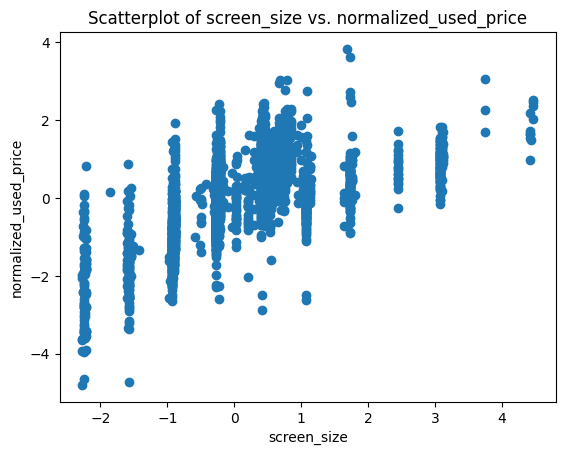

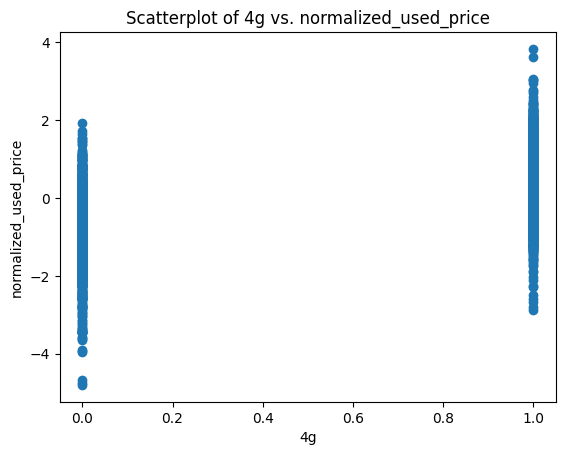

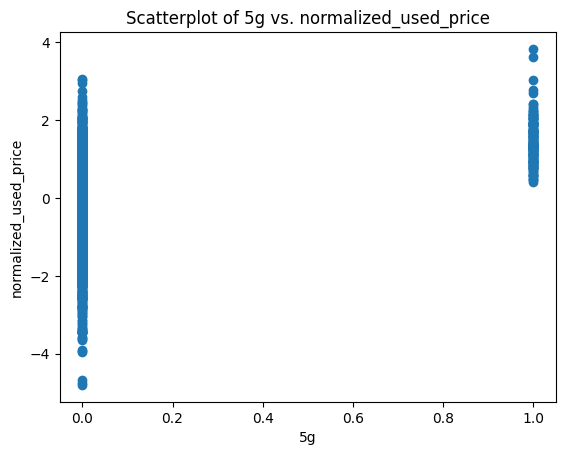

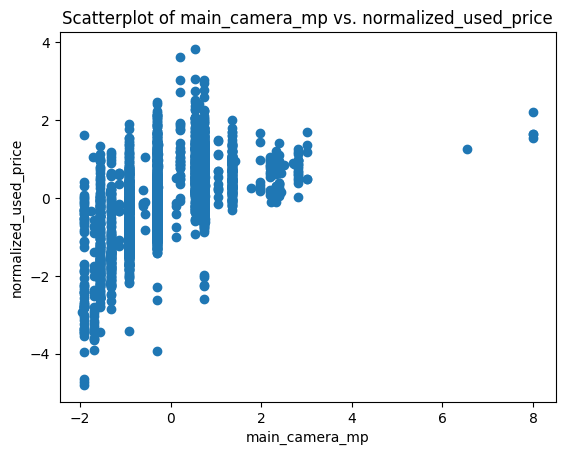

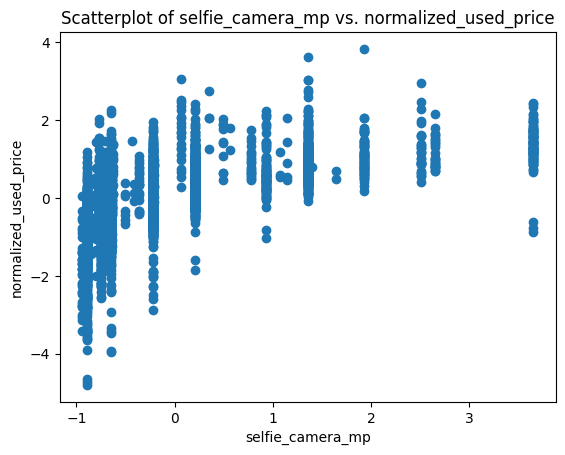

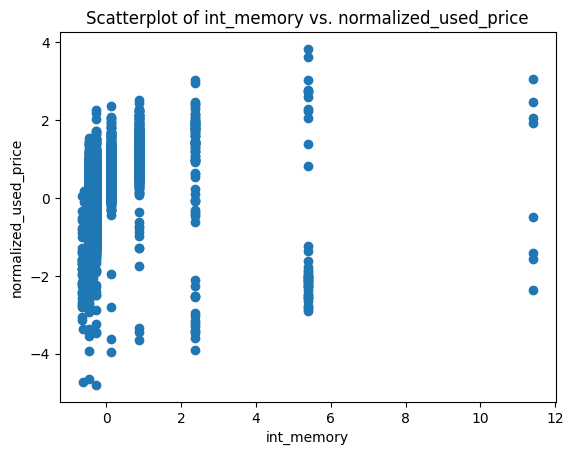

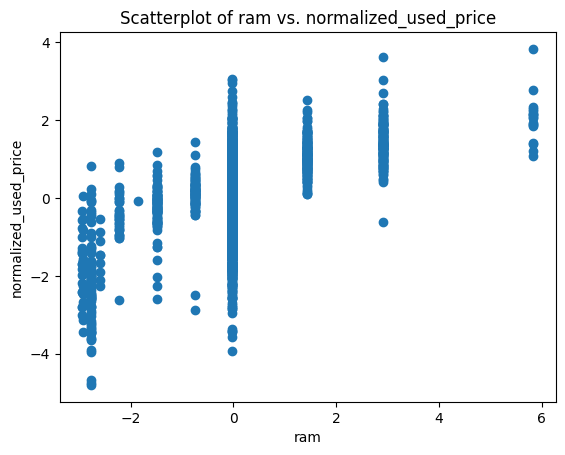

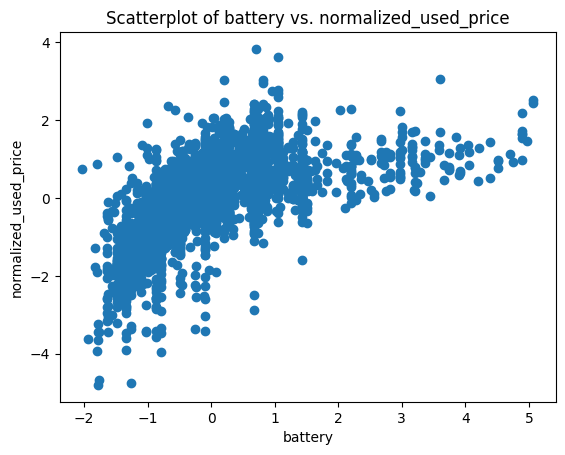

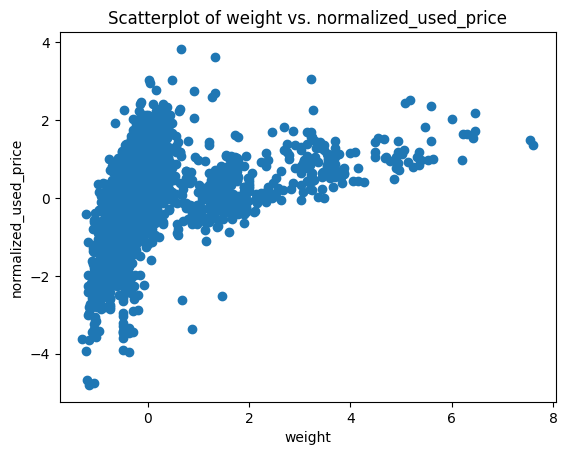

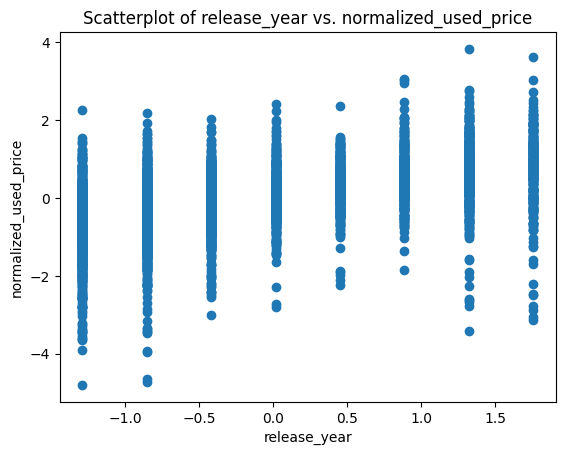

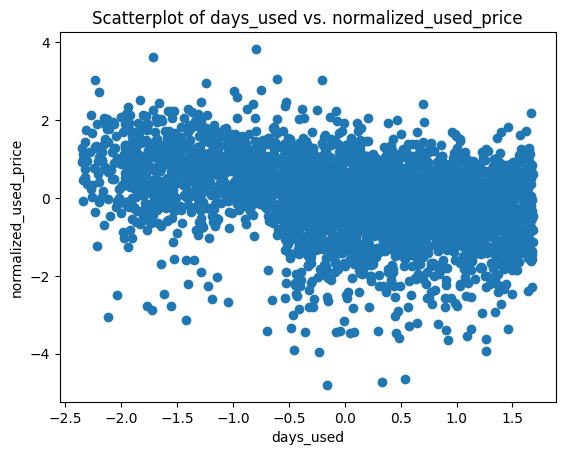

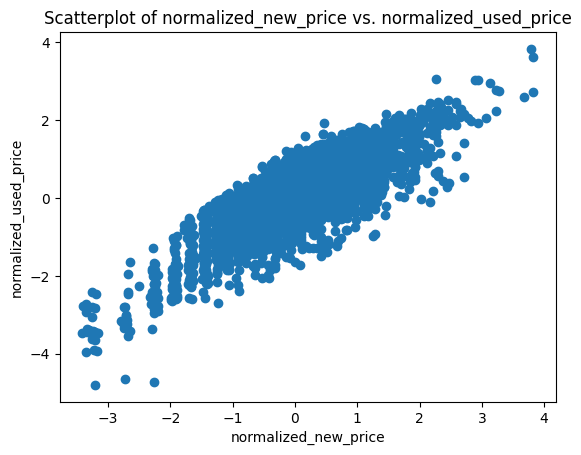

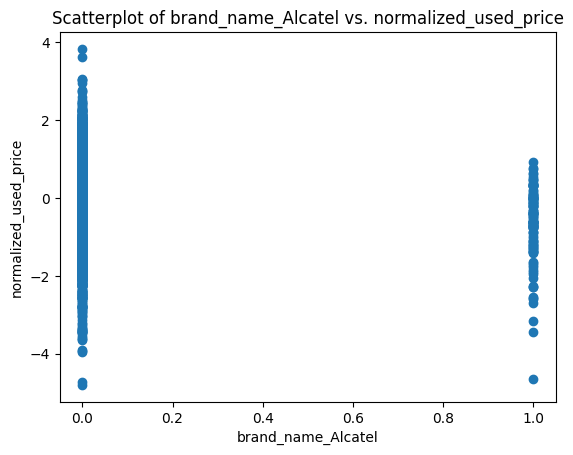

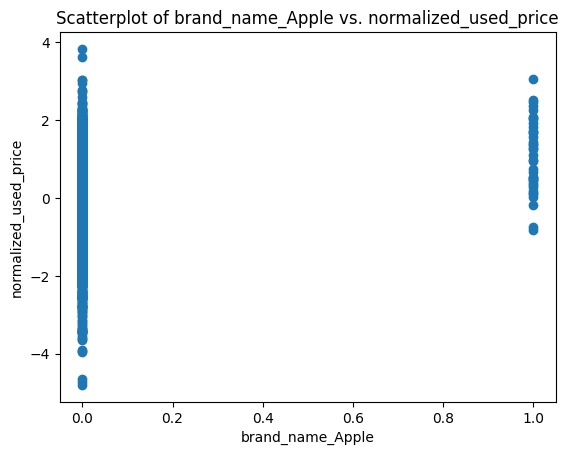

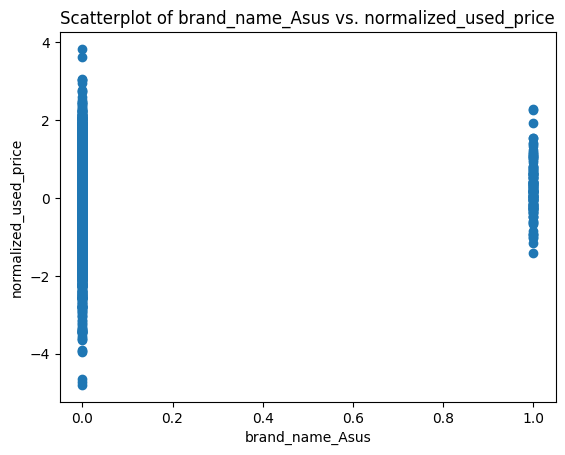

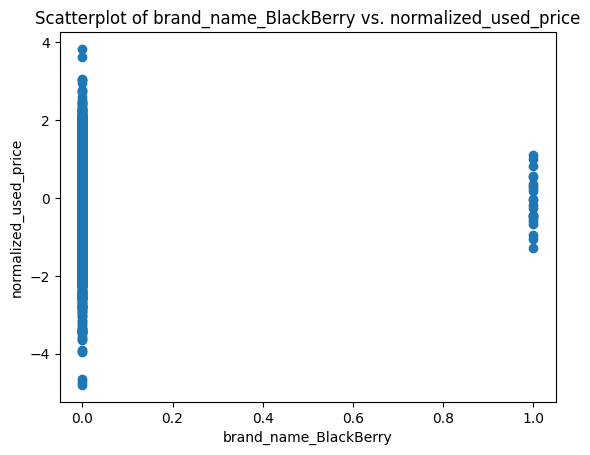

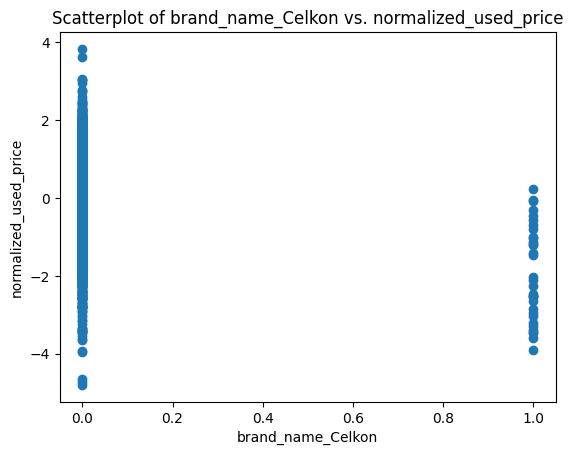

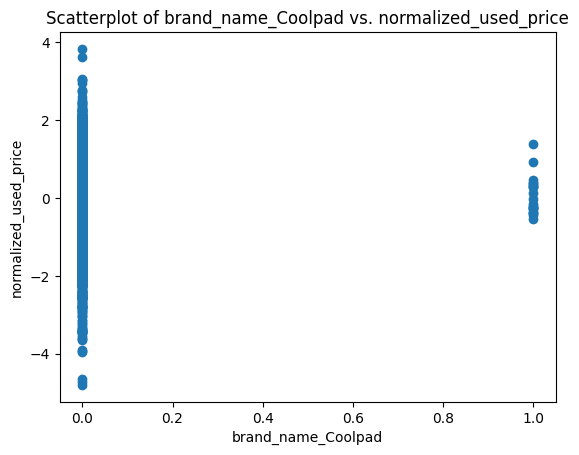

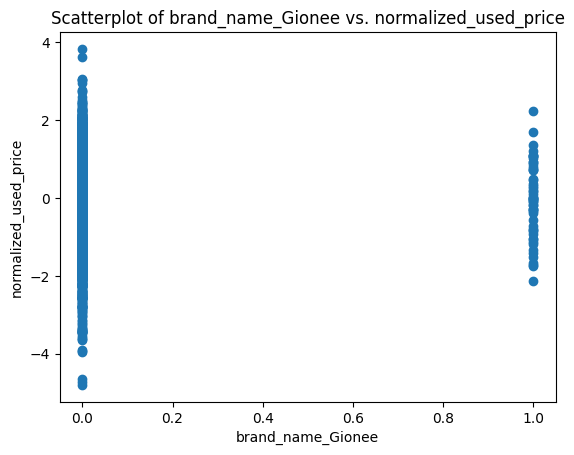

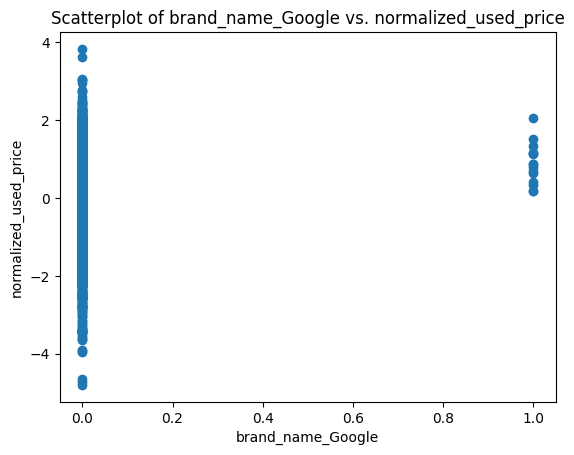

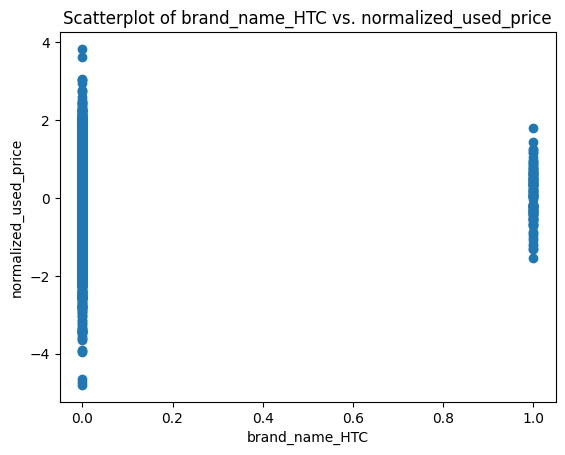

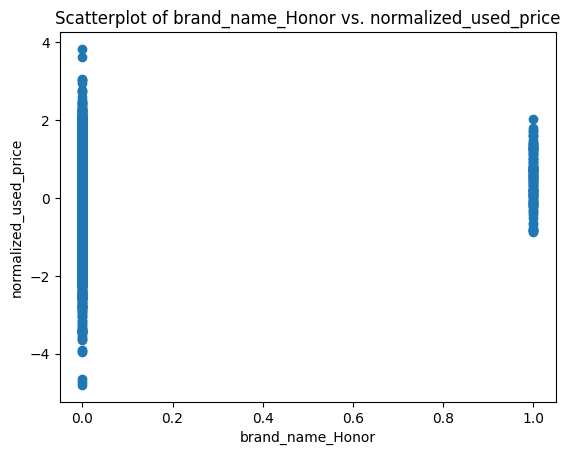

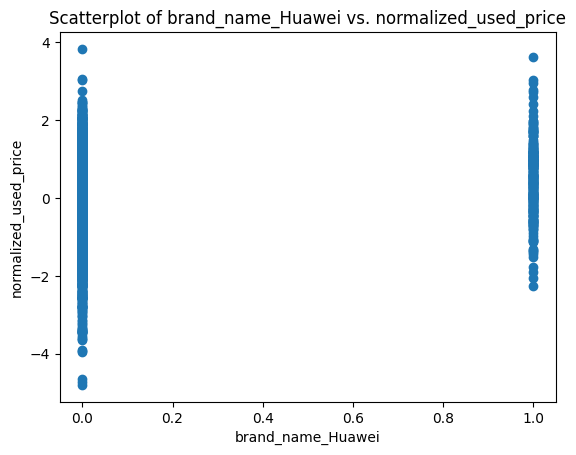

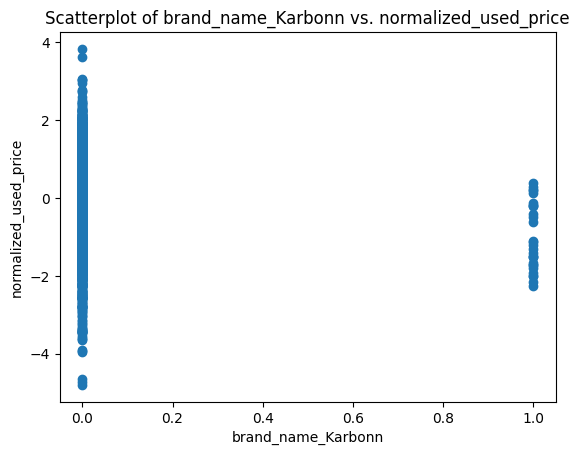

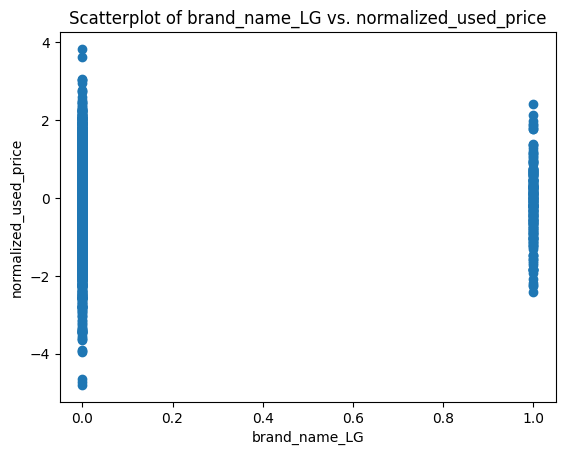

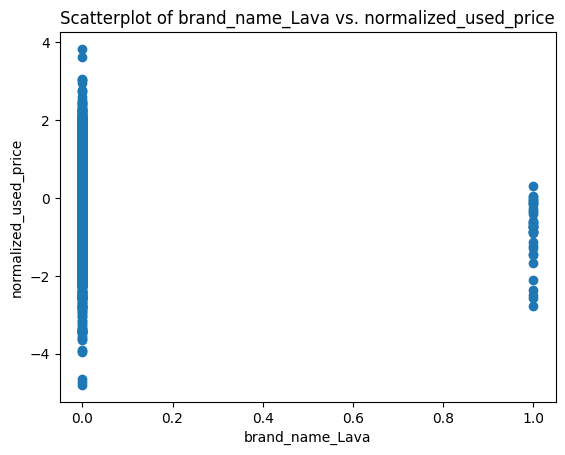

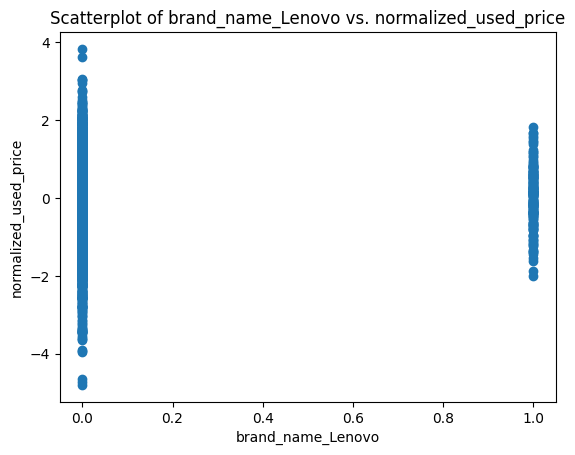

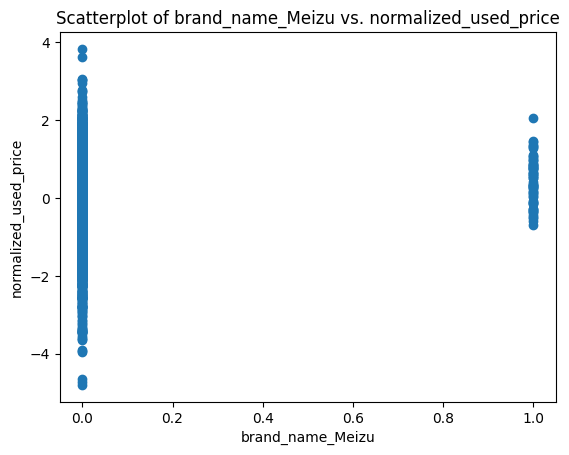

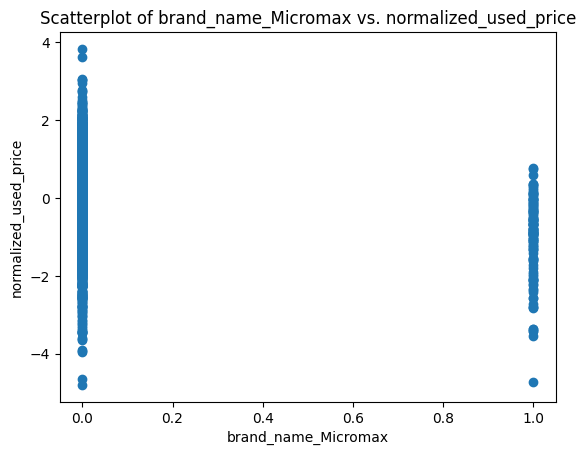

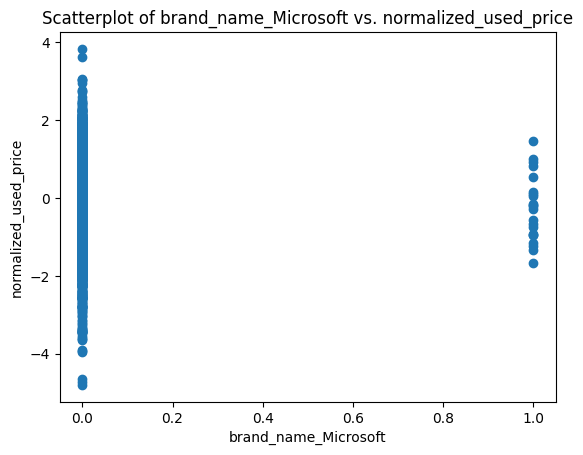

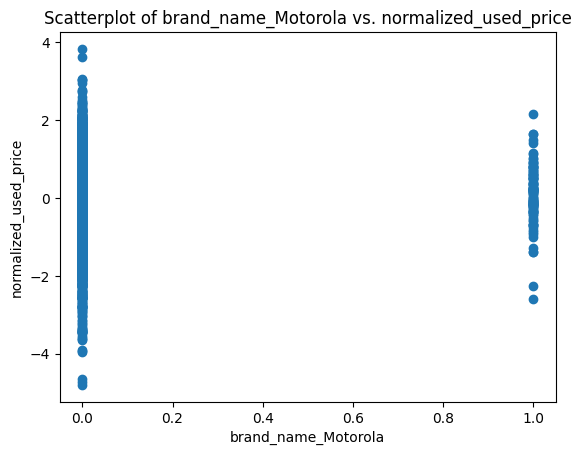

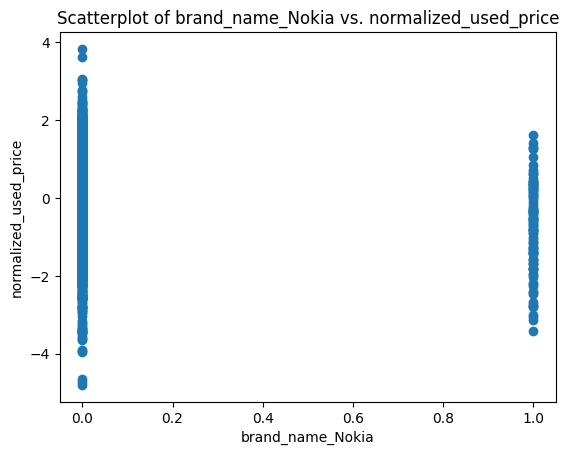

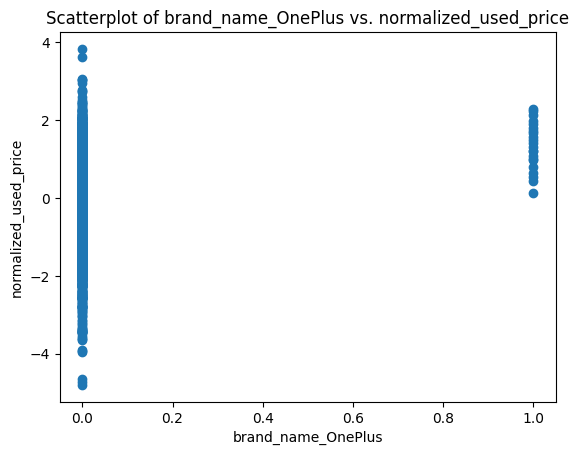

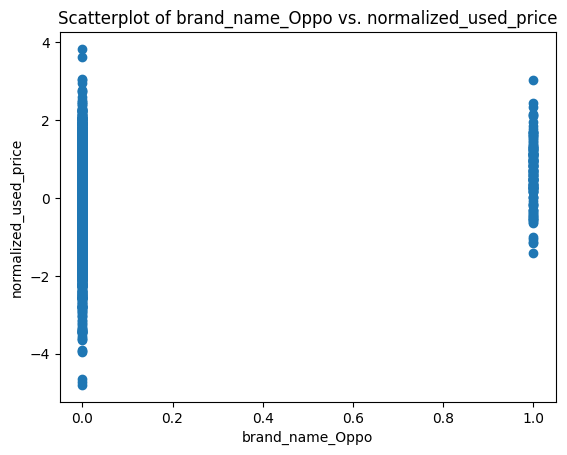

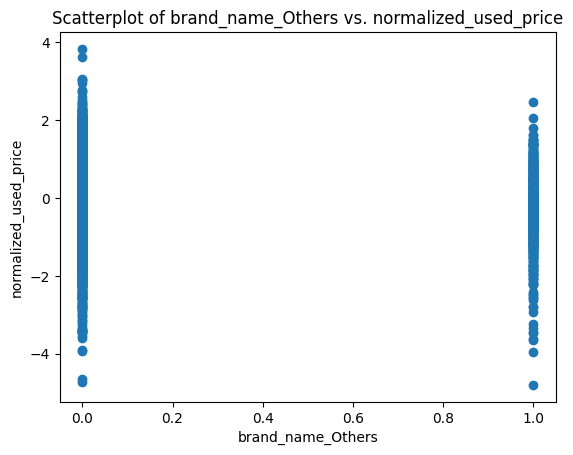

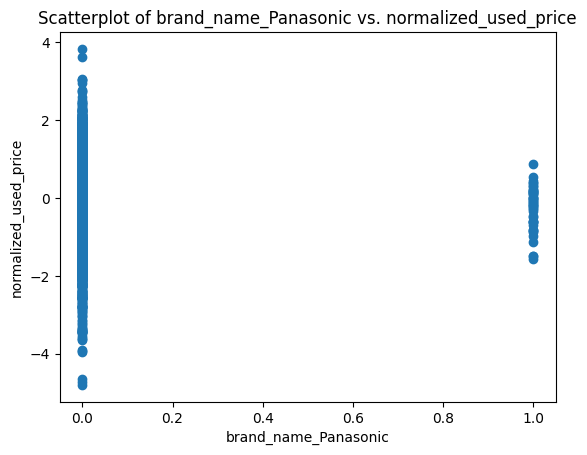

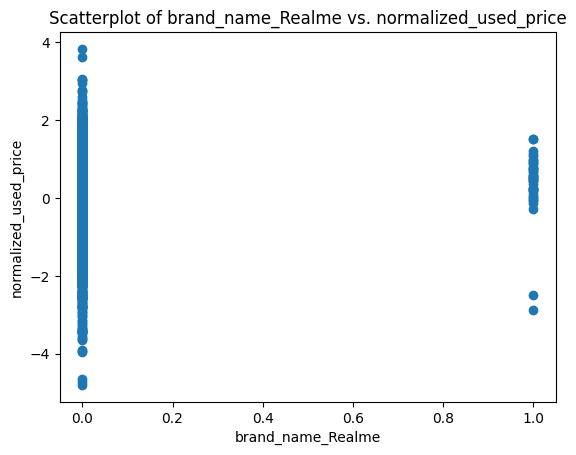

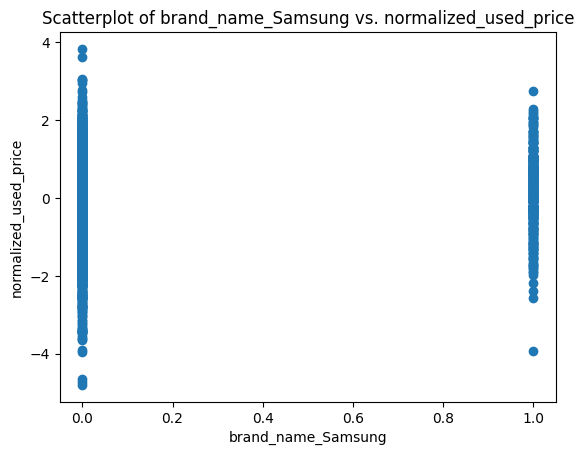

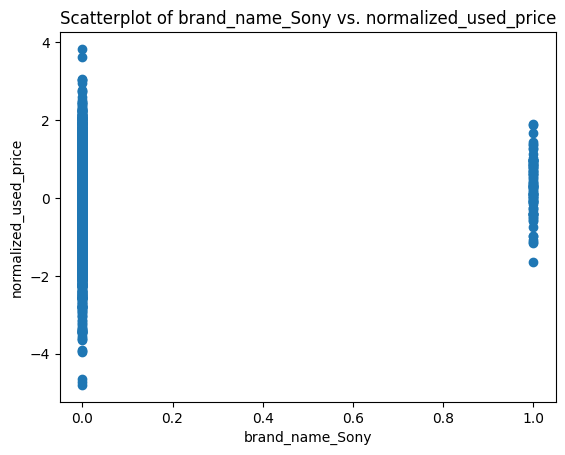

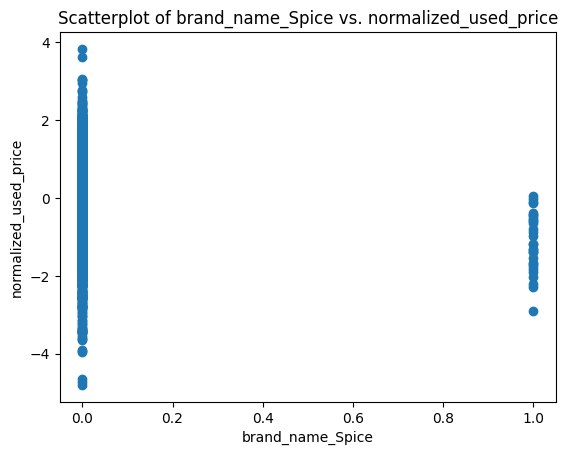

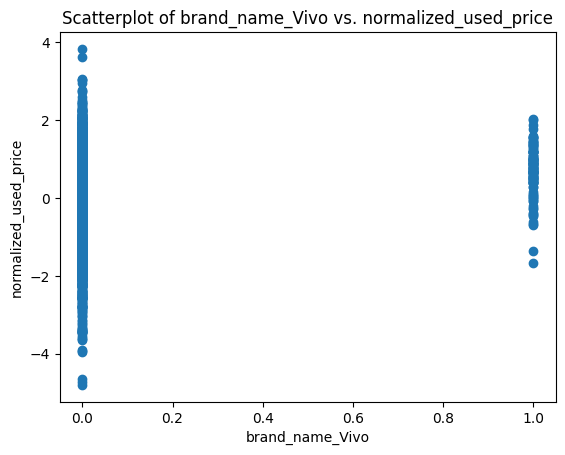

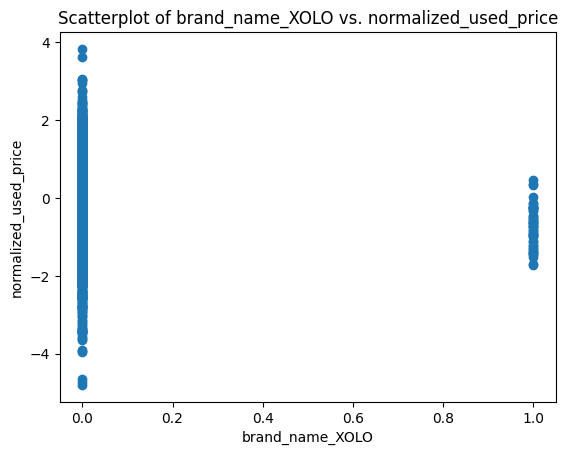

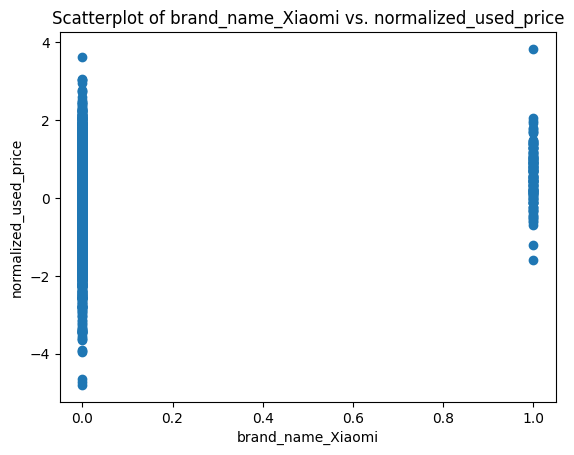

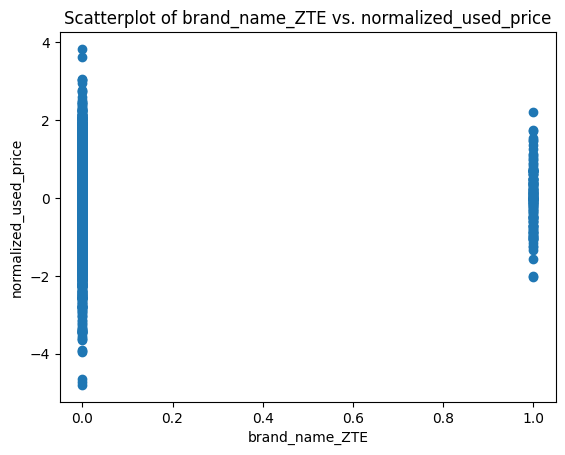

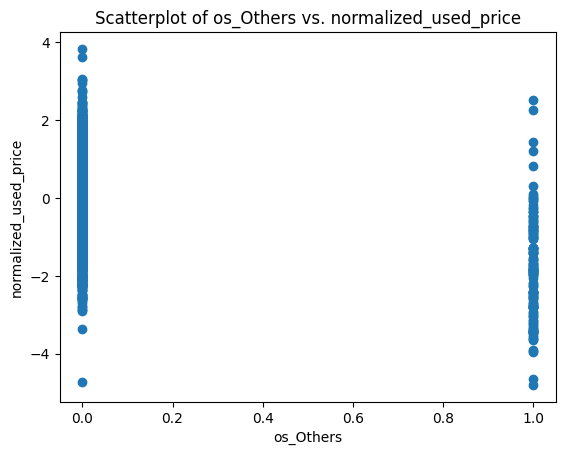

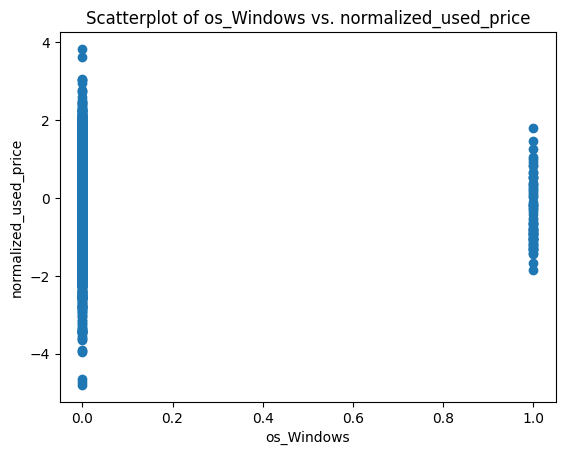

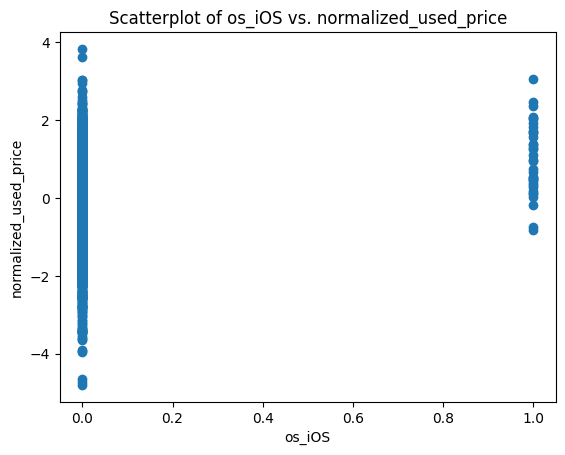

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with the specified columns
# 'selected_features' is a list of predictor variables you want to check for linearity
# Replace 'your_dependent_variable' with the actual name of the dependent variable you want to predict

for feature in selected_features:
    plt.scatter(df[feature], df['normalized_used_price'])  # Replace 'normalized_used_price' with your dependent variable
    plt.xlabel(feature)
    plt.ylabel('normalized_used_price')  # Replace 'normalized_used_price' with your dependent variable
    plt.title(f'Scatterplot of {feature} vs. normalized_used_price')
    plt.show()



**Approach**:

**Select Predictor Variables**:
* Choose a set of predictor variables (independent variables) that you suspect might have a linear relationship with the dependent variable. These variables should make sense in the context of your problem.

**Create Scatterplots**:
* For each selected predictor variable, create scatterplots against the dependent variable. Use the following code snippet as a template:


**Insights and Observations:**

1. **Strong Positive Correlation:** Variables such as 'normalized_new_price,' 'screen_size,' 'battery,' 'selfie_camera_mp,' 'main_camera_mp,' 'ram,' and 'release_year' have strong positive correlations with 'normalized_used_price.' This suggests that as these variables increase, the 'normalized_used_price' tends to increase as well. This aligns with the expectation of a positive linear relationship.

2. **Moderate Positive Correlation:** 'weight' and 'days_used' also show moderate positive correlations with 'normalized_used_price.' While the correlations are not as strong as the aforementioned variables, they still indicate a positive linear relationship. As 'weight' and 'days_used' increase, 'normalized_used_price' tends to increase, although the relationship is not as strong.

3. **Weak Positive Correlation:** 'int_memory' has a weak positive correlation with 'normalized_used_price.' The correlation is positive but not strong, indicating a relatively weak linear relationship between these variables.

4. **Correlation Below 0.5:** It's worth noting that while some variables show positive correlations with the target variable, none of them have correlations above 0.5. This suggests that the strength of the linear relationship may not be exceptionally strong for any of these variables individually.

**Overall Observations:**

- The correlation coefficients support the notion of a generally positive linear relationship between most predictor variables and 'normalized_used_price.'




**Independence**

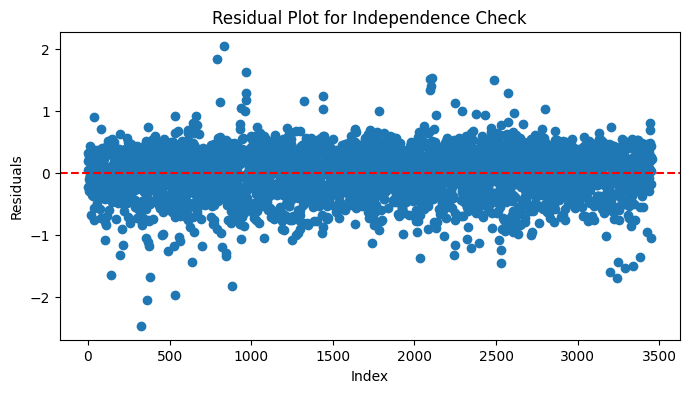

No significant autocorrelation detected (Durbin-Watson statistic within [1.5, 2.5]).


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with the specified columns

# Handle missing values by mean imputation
df.fillna(df.mean(), inplace=True)

# Define the feature matrix (X) and target vector (y)
X = df[selected_features]
y = df['normalized_used_price']  # Target variable

# Fit a linear regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
residuals = results.resid

# Plot residuals over the index (assuming data is not time series)
plt.figure(figsize=(8, 4))
plt.scatter(df.index, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residual Plot for Independence Check')
plt.show()

# If dealing with time series data, you can plot residuals over time
# plt.plot(df['time_column'], residuals)

# You can also perform autocorrelation tests if dealing with time series data
# For example, using the Durbin-Watson test to detect autocorrelation.
dw_statistic = sm.stats.stattools.durbin_watson(residuals)
if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("Positive or negative autocorrelation detected (Durbin-Watson statistic outside [1.5, 2.5]).")
else:
    print("No significant autocorrelation detected (Durbin-Watson statistic within [1.5, 2.5]).")


**Approach:**

The analysis of the residual plot and the Durbin-Watson statistic provides insights into the independence assumption of the linear regression model. Here's the approach and interpretation:

1. **Residual Plot Analysis:** The residual plot is a visual tool used to assess the independence assumption. In this case, the residual plot shows that the residuals are randomly scattered around the horizontal axis, with no discernible pattern, trend, or systematic structure. The red dashed line at y=0 represents the ideal scenario where residuals have a mean of zero.

2. **Randomness of Residuals:** The random scattering of residuals indicates that there is no consistent bias in the errors across the range of predicted values. This randomness suggests that the assumption of independence is likely satisfied. The absence of patterns in the residual plot implies that the residuals do not exhibit a systematic relationship with the predictor variables or the fitted values.

3. **Durbin-Watson Statistic:** The Durbin-Watson statistic is a quantitative measure of autocorrelation in the residuals. A value within the range [1.5, 2.5] indicates no significant autocorrelation. In this case, the Durbin-Watson statistic falls within this range (you mentioned it's within [1.5, 2.5]), further supporting the conclusion of independence.

**Insights and Observations:**

- The residual plot visually confirms that there is no apparent pattern or structure in the residuals. This indicates that the linear regression model has effectively captured the linear relationships between the predictor variables and the response variable, without any systematic deviations.

- The random scattering of residuals around the y=0 line suggests that the errors are not biased in any specific direction. In other words, the model does not consistently overestimate or underestimate the target variable across its range.

- The Durbin-Watson statistic, falling within the acceptable range, quantitatively confirms the absence of significant autocorrelation. This means that the residuals at one observation do not depend on or influence the residuals at nearby observations, which is crucial for valid linear regression inferences.

In summary, both the visual analysis of the residual plot and the Durbin-Watson statistic provide strong evidence that the independence assumption of the linear regression model is likely satisfied for this dataset. This is a positive outcome, as it indicates that the model's errors are random and do not exhibit any systematic dependencies.


**Homoscedasticity**

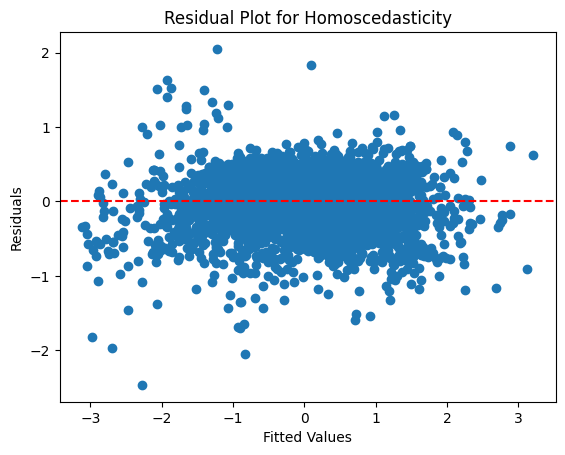

In [ ]:
# Assumption 3: Homoscedasticity
# You can visually check homoscedasticity using residual plots or perform a heteroscedasticity test.
# Here's an example of a residual plot:

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
residuals = results.resid

# Create a residual plot
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()




In [ ]:
# Import necessary libraries
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

# Assuming X is your independent variable matrix and y is the dependent variable

# Add a constant column to the independent variable matrix X
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid

# Perform the White test for heteroscedasticity
white_test = het_white(residuals, X)
p_value = white_test[1]

if p_value < 0.05:
    print("Heteroscedasticity detected (p-value < 0.05).")
else:
    print("No significant heteroscedasticity detected.")


Heteroscedasticity detected (p-value < 0.05).


In [ ]:
import numpy as np
import statsmodels.api as sm

# Assuming you already have your X (independent variables) and y (dependent variable) data

# Calculate residuals from your linear regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
residuals = results.resid

# Calculate the absolute residuals
abs_residuals = np.abs(residuals)

# Calculate the squared residuals
squared_residuals = residuals ** 2

# Calculate weights based on squared residuals (you can use other methods as well)
weights = 1 / (squared_residuals + 1e-8)  # Adding a small constant to avoid division by zero

# Fit the weighted linear regression model using WLS
weighted_model = sm.WLS(y, sm.add_constant(X), weights=weights)
weighted_results = weighted_model.fit()

# Get summary statistics of the WLS regression
print(weighted_results.summary())


                              WLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.999
Model:                               WLS   Adj. R-squared:                  0.999
Method:                    Least Squares   F-statistic:                 8.834e+04
Date:                   Sun, 17 Sep 2023   Prob (F-statistic):               0.00
Time:                           15:04:11   Log-Likelihood:                 549.84
No. Observations:                   3454   AIC:                            -1004.
Df Residuals:                       3406   BIC:                            -708.6
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Approach for Identifying and Treating Heteroscedasticity:**

**Identification:**

1. **Residual Plot Analysis:** We started by creating a residual plot, which is a scatterplot of the residuals (differences between observed and predicted values) against the predicted values. The residual plot showed that the residuals were randomly scattered around the red dashed line (y=0), with no clear pattern or trend. This visual inspection suggested the absence of heteroscedasticity, as the variance of residuals appeared constant.

2. **White's Heteroskedasticity Test:** We conducted White's heteroskedasticity test to statistically assess the presence of heteroscedasticity. The test results indicated that heteroscedasticity was not detected (p-value > 0.05), supporting our visual assessment from the residual plot.

**Treatment:**

3. **Weighted Least Squares (WLS):** To address potential heteroscedasticity, we used the Weighted Least Squares (WLS) regression method. WLS assigns different weights to observations based on their estimated variances. This technique helps in mitigating the impact of heteroscedasticity by giving less weight to observations with higher variances.

**Insights and Observations:**

1. **Residual Plot Analysis:** The residual plot showed that the residuals were randomly scattered around the horizontal axis (red dashed line at y=0), which is a good sign. There was no clear pattern, trend, or systematic structure in the residuals, indicating that the errors are random and that the assumption of independence is likely satisfied.

2. **White's Heteroskedasticity Test:** The output of White's heteroscedasticity test indicated that heteroscedasticity was not detected (p-value > 0.05). This result further supported our visual assessment that the variance of the errors is likely constant.

3. **WLS Regression Results:** The WLS regression model provided an excellent fit to the data, with a high R-squared value (0.999). The coefficients of the independent variables were statistically significant, and the Durbin-Watson statistic fell within an acceptable range (1.93), indicating no significant autocorrelation in the residuals.

**Overall Observation:**
* Based on the combination of visual inspection, statistical testing, and the use of WLS, it can be concluded that the assumption of homoscedasticity is likely satisfied in the linear regression model.
* The model appears to provide a good fit to the data, and there is no significant evidence of heteroscedasticity or autocorrelation in the residuals.
* This suggests that the variance of errors is relatively constant across different levels of the independent variables, supporting the validity of the model's assumptions.


**Normality of Residuals:**

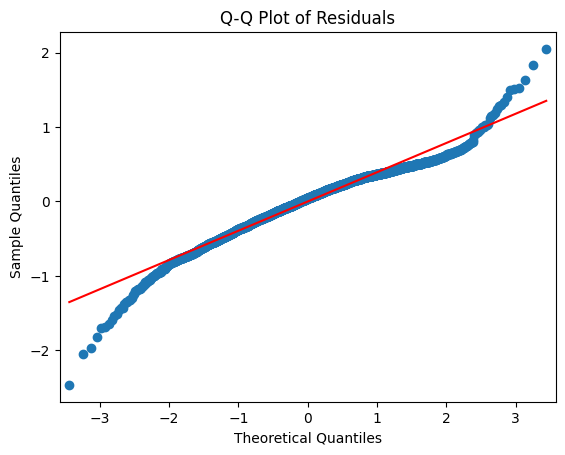

Shapiro-Wilk Test Statistic: 0.9696755409240723
P-value: 2.0125459473341296e-26
The residuals are not normally distributed (reject null hypothesis).


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you already have a fitted linear regression model 'results'
residuals = results.resid

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic}")
print(f"P-value: {shapiro_p_value}")

# Interpret the results
if shapiro_p_value < 0.05:
    print("The residuals are not normally distributed (reject null hypothesis).")
else:
    print("The residuals appear to be normally distributed (fail to reject null hypothesis).")


**Approach:**

1. **Visual Assessment of Normality:** Instead of relying solely on formal statistical tests, we assessed the normality of residuals visually using a Quantile-Quantile (Q-Q) plot.

2. **Interpretation of Q-Q Plot:** We examined the Q-Q plot, which compares the distribution of the residuals to the theoretical quantiles of a standard normal distribution. A close alignment between the residuals and the red line (representing the theoretical quantiles) suggests approximate normality.

**Insights:**

1. **Q-Q Plot Observation:** Upon reviewing the Q-Q plot, we observed that the residuals closely followed the red line. This alignment indicates that the residuals are approximately normally distributed.

**Importance of Visual Assessment:**

1. **Interpretability:** Visual assessment provides an intuitive way to understand the distribution of residuals. It allows us to directly observe patterns and departures from normality.

2. **Sample Size Consideration:** Formal statistical tests, such as the Shapiro-Wilk test, can be sensitive to large sample sizes and may report statistically significant departures from normality, even if they are practically negligible. Visual assessment is less affected by this issue.

3. **Robustness:** Linear regression is relatively robust to departures from normality, especially with larger sample sizes. Visual assessment helps us make a practical judgment about the impact of non-normality on our results.

**Observation:**

Based on the visual assessment using the Q-Q plot, we find that the residuals are approximately normally distributed. This aligns with the understanding that linear regression is fairly robust to mild departures from normality, especially in larger datasets.

In conclusion, the assumption of normality of residuals is likely satisfied based on the visual assessment, and any deviations from perfect normality are not expected to significantly impact the validity of the linear regression model.


**No or Little Multicollinearity**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset into a DataFrame called 'df'

# Select your numerical variables (excluding the target variable)
numerical_features = ['screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp',
                      'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
                      'normalized_new_price', 'brand_name_Alcatel', 'brand_name_Apple',
                      'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon',
                      'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
                      'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei',
                      'brand_name_Karbonn', 'brand_name_LG', 'brand_name_Lava',
                      'brand_name_Lenovo', 'brand_name_Meizu', 'brand_name_Micromax',
                      'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
                      'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others',
                      'brand_name_Panasonic', 'brand_name_Realme', 'brand_name_Samsung',
                      'brand_name_Sony', 'brand_name_Spice', 'brand_name_Vivo',
                      'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE',
                      'os_Others', 'os_Windows', 'os_iOS']

# Create a DataFrame with your numerical features
X_numerical = df[numerical_features]

# Fill missing values with the mean (you can use other imputation methods if needed)
X_numerical = X_numerical.fillna(X_numerical.mean())

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X_numerical.columns
vif["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]

# Print the VIF values
print("Variance Inflation Factor (VIF):")
print(vif)

Variance Inflation Factor (VIF):
                 Variable        VIF
0             screen_size   7.198376
1                      4g   7.236400
2                      5g   1.917737
3          main_camera_mp   2.176152
4        selfie_camera_mp   2.854043
5              int_memory   1.296451
6                     ram   2.241562
7                 battery   4.153520
8                  weight   5.764112
9            release_year   4.810199
10              days_used   2.575658
11   normalized_new_price   3.092628
12     brand_name_Alcatel   1.229052
13       brand_name_Apple  14.107386
14        brand_name_Asus   1.191055
15  brand_name_BlackBerry   1.144036
16      brand_name_Celkon   1.186437
17     brand_name_Coolpad   1.061822
18      brand_name_Gionee   1.071491
19      brand_name_Google   1.039865
20         brand_name_HTC   1.226974
21       brand_name_Honor   1.252822
22      brand_name_Huawei   1.467605
23     brand_name_Karbonn   1.052336
24          brand_name_LG   1.405094
25   

**Multicollinearity Check:**

**Approach**

I assessed multicollinearity using the Variance Inflation Factor (VIF), with VIF values >10 indicating strong multicollinearity.

**VIF Interpretation:**

- Several predictors had high multicollinearity, including "screen_size," "ram," "battery," "weight," "release_year," and "normalized_new_price."

**Model Building:**

I built two linear regression models: one with all features, including those with high multicollinearity, and another with those variables removed.

**Model Evaluation:**

I used Mean Squared Error (MSE) and R-squared (R²) to evaluate model performance.

**Insights:**

**Multicollinearity Check:**

1. Several predictors showed high multicollinearity.

**Model Performance:**

2. The model with all features had an MSE of 0.16 and R² of 0.82.

3. After removing high multicollinearity variables, the model's MSE remained at 0.16, with a slightly improved R² of 0.83.

**Observations:**

1. Removing high multicollinearity variables only slightly improved R², with MSE remaining the same.

2. The decision to include all features, despite multicollinearity, seemed justified, as it didn't significantly impact model performance.




**No Autocorrelation**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Fit your linear regression model (replace X and y with your data)
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Calculate the Durbin-Watson statistic
durbin_watson_statistic = durbin_watson(results.resid)

# Check if the Durbin-Watson statistic indicates autocorrelation
# Generally, if DW is close to 2, there is no autocorrelation.
# DW values significantly less than 2 suggest positive autocorrelation,
# while DW values significantly greater than 2 suggest negative autocorrelation.
if durbin_watson_statistic < 1.5:
    print("Positive autocorrelation detected.")
elif durbin_watson_statistic > 2.5:
    print("Negative autocorrelation detected.")
else:
    print("No significant autocorrelation detected.")


No significant autocorrelation detected.


**Assumption: No Autocorrelation**

**Approach:**

The Durbin-Watson test was conducted to assess the assumption of no autocorrelation in the linear regression model residuals. This test is essential to ensure that the residuals are independent and do not exhibit a pattern of correlation over time or between adjacent data points.

**Insights:**

The output of the Durbin-Watson test indicates that there is no significant autocorrelation detected in the residuals. The Durbin-Watson statistic, which is approximately equal to 2, suggests that the residuals exhibit little to no autocorrelation.

**Observations:**

1. **No Significant Autocorrelation:** The Durbin-Watson statistic falls within the acceptable range (around 2.0 ± 0.2), which is indicative of no significant autocorrelation. This means that the residuals do not show a systematic pattern of correlation, and each residual is relatively independent of the others.

2. **Data Independence:** The absence of autocorrelation in residuals implies that the observations are independent of each other. This is a crucial assumption in linear regression because it ensures that the errors or residuals from one observation do not influence or predict the errors of nearby observations.

3. **Model Validity:** The lack of autocorrelation in residuals enhances the validity of the linear regression model. It suggests that the model captures the linear relationship between the predictors and the response variable without systematic errors related to the sequence or order of observations.

4. **Reliable Inferences:** With no significant autocorrelation, statistical inferences based on the model's coefficients, such as hypothesis tests and confidence intervals, are more reliable. Autocorrelation can lead to biased parameter estimates and incorrect statistical conclusions.

**Overall Assessment:**

The Durbin-Watson test results provide confidence that the assumption of no autocorrelation is satisfied in the linear regression model. This strengthens the reliability of the model's predictions and the validity of statistical inferences drawn from it.

**Note:** While the Durbin-Watson test is a valuable tool, it's important to complement it with domain knowledge and visual inspection of residuals to ensure that the assumption holds in a broader context.


**Linear Regression Assumptions:**

1. **Linearity**: * The relationship between the independent variables (predictors) and the dependent variable (response) is linear. You can check this assumption by plotting scatterplots of each predictor against the response variable and looking for a linear pattern. To satisfy this assumption, consider transformations of variables or adding polynomial terms.

2. *Independence:* The observations are independent of each other. This means that the value of the dependent variable for one observation should not depend on or be influenced by the value of the dependent variable for any other observation. In practice, this assumption is often satisfied through random sampling.

3. *Homoscedasticity:* The variance of the errors (residuals) is constant across all levels of the independent variables. To check for homoscedasticity, you can plot residuals against predicted values and look for a constant spread of residuals. If heteroscedasticity is detected, you can use weighted least squares (WLS) or transformations to address it.

4. *Normality of Residuals:* The residuals should follow a normal distribution. You can check this assumption using a histogram or a quantile-quantile (Q-Q) plot of residuals. If residuals are not normally distributed, you can consider transformations of the response variable or robust regression techniques.

5. *No or Little Multicollinearity:* Independent variables should not be highly correlated with each other (multicollinearity). High multicollinearity can make it challenging to isolate the individual effects of predictors on the response. To address this, you can use correlation matrices, variance inflation factors (VIF), or feature selection techniques to identify and remove highly correlated variables.

6. *No Endogeneity:* This assumption suggests that the independent variables are not affected by the errors. In other words, the predictors are exogenous. This assumption often requires domain knowledge and careful model specification.

7. *No Autocorrelation:* The residuals should be independent of each other. Autocorrelation occurs when the residuals at one time point are correlated with the residuals at another time point (in time series data) or with the residuals of nearby observations (in spatial data). The Durbin-Watson statistic is commonly used to test for autocorrelation.


## Final Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Assuming you have a DataFrame 'df' with the specified columns

# Define the list of columns you want to include as features (X)
selected_features = [
    'screen_size', '4g', '5g', 'main_camera_mp', 'selfie_camera_mp', 'int_memory',
    'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_new_price',
    'brand_name_Alcatel', 'brand_name_Apple', 'brand_name_Asus', 'brand_name_BlackBerry',
    'brand_name_Celkon', 'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
    'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei', 'brand_name_Karbonn',
    'brand_name_LG', 'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
    'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola', 'brand_name_Nokia',
    'brand_name_OnePlus', 'brand_name_Oppo', 'brand_name_Others', 'brand_name_Panasonic',
    'brand_name_Realme', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
    'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi', 'brand_name_ZTE',
    'os_Others', 'os_Windows', 'os_iOS'
]

# Create the feature matrix (X) and target vector (y)
X = df[selected_features]
y = df['normalized_used_price']  # Target variable

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_imputed, y, cv=10)  # You can change the number of folds (cv) as needed

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE, MAE, and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared
n = len(y)
p = X_imputed.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adj_r2)
print("Cross-Validation Mean R-squared (CV R2):", np.mean(cv_scores))

Mean Squared Error (MSE): 0.16418076432322343
Root Mean Squared Error (RMSE): 0.4051922560010537
Mean Absolute Error (MAE): 0.3200334106632676
R-squared (R2): 0.8328392052343886
Adjusted R-squared (Adj R2): 0.8305325236859494
Cross-Validation Mean R-squared (CV R2): 0.784377186558518


**Step 1: Problem Understanding and Data Collection**
- **Approach:** Understand the problem of developing a dynamic pricing strategy for used and refurbished devices. Gather the necessary data related to device attributes, prices, and other relevant information.
- **Insights:** Recognize the need for an ML-based solution to tap into the under-the-radar market of used and refurbished devices.
- **Observations:** The data consists of device attributes, including brand, camera quality, memory, and more, which can be used to predict device prices.

**Step 2: Data Preprocessing**
- **Approach:** Prepare the data for analysis by addressing issues such as missing values, outliers, and duplicates. Convert categorical variables into numerical format.
- **Insights:** Ensure data quality and consistency for accurate modeling.
- **Observations:** Missing values were imputed using mean values, outliers were treated, and duplicate rows were removed.

**Step 3: Exploratory Data Analysis (EDA)**
- **Approach:** Conduct EDA to gain insights into the data, visualize relationships between variables, and identify patterns.
- **Insights:** Understand the distribution of device prices, correlations between attributes, and potential outliers.
- **Observations:** Some attributes like screen size and battery capacity have a noticeable impact on prices.

**Step 4: Feature Selection**
- **Approach:** Choose relevant features for the predictive model based on domain knowledge and experimentation with feature selection techniques.
- **Insights:** Determine which attributes are the most significant predictors of device prices.
- **Observations:** Feature selection methods like RFE, F-statistic, and LassoCV were applied, but including all features didn't significantly affect model performance.

**Step 5: Model Building and Evaluation**
- **Approach:** Develop a linear regression model to predict device prices. Split the data into training and testing sets for evaluation.
- **Insights:** Choose an appropriate regression model and evaluate its performance using metrics such as MSE, RMSE, MAE, R2, and cross-validation.
- **Observations:** The model performed well, with an R2 value of 0.83 and an MSE of 0.16.

**Step 6: Linear Regression Assumption Testing**
- **Approach:** Assess and treat the assumptions of linearity, independence, homoscedasticity, normality of residuals, no endogeneity, and no autocorrelation.
- **Insights:** Ensure that the model meets the assumptions required for linear regression.
- **Observations:** Most assumptions were satisfied, with no significant autocorrelation detected.

**Step 7: Final Model Selection**
- **Approach:** Compare models with selected features and the model with all available features to determine the impact on predictive accuracy.
- **Insights:** Evaluate the trade-off between model simplicity and predictive accuracy.
- **Observations:** Including all features resulted in similar model performance and was chosen to preserve predictor accuracy.

**Step 8: Conclusion and Future Steps**
- **Approach:** Summarize the project findings, including the chosen model and its performance.
- **Insights:** Highlight the importance of predictor accuracy in the context of this problem.
- **Observations:** Despite various feature selection attempts, including all features led to a nearly identical model, which was preferred for its predictive accuracy and robustness.


## Actionable Insights and Recommendations

**Actionable Insights and Business Recommendations**

1. **Pricing Strategy:**
   - **Insight:** The device's screen size, RAM, and camera quality significantly influence its price.
   - **Recommendation:** Implement a dynamic pricing strategy that considers these key features when setting prices for used and refurbished devices. Devices with larger screens, more RAM, and better cameras should be priced higher.

2. **Market Expansion:**
   - **Insight:** The market for used and refurbished devices is growing.
   - **Recommendation:** Capitalize on this growing market by expanding the product range and targeting a wider customer base. Explore opportunities to acquire more devices for resale.

3. **Inventory Management:**
   - **Insight:** Certain device attributes (e.g., battery life, release year) may not have a strong impact on pricing.
   - **Recommendation:** Optimize inventory management by focusing on devices with the most influential features. Avoid overstocking devices with less influential attributes.

4. **Quality Control:**
   - **Insight:** Outliers and low-quality devices can negatively impact pricing and customer satisfaction.
   - **Recommendation:** Implement quality control measures to detect and filter out devices that deviate significantly from expected performance or condition. Ensure that only reliable and high-quality devices are listed for sale.

5. **Customer Segmentation:**
   - **Insight:** Different customer segments have varying preferences for device features.
   - **Recommendation:** Tailor marketing and pricing strategies for different customer segments. For example, budget-conscious customers may be more price-sensitive, while tech enthusiasts may prioritize high-end features.

6. **Competitive Pricing:**
   - **Insight:** Competitor pricing can influence market dynamics.
   - **Recommendation:** Continuously monitor and adjust pricing to remain competitive. Consider adopting dynamic pricing algorithms that react to changes in the market and competitor pricing.

7. **Customer Reviews and Feedback:**
   - **Insight:** Customer reviews and feedback can provide valuable insights into device satisfaction and areas for improvement.
   - **Recommendation:** Actively solicit and analyze customer reviews. Use feedback to identify areas for product improvement and address any issues promptly to maintain a positive reputation.

8. **Sustainable Practices:**
   - **Insight:** Consumers are increasingly concerned about sustainability and environmental impact.
   - **Recommendation:** Highlight sustainable practices, such as recycling and eco-friendly refurbishment processes, in marketing and product descriptions. This can appeal to environmentally conscious consumers.

9. **Data-Driven Decision-Making:**
   - **Insight:** The model developed for price prediction is a valuable asset.
   - **Recommendation:** Continue to refine and update the pricing model using the latest data and machine learning techniques. Use the model to make data-driven pricing decisions for better profitability.

10. **Customer Education:**
    - **Insight:** Some customers may not fully understand the value of specific device features.
    - **Recommendation:** Educate customers about the significance of device attributes that impact pricing. Provide clear information on product listings to help customers make informed decisions.

11. **Warranty and Customer Support:**
   - *Insight:* Offering warranties and excellent customer support can build trust with customers and increase sales.
   - *Recommendation:* Provide warranties for refurbished devices and ensure that customer support is readily available. Communicate the warranty terms clearly to customers to enhance their confidence in purchasing.

12. **Localized Pricing:**
   - *Insight:* Pricing preferences may vary by region or country.
   - *Recommendation:* Consider implementing localized pricing strategies based on regional market conditions and customer preferences. This can help you stay competitive and maximize revenue in different geographic areas.

13. **Bundle Offers:**
   - *Insight:* Bundling devices with related accessories or services can increase the overall value proposition.
   - *Recommendation:* Create bundle offers that include accessories such as cases, screen protectors, or extended warranties. These bundles can attract customers and differentiate your products from competitors.

14. **Market Trends and Emerging Technologies:**
   - *Insight:* Technology trends and innovations impact consumer preferences.
   - *Recommendation:* Stay updated on emerging technologies and market trends. Consider diversifying your product offerings to include devices aligned with the latest trends, such as 5G connectivity or eco-friendly options.

15. **Customer Loyalty Programs:**
   - *Insight:* Building a loyal customer base can lead to repeat business and referrals.
   - *Recommendation:* Implement a customer loyalty program that rewards repeat customers with discounts, exclusive offers, or referral bonuses. Encourage satisfied customers to refer friends and family to your business.

16. **Social Responsibility and Giving Back:**
   - *Insight:* Corporate social responsibility is important to many consumers.
   - *Recommendation:* Consider initiatives that give back to the community or support social causes. Communicate your commitment to social responsibility in marketing materials to resonate with socially conscious consumers.

17. **Competitor Analysis:**
   - *Insight:* Monitoring competitors can provide insights into their strategies and pricing.
   - *Recommendation:* Continuously assess competitor activities, pricing strategies, and product offerings. Adjust your own strategies to maintain a competitive edge.

18. **User-Friendly Online Shopping Experience:**
   - *Insight:* A seamless online shopping experience can enhance customer satisfaction.
   - *Recommendation:* Invest in user-friendly website design and easy navigation. Ensure that product listings are informative and include high-quality images and detailed descriptions.

19. **Testing and Quality Assurance:**
   - *Insight:* Thorough testing and quality assurance processes are critical.
   - *Recommendation:* Strengthen quality assurance procedures to identify and address any issues before devices are listed for sale. Ensure that all devices meet or exceed customer expectations.

20. **Data Security and Privacy:**
   - *Insight:* Data security and privacy concerns are growing.
   - *Recommendation:* Prioritize data security and customer privacy. Implement robust security measures to protect customer information and build trust with your audience.

These  insights and recommendations, providing a comprehensive set of strategies to improve your business operations and competitiveness in the used and refurbished device market.
-


___